In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

from astropy.coordinates import SkyCoord
from astropy import units as u

In [11]:
def line(x):
    return ((3.6 - 3.2) / (5000 - 6000)) * (x - 6000) + 3.2

def line_above(x):
    if (x >= x2) and (x <= x1):  # for first line
        return ((y2 - y1) / (x2 - x1)) * (x - x1) + y1

    elif (x >= x3) and (x <= x2):  # for second line
        return ((y3 - y2) / (x3 - x2)) * (x - x2) + y2

def line_below(x):
    return ((y4 - y1) / (x4 - x1)) * (x - x4) + y4
    
def calculate_boundary_lines(x, y, x1, y1, x2, y2, x3, y3, x4, y4):
    df['above_line'] = df[y] < df[x].apply(line_above)
    df['below_line'] = df[y] > df[x].apply(line_below)

    selected_points = df[(df[x] >= 3000) & (df[x] <= 6000) & df['above_line'] & df['below_line']]

    return df, selected_points, ((x1, y1), (x2, y2)), ((x2, y2), (x3, line_above(x3))), ((x3, line_above(x3)), (x3, y4)), ((x3, y4), (x4, y4)), ((x4, y4), (x1, y1))

def plot_data(df, selected_points, additional_lines, xcol, ycol, title):
    plt.figure(figsize=(10, 8))
    
    for line_start, line_end in additional_lines:
        plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'g--')

    sns.scatterplot(x=df[xcol], y=df[ycol], s=2, color='red')
    sns.scatterplot(x=selected_points[xcol], y=selected_points[ycol], s=2, color='blue')

    plt.xlabel('Teff')
    plt.ylabel('logG')
    plt.title(title)
    plt.ylim(5, 0)
    plt.xlim(7500, 3000)
    plt.tight_layout()
    plt.savefig(title+'.png', dpi=300)
    plt.show()

# testes

In [ ]:
# TODAS AS COLUNAS DO LAMOST MEDIUM
colunas = ['Teffcnn', 'loggcnn', 'alphacnn', 
           '[Fe/H]cnn', '[C/Fe]', '[N/Fe]', '[O/Fe]', 
           '[Mg/Fe]', '[Al/Fe]', '[Si/Fe]', 
           '[S/Fe]', '[Ca/Fe]', '[Ti/Fe]', 
           '[Cr/Fe]', '[Ni/Fe]', '[Cu/Fe]']

In [ ]:
# TODAS AS COLUNAS DO APOGEE
colunas = ['TEFF', 'LOGG', 'X_H', 'C_FE', 
           'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 
           'MG_FE', 'AL_FE', 'SI_FE', 'K_FE', 
           'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE',
           'CR_FE', 'MN_FE', 'FE_H', 'CO_FE',
           'NI_FE', 'CU_FE', 'GE_FE', 'RB_FE',
           'CE_FE', 'ND_FE', 'YB_FE']

In [ ]:
# REMOVENDO ERRO > 0.2
"""
test = data.loc[(data['emag_psf_u']<0.2) & (data['emag_psf_J0378']<0.2) &
                  (data['emag_psf_J0395']<0.2) & (data['emag_psf_J0410']<0.2) &
                  (data['emag_psf_J0430']<0.2) & (data['emag_psf_g']<0.2) &
                  (data['emag_psf_J0515']<0.2) & (data['emag_psf_r']<0.2) &
                  (data['emag_psf_J0660']<0.2) & (data['emag_psf_i']<0.2) &
                  (data['emag_psf_J0861']<0.2) & (data['emag_psf_z']<0.2)]
"""

In [ ]:
# CALCULANDO GRAUS E RADIANOS EM COORDENADAS GALÁCTICAS
"""
ra_true = data["Ra_splus"]
dec_true = data[ "Dec_splus"]
icrs_true = SkyCoord(ra=ra_true*u.degree, dec=dec_true*u.degree, frame='icrs')
gal_true = icrs_true.galactic
l_rad_true = gal_true.l.radian
l_rad_true[l_rad_true > np.pi] -= 2. * np.pi # LONGITUDE
b_rad_true = gal_true.b.radian               # LATITUDE
b_deg_true = b_rad_true * (180/np.pi) #gal.b.degree#b_rad * (180/np.pi)
l_deg_true = l_rad_true * (180/np.pi)

data['Latitude'] = b_deg_true
"""

In [ ]:
# TESTANDO SE TEMOS LINHAS COM TODOS OS VALORES = -999
""" 
test = data.loc[(data['mag_psf_u'] == -999) & (data['mag_psf_J0378'] == -999) & 
                   (data['mag_psf_J0395'] == -999) & (data['mag_psf_J0410'] == -999) & 
                   (data['mag_psf_J0430'] == -999) & (data['mag_psf_g'] == -999) &
                   (data['mag_psf_J0515'] == -999) & (data['mag_psf_r'] == -999) &
                   (data['mag_psf_J0660'] == -999) &  (data['mag_psf_i'] == -999) & 
                   (data['mag_psf_J0861'] == -999) & (data['mag_psf_z'] == -999) &
                   (data['mag_psf_u'] == '-999') & (data['mag_psf_J0378'] == '-999') & 
                   (data['mag_psf_J0395'] == '-999') & (data['mag_psf_J0410'] == '-999') & 
                   (data['mag_psf_J0430'] == '-999') & (data['mag_psf_g'] == '-999') &
                   (data['mag_psf_J0515'] == '-999') & (data['mag_psf_r'] == '-999') &
                   (data['mag_psf_J0660'] == '-999') &  (data['mag_psf_i'] == '-999') & 
                   (data['mag_psf_J0861'] == '-999') & (data['mag_psf_z'] == '-999')]
"""

# Filtrando bases

## Lamost Low Resolution

In [2]:
LamostLow = pd.read_table("E:\\IC\\BasesOriginais\\Treino\\LAMOSDR8-LowResulution-SPLUS-2023.csv", encoding='latin-1', delimiter=',', index_col = '#ID')

In [3]:
LamostLow

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,teff_err,logg,logg_err,feh,feh_err,rv,rv_err,alpha_m,alpha_m_err,Separation
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,...,194.54,3.835,0.315,-0.227,0.207,46.39,15.97,-9999.000000,-9999.000000,0.159038
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,...,97.62,2.320,0.162,-0.555,0.106,25.60,6.91,-9999.000000,-9999.000000,0.325204
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,...,88.58,3.613,0.146,-0.820,0.095,81.72,6.67,-9999.000000,-9999.000000,0.175612
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,...,67.35,3.910,0.110,-0.355,0.072,12.88,5.27,-9999.000000,-9999.000000,0.200899
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,...,66.38,4.095,0.111,-0.055,0.073,-35.89,4.28,-9999.000000,-9999.000000,0.114800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,...,104.55,4.549,0.171,-0.532,0.112,42.75,8.14,-9999.000000,-9999.000000,0.127864
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,...,146.30,4.424,0.246,-0.655,0.161,12.46,8.75,-9999.000000,-9999.000000,0.391658
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,...,128.03,4.852,0.213,-0.290,0.139,-23.16,8.85,-9999.000000,-9999.000000,0.111666


In [4]:
for i in LamostLow:
    print(i)

RA_splus
DEC_splus
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
obsid
uid
gp_id
designation
obsdate
lmjd
mjd
planid
spid
fiberid
ra_obs
dec_obs
snru
snrg
snrr
snri
snrz
class
subclass
z_lamost
z_err
ps_id
mag_ps_g
mag_ps_r
mag_ps_i
mag_ps_z
mag_ps_y
gaia_source_id
gaia_g_mean_mag
tsource
fibertype
tfrom
tcomment
offsets
offsets_v
RA_lamost
DEC_lamost
teff
teff_err
logg
logg_err
feh
feh_err
rv
rv_err
alpha_m
alpha_m_err
Separation


In [5]:
data = LamostLow

In [6]:
colunas = ['RA_splus', 'DEC_splus', 
                     'u', 'J378', 'J395', 'J410', 
                     'J430', 'g', 'J515', 'r', 
                     'J660', 'i', 'J861', 'z', 
                     'e_u', 'e_J0378', 'e_J0395', 'e_J0410', 
                     'e_J0430', 'e_g', 'e_J0515', 'e_r', 
                     'e_J0660', 'e_i', 'e_J0861', 'e_z', 
                     'teff', 'logg', 'feh', 'alpha_m', 
                     'teff_err', 'logg_err', 'feh_err', 'alpha_m_err']

In [7]:
LamostLowF1 = LamostLow[colunas]

In [11]:
LamostLowF1

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,e_J0861,e_z,teff,logg,feh,alpha_m,teff_err,logg_err,feh_err,alpha_m_err
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,...,0.0047,0.0034,5291.84,3.835,-0.227,-9999.000000,194.54,0.315,0.207,-9999.000000
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,...,0.0013,0.0009,4381.20,2.320,-0.555,-9999.000000,97.62,0.162,0.106,-9999.000000
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,...,0.0071,0.0052,5240.91,3.613,-0.820,-9999.000000,88.58,0.146,0.095,-9999.000000
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,...,0.0028,0.0020,5273.48,3.910,-0.355,-9999.000000,67.35,0.110,0.072,-9999.000000
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,...,0.0030,0.0022,5747.96,4.095,-0.055,-9999.000000,66.38,0.111,0.073,-9999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,...,0.0105,0.0080,5705.38,4.549,-0.532,-9999.000000,104.55,0.171,0.112,-9999.000000
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,...,0.0048,0.0035,4761.26,4.424,-0.655,-9999.000000,146.30,0.246,0.161,-9999.000000
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,...,0.0181,0.0139,5499.14,4.852,-0.290,-9999.000000,128.03,0.213,0.139,-9999.000000


In [12]:
#LamostLowF1.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF1.csv")

In [9]:
data = LamostLowF1

In [10]:
LamostLowF2 = data.loc[(data['e_u']<0.2) & (data['e_J0378']<0.2) &
                          (data['e_J0395']<0.2) & (data['e_J0410']<0.2) &
                          (data['e_J0430']<0.2) & (data['e_g']<0.2) &
                          (data['e_J0515']<0.2) & (data['e_r']<0.2) &
                          (data['e_J0660']<0.2) & (data['e_i']<0.2) &
                          (data['e_J0861']<0.2) & (data['e_z']<0.2),
                          ['RA_splus', 'DEC_splus', 
                           'u', 'J378', 'J395', 'J410', 
                           'J430', 'g', 'J515', 'r', 
                           'J660', 'i', 'J861', 'z', 
                           'teff', 'logg', 'feh', 'alpha_m']]

In [12]:
LamostLowF2

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,J660,i,J861,z,teff,logg,feh,alpha_m
#ID,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,15.0014,14.8837,14.8697,14.8294,5291.84,3.835,-0.227,-9999.000000
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,12.4124,12.2094,12.0679,12.0198,4381.20,2.320,-0.555,-9999.000000
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,15.7593,15.6154,15.5772,15.5288,5240.91,3.613,-0.820,-9999.000000
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,14.0412,13.9180,13.9044,13.8611,5273.48,3.910,-0.355,-9999.000000
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,14.1607,14.0692,14.0744,14.0434,5747.96,4.095,-0.055,-9999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,16.8753,16.7399,16.7004,16.6912,5705.38,4.549,-0.532,-9999.000000
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,15.5924,15.3910,15.3293,15.2953,4761.26,4.424,-0.655,-9999.000000
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,17.6892,17.5474,17.5197,17.4724,5499.14,4.852,-0.290,-9999.000000


In [14]:
#LamostLowF2.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF2.csv")

In [2]:
LamostLowF2 = pd.read_table("E:\\IC\\FiltroBases\\LamostLow\\LamostLowF2.csv", encoding='latin-1', delimiter=',', index_col = '#ID')

In [22]:
LamostLowF2

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,J660,i,J861,z,teff,logg,feh,alpha_m,Latitude,Longitude
#ID,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,15.0014,14.8837,14.8697,14.8294,5291.84,3.835,-0.227,-9999.000000,56.504398,-94.005622
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,12.4124,12.2094,12.0679,12.0198,4381.20,2.320,-0.555,-9999.000000,56.387098,-94.317788
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,15.7593,15.6154,15.5772,15.5288,5240.91,3.613,-0.820,-9999.000000,56.357917,-94.432729
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,14.0412,13.9180,13.9044,13.8611,5273.48,3.910,-0.355,-9999.000000,56.624661,-93.691554
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,14.1607,14.0692,14.0744,14.0434,5747.96,4.095,-0.055,-9999.000000,56.631025,-93.677223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,16.8753,16.7399,16.7004,16.6912,5705.38,4.549,-0.532,-9999.000000,-58.254653,94.166947
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,15.5924,15.3910,15.3293,15.2953,4761.26,4.424,-0.655,-9999.000000,-58.227524,93.998947
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,17.6892,17.5474,17.5197,17.4724,5499.14,4.852,-0.290,-9999.000000,-58.535413,94.051176


In [3]:
data = LamostLowF2

In [20]:
ra_true = data["RA_splus"]
dec_true = data[ "DEC_splus"]
icrs_true = SkyCoord(ra=ra_true*u.degree, dec=dec_true*u.degree, frame='icrs')
gal_true = icrs_true.galactic
l_rad_true = gal_true.l.radian
l_rad_true[l_rad_true > np.pi] -= 2. * np.pi # LONGITUDE
b_rad_true = gal_true.b.radian               # LATITUDE
b_deg_true = b_rad_true * (180/np.pi) #gal.b.degree#b_rad * (180/np.pi)
l_deg_true = l_rad_true * (180/np.pi)

data['Latitude'] = b_deg_true
data['Longitude'] = l_deg_true

In [25]:
#data.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF3.csv")

#### Corte na Temperatura

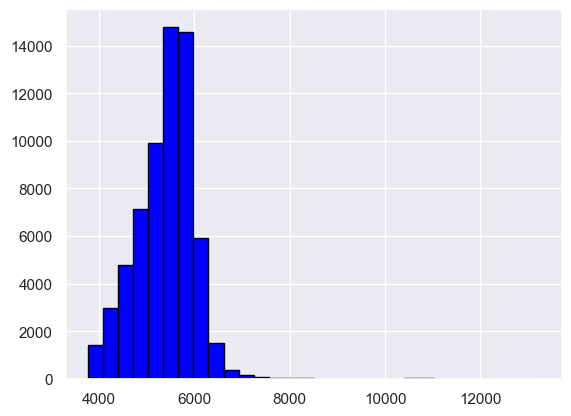

In [26]:
plt.hist(data['teff'], bins=30, color='blue', edgecolor='black')
plt.show()

In [28]:
# corte feito para remover estrelas jovens que parecem anâs por terem um disco de acreção 
LamostLowF4 = data.loc[(data['teff']>4000) & (data['teff']<6500)]

In [29]:
LamostLowF4

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,J660,i,J861,z,teff,logg,feh,alpha_m,Latitude,Longitude
#ID,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,15.0014,14.8837,14.8697,14.8294,5291.84,3.835,-0.227,-9999.000000,56.504398,-94.005622
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,12.4124,12.2094,12.0679,12.0198,4381.20,2.320,-0.555,-9999.000000,56.387098,-94.317788
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,15.7593,15.6154,15.5772,15.5288,5240.91,3.613,-0.820,-9999.000000,56.357917,-94.432729
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,14.0412,13.9180,13.9044,13.8611,5273.48,3.910,-0.355,-9999.000000,56.624661,-93.691554
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,14.1607,14.0692,14.0744,14.0434,5747.96,4.095,-0.055,-9999.000000,56.631025,-93.677223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,16.8753,16.7399,16.7004,16.6912,5705.38,4.549,-0.532,-9999.000000,-58.254653,94.166947
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,15.5924,15.3910,15.3293,15.2953,4761.26,4.424,-0.655,-9999.000000,-58.227524,93.998947
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,17.6892,17.5474,17.5197,17.4724,5499.14,4.852,-0.290,-9999.000000,-58.535413,94.051176


In [30]:
#LamostLowF4.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF4-TeffCut.csv")

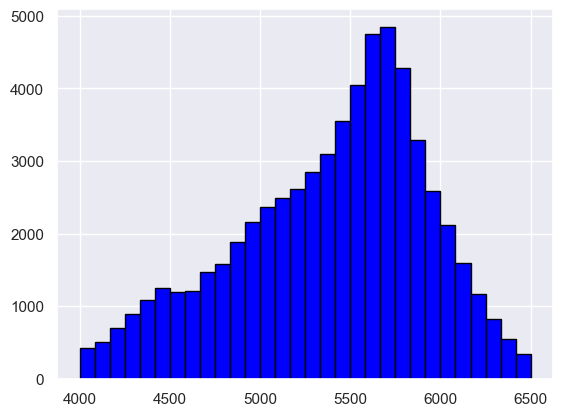

In [32]:
plt.hist(LamostLowF4['teff'], bins=30, color='blue', edgecolor='black')
plt.show()

#### adicionando cores GAIA na base filtrada

In [5]:
LamostLow = pd.read_table("E:\\IC\\FiltroBases\\LamostLow\\LamostLowF4-TeffCut.csv", encoding='latin-1', delimiter=',', index_col = '#ID')

In [9]:
LamostLow

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,J660,i,J861,z,teff,logg,feh,alpha_m,Latitude,Longitude
#ID,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,15.0014,14.8837,14.8697,14.8294,5291.84,3.835,-0.227,-9999.000000,56.504398,-94.005622
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,12.4124,12.2094,12.0679,12.0198,4381.20,2.320,-0.555,-9999.000000,56.387098,-94.317788
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,15.7593,15.6154,15.5772,15.5288,5240.91,3.613,-0.820,-9999.000000,56.357917,-94.432729
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,14.0412,13.9180,13.9044,13.8611,5273.48,3.910,-0.355,-9999.000000,56.624661,-93.691554
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,14.1607,14.0692,14.0744,14.0434,5747.96,4.095,-0.055,-9999.000000,56.631025,-93.677223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,16.8753,16.7399,16.7004,16.6912,5705.38,4.549,-0.532,-9999.000000,-58.254653,94.166947
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,15.5924,15.3910,15.3293,15.2953,4761.26,4.424,-0.655,-9999.000000,-58.227524,93.998947
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,17.6892,17.5474,17.5197,17.4724,5499.14,4.852,-0.290,-9999.000000,-58.535413,94.051176


In [8]:
LamostLowGAIA = pd.read_table("E:\\IC\\BasesOriginais\\Treino-GAIA\\LAMOSDR8-LowResulution-SPLUS-2023-GAIA.csv", encoding='latin-1', delimiter=',', index_col = '#ID')

In [10]:
LamostLowGAIA

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,...,0.0016,0.0004,0.0043,MARCS,173.489324,-0.706038,0.549669,0.416519,-0.1373,0.057493
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,...,0.2661,0.2639,0.2678,MARCS,173.280827,-0.712353,0.337471,0.200605,-0.0286,0.147789
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,...,0.0189,0.0053,0.0502,MARCS,173.211446,-0.702645,0.763234,0.596929,-0.1831,0.094500
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,...,0.0275,0.0217,0.0325,MARCS,173.699895,-0.696492,0.361744,0.288520,-0.1761,0.048999
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,...,0.0309,0.0195,0.0420,MARCS,173.709904,-0.695249,0.370337,0.305832,-0.2322,0.025931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,...,0.0037,0.0010,0.0078,MARCS,358.189278,1.301455,1.288851,0.746978,0.2184,0.187587
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,...,0.0045,0.0012,0.0095,MARCS,358.097507,1.288181,0.737273,0.492064,0.2410,0.046146
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,...,0.0017,0.0004,0.0048,MARCS,358.254982,1.021892,2.179963,1.313304,0.1807,0.089777


In [11]:
for i in LamostLowGAIA:
    print(i)

RA_splus
DEC_splus
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
obsid
uid
gp_id
designation
obsdate
lmjd
mjd
planid
spid
fiberid
ra_obs
dec_obs
snru
snrg
snrr
snri
snrz
class
subclass
z_lamost
z_err
ps_id
mag_ps_g
mag_ps_r
mag_ps_i
mag_ps_z
mag_ps_y
gaia_source_id
gaia_g_mean_mag
tsource
fibertype
tfrom
tcomment
offsets
offsets_v
RA_lamost
DEC_lamost
teff
teff_err
logg
logg_err
feh
feh_err
rv
rv_err
alpha_m
alpha_m_err
Separation
DR3Name
RAdeg
DEdeg
errHalfMaj
errHalfMin
errPosAng
SolID
Source
RandomI
e_RAdeg
e_DEdeg
Plx
e_Plx
RPlx
PM
pmRA
e_pmRA
pmDE
e_pmDE
RADEcor
RAPlxcor
RApmRAcor
RApmDEcor
DEPlxcor
DEpmRAcor
DEpmDEcor
PlxpmRAcor
PlxpmDEcor
pmRApmDEcor
NAL
NAC
NgAL
NbAL
gofAL
chi2AL
epsi
sepsi
Solved
APF
nueff
pscol
e_pscol
RApscolCorr
DEpscolCorr
PlxpscolCorr
pmRApscolCorr
pmDEpscolCorr
MatchObsA
Nper
amax
MatchObs
IPDgofha
IPDgofhp
IPDfmp
IPDfow
RUWE
Dup
o_Gmag
FG
e_FG
RFG
Gmag
e_Gmag
o_BPmag
FBP


In [12]:
colunas_a_adicionar = ['snrr','Gmag', 'BP-RP', 'E(BP-RP)', 'Plx']
df_merged = LamostLow.merge(LamostLowGAIA[colunas_a_adicionar], left_index=True, right_index=True)

In [13]:
df_merged

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,logg,feh,alpha_m,Latitude,Longitude,snrr,Gmag,BP-RP,E(BP-RP),Plx
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,173.489308,-0.706034,17.1433,16.8920,16.7870,16.0530,15.9714,15.5817,15.3991,15.0345,...,3.835,-0.227,-9999.000000,56.504398,-94.005622,27.37,15.130010,0.951373,0.0016,0.5073
iDR4_3_SPLUS-n01s18_0000603,173.280750,-0.712378,15.9342,15.5700,15.4106,14.3764,14.0745,13.4050,13.1738,12.5085,...,2.320,-0.555,-9999.000000,56.387098,-94.317788,36.53,12.630606,1.358874,0.2661,0.3272
iDR4_3_SPLUS-n01s18_0000604,173.211405,-0.702611,17.8467,17.6041,17.5955,16.8241,16.7202,16.3711,16.1504,15.8100,...,3.613,-0.820,-9999.000000,56.357917,-94.432729,32.16,15.916938,1.031185,0.0189,0.2858
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,...,3.910,-0.355,-9999.000000,56.624661,-93.691554,58.47,14.147705,0.950871,0.0275,0.6243
iDR4_3_SPLUS-n01s18_0000949,173.709903,-0.695287,15.9381,15.6181,15.5689,14.9760,14.9070,14.6134,14.4313,14.1712,...,4.095,-0.055,-9999.000000,56.631025,-93.677223,22.02,14.231857,0.820163,0.0309,0.9573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.6311,18.2922,18.2874,17.7309,17.6216,17.3173,17.1258,16.8967,...,4.549,-0.532,-9999.000000,-58.254653,94.166947,28.54,16.988728,0.878010,0.0037,0.4374
iDR4_3_STRIPE82-0170_0048504,358.097698,1.287998,18.1045,17.8213,17.7699,16.8999,16.7874,16.2976,16.1349,15.6514,...,4.424,-0.655,-9999.000000,-58.227524,93.998947,7.50,15.737705,1.123622,0.0045,1.1473
iDR4_3_STRIPE82-0170_0048512,358.254930,1.021852,19.7378,19.5271,19.5914,18.7334,18.7393,18.2719,18.0666,17.7487,...,4.852,-0.290,-9999.000000,-58.535413,94.051176,19.73,17.830460,0.993698,0.0017,0.3899


In [41]:
#df_merged.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF5-GAIA.csv")

#### removendo linhas com sinal ruido na banda r maior q 50

In [14]:
data = df_merged

In [15]:
data = data.loc[(data['snrr'] > 50)]

In [16]:
data

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,logg,feh,alpha_m,Latitude,Longitude,snrr,Gmag,BP-RP,E(BP-RP),Plx
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,...,3.910,-0.355,-9999.000000,56.624661,-93.691554,58.47,14.147705,0.950871,0.0275,0.6243
iDR4_3_SPLUS-n01s18_0001258,173.440965,-0.685285,16.2445,16.0241,15.8998,15.1072,14.9481,14.5219,14.3692,13.8949,...,4.562,-0.359,-9999.000000,56.496039,-94.099719,141.06,13.971864,1.109931,0.2788,1.7469
iDR4_3_SPLUS-n01s18_0001709,173.604149,-0.677923,14.4712,14.1617,14.0625,13.4644,13.3822,13.1000,12.9217,12.6635,...,4.229,0.093,0.016909,56.589481,-93.856718,161.29,12.732915,0.793120,0.0005,1.9366
iDR4_3_SPLUS-n01s18_0002149,173.420558,-0.652457,15.3485,14.8265,14.8298,14.3092,14.1914,13.9614,13.7696,13.4906,...,3.165,-0.958,0.227779,56.512797,-94.162834,56.87,13.552134,0.902502,NaN,0.2025
iDR4_3_SPLUS-n01s18_0002386,173.476591,-0.636661,16.6530,16.4496,16.2650,15.4902,15.3633,14.9147,14.7468,14.3204,...,4.577,-0.039,0.158431,56.556182,-94.092446,108.71,14.411624,0.999676,0.0035,1.2084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0039724,358.409520,1.020153,15.1006,14.6761,14.6308,14.1942,14.1226,13.8541,13.6915,13.4756,...,4.262,-0.200,-0.002981,-58.603120,94.317651,64.79,13.912449,0.776904,NaN,0.9475
iDR4_3_STRIPE82-0170_0039914,359.284973,1.100299,15.2402,14.8361,14.8459,14.3488,14.2788,14.0215,13.8709,13.6260,...,4.146,-0.718,0.242482,-58.893792,95.916618,65.98,13.678354,0.819184,0.0129,1.2058
iDR4_3_STRIPE82-0170_0041461,359.095054,1.044046,15.4122,15.1297,15.0021,14.3982,14.3254,13.9137,13.7434,13.3903,...,4.381,-0.203,0.189771,-58.867901,95.536712,68.88,13.478790,0.937716,0.0885,2.2639


#### Preparando critérios para separação das anas e das gigantes

In [17]:
# Removed the paralax < 0
data = data.loc[(data['Plx'] > 0)]

In [18]:
data['DistParsecs'] = data.apply(calcular_distance_parsecs, axis=1)

C:\Users\alber\AppData\Local\Temp\ipykernel_17540\2117050075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DistParsecs'] = data.apply(calcular_distance_parsecs, axis=1)


In [19]:
data['DistParsecs'].min()

80.2066122331125

In [20]:
data['M'] = data.apply(calc_M, axis=1)

C:\Users\alber\AppData\Local\Temp\ipykernel_17540\3816218970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['M'] = data.apply(calc_M, axis=1)


In [21]:
data

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,alpha_m,Latitude,Longitude,snrr,Gmag,BP-RP,E(BP-RP),Plx,DistParsecs,M
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,...,-9999.000000,56.624661,-93.691554,58.47,14.147705,0.950871,0.0275,0.6243,1601.794009,3.069672
iDR4_3_SPLUS-n01s18_0001258,173.440965,-0.685285,16.2445,16.0241,15.8998,15.1072,14.9481,14.5219,14.3692,13.8949,...,-9999.000000,56.496039,-94.099719,141.06,13.971864,1.109931,0.2788,1.7469,572.442613,4.625604
iDR4_3_SPLUS-n01s18_0001709,173.604149,-0.677923,14.4712,14.1617,14.0625,13.4644,13.3822,13.1000,12.9217,12.6635,...,0.016909,56.589481,-93.856718,161.29,12.732915,0.793120,0.0005,1.9366,516.368894,4.167115
iDR4_3_SPLUS-n01s18_0002149,173.420558,-0.652457,15.3485,14.8265,14.8298,14.3092,14.1914,13.9614,13.7696,13.4906,...,0.227779,56.512797,-94.162834,56.87,13.552134,0.902502,NaN,0.2025,4938.271605,NaN
iDR4_3_SPLUS-n01s18_0002386,173.476591,-0.636661,16.6530,16.4496,16.2650,15.4902,15.3633,14.9147,14.7468,14.3204,...,0.158431,56.556182,-94.092446,108.71,14.411624,0.999676,0.0035,1.2084,827.540549,4.815678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0039724,358.409520,1.020153,15.1006,14.6761,14.6308,14.1942,14.1226,13.8541,13.6915,13.4756,...,-0.002981,-58.603120,94.317651,64.79,13.912449,0.776904,NaN,0.9475,1055.408971,NaN
iDR4_3_STRIPE82-0170_0039914,359.284973,1.100299,15.2402,14.8361,14.8459,14.3488,14.2788,14.0215,13.8709,13.6260,...,0.242482,-58.893792,95.916618,65.98,13.678354,0.819184,0.0129,1.2058,829.324930,4.058930
iDR4_3_STRIPE82-0170_0041461,359.095054,1.044046,15.4122,15.1297,15.0021,14.3982,14.3254,13.9137,13.7434,13.3903,...,0.189771,-58.867901,95.536712,68.88,13.478790,0.937716,0.0885,2.2639,441.715623,5.076076


In [22]:
#data.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF6-M.csv")

#### Separando Anas e Gigantes

In [23]:
Giants = data.loc[(data['BP-RP'] > 0.95) & (data['M'] < 3.9)]

In [24]:
#Giants.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF7-Giants.csv")

In [25]:
Giants

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,alpha_m,Latitude,Longitude,snrr,Gmag,BP-RP,E(BP-RP),Plx,DistParsecs,M
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000934,173.699844,-0.696494,16.1550,15.8388,15.7354,15.1028,15.0177,14.6232,14.4403,14.0752,...,-9999.000000,56.624661,-93.691554,58.47,14.147705,0.950871,0.0275,0.6243,1601.794009,3.069672
iDR4_3_SPLUS-n01s18_0006923,173.433254,-0.432758,17.3039,17.0442,16.8200,16.0928,15.9283,15.4000,15.2011,14.7109,...,0.266319,56.704820,-94.358165,94.62,14.811867,1.111163,0.0651,0.3566,2804.262479,2.442574
iDR4_3_SPLUS-n01s18_0007925,173.332179,-0.396797,16.0736,15.7930,15.6565,14.9529,14.8167,14.3855,14.1980,13.7751,...,0.223216,56.680460,-94.548423,96.54,13.879917,1.008011,0.0567,0.9071,1102.414287,3.554793
iDR4_3_SPLUS-n01s18_0008872,173.658087,-0.357076,15.8349,15.4470,15.2592,14.5761,14.3894,13.8394,13.6336,13.1406,...,0.326098,56.889490,-94.086247,92.02,13.224479,1.133883,0.0600,0.2753,3632.401017,0.303510
iDR4_3_SPLUS-n01s18_0009631,173.447321,-0.320813,16.2491,15.9041,15.7520,15.0697,14.9223,14.4471,14.2555,13.7968,...,0.266938,56.806650,-94.446783,107.40,13.880971,1.081805,0.1138,0.6307,1585.539876,2.652485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0019371,355.160773,0.561843,16.9911,16.6515,16.4730,15.7630,15.5987,15.0629,14.8611,14.4023,...,0.302912,-57.495729,88.479593,142.41,14.486197,1.132605,0.1329,0.4228,2365.184484,2.351072
iDR4_3_STRIPE82-0166_0039747,355.495746,1.078730,15.5964,15.2093,15.0246,14.2643,14.0963,13.5180,13.3050,12.9338,...,-9999.000000,-57.213665,89.494626,183.09,12.887670,1.189814,0.1288,0.6958,1437.194596,1.842492
iDR4_3_STRIPE82-0166_0042871,355.784629,1.022321,17.3850,16.9667,16.9093,16.3222,16.2234,15.7646,15.5597,15.1548,...,0.381460,-57.403800,89.910514,77.10,15.261640,1.056445,0.1223,0.4211,2374.732843,3.138966


In [26]:
Dwarfs = data.loc[(data['BP-RP'] <= 0.95) & (data['M'] >= 3.9)]

In [27]:
#Dwarfs.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF8-Dwarfs.csv")

In [28]:
Dwarfs

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,alpha_m,Latitude,Longitude,snrr,Gmag,BP-RP,E(BP-RP),Plx,DistParsecs,M
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0001709,173.604149,-0.677923,14.4712,14.1617,14.0625,13.4644,13.3822,13.1000,12.9217,12.6635,...,0.016909,56.589481,-93.856718,161.29,12.732915,0.793120,0.0005,1.9366,516.368894,4.167115
iDR4_3_SPLUS-n01s18_0002515,173.625355,-0.640360,14.5238,14.2164,14.0971,13.4924,13.3899,13.0776,12.8965,12.6164,...,-0.010744,56.632566,-93.860502,162.29,12.677247,0.831183,0.0015,1.8775,532.623169,4.042147
iDR4_3_SPLUS-n01s18_0006778,173.927371,-0.442611,16.5436,16.2280,16.0607,15.4752,15.4147,14.9970,14.8205,14.4705,...,0.192188,56.960557,-93.585175,75.19,14.568080,0.899399,0.0006,1.0022,997.804829,4.571652
iDR4_3_SPLUS-n01s18_0007564,173.731576,-0.429919,13.8141,13.5331,13.3417,12.7642,12.6581,12.2796,12.1100,12.0405,...,0.058829,56.867228,-93.901317,221.03,11.833879,0.885947,0.0239,3.8806,257.692109,4.730573
iDR4_3_SPLUS-n01s18_0011252,173.842106,-0.249132,16.9232,16.5100,16.4891,16.0470,16.0185,15.7253,15.5964,15.3247,...,0.323491,57.079105,-93.906796,57.00,15.409583,0.801179,0.0011,0.6513,1535.390757,4.476288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0024745,358.460971,0.724933,17.8813,17.5035,17.4763,17.2388,17.2806,16.9420,16.7668,16.5765,...,0.261187,-58.892011,94.164140,53.04,16.661240,0.787233,0.0016,0.3813,2622.606871,4.564374
iDR4_3_STRIPE82-0170_0036139,358.950554,1.225073,14.7792,14.3422,14.2839,13.9206,13.8611,13.6651,13.5181,13.3270,...,0.051517,-58.643533,95.425926,333.88,13.405260,0.709555,0.0272,1.3337,749.793807,3.976151
iDR4_3_STRIPE82-0170_0039914,359.284973,1.100299,15.2402,14.8361,14.8459,14.3488,14.2788,14.0215,13.8709,13.6260,...,0.242482,-58.893792,95.916618,65.98,13.678354,0.819184,0.0129,1.2058,829.324930,4.058930


#### Calculando as cores

In [1]:
colunas = ['u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z']

In [3]:
Params1 = ['teff', 'logg', 'feh', 'alpha_m']

In [ ]:
Anas1 = pd.read_csv("E:\\IC\\FiltroBases\\LamostLow\\LamostLowF8-Dwarfs.csv", index_col = '#ID')

In [ ]:
AnasCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        AnasCores1[str(colunas[i] + '-' + colunas[j])] = Anas1[colunas[i]].astype(float) - Anas1[colunas[j]].astype(float)

In [ ]:
for col in Params1:
    AnasCores1[col] = Anas1[col]

In [ ]:
AnasCores1

In [ ]:
#AnasCores1.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF9-Colors-Dwarfs.csv")

In [4]:
Giants1 = pd.read_csv("E:\\IC\\FiltroBases\\LamostLow\\LamostLowF7-Giants.csv", index_col = '#ID')

In [5]:
GiantsCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        GiantsCores1[str(colunas[i] + '-' + colunas[j])] = Giants1[colunas[i]].astype(float) - Giants1[colunas[j]].astype(float)

In [6]:
for col in Params1:
    GiantsCores1[col] = Giants1[col]

In [7]:
GiantsCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z,teff,logg,feh,alpha_m
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,0.2513,0.3563,1.0903,1.1719,1.5616,1.7442,2.1088,2.1419,2.2596,2.2736,...,0.1177,0.1317,0.1720,0.0140,0.0543,0.0403,5291.84,3.835,-0.227,-9999.000000
iDR4_3_SPLUS-n01s18_0000603,0.3642,0.5236,1.5578,1.8597,2.5292,2.7604,3.4257,3.5218,3.7248,3.8663,...,0.2030,0.3445,0.3926,0.1415,0.1896,0.0481,4381.20,2.320,-0.555,-9999.000000
iDR4_3_SPLUS-n01s18_0000604,0.2426,0.2512,1.0226,1.1265,1.4756,1.6963,2.0367,2.0874,2.2313,2.2695,...,0.1439,0.1821,0.2305,0.0382,0.0866,0.0484,5240.91,3.613,-0.820,-9999.000000
iDR4_3_SPLUS-n01s18_0000934,0.3162,0.4196,1.0522,1.1373,1.5318,1.7147,2.0798,2.1138,2.2370,2.2506,...,0.1232,0.1368,0.1801,0.0136,0.0569,0.0433,5273.48,3.910,-0.355,-9999.000000
iDR4_3_SPLUS-n01s18_0006923,0.2597,0.4839,1.2111,1.3756,1.9039,2.1028,2.5930,2.6558,2.8079,2.8698,...,0.1521,0.2140,0.2549,0.0619,0.1028,0.0409,4993.46,3.536,-0.280,0.266319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0168_0003314,0.0126,0.6312,1.1001,1.1503,1.6262,1.8282,2.1893,2.2041,2.2977,2.4046,...,0.0936,0.2005,0.1360,0.1069,0.0424,-0.0645,5490.53,4.409,0.258,-9999.000000
iDR4_3_STRIPE82-0168_0003403,0.3261,0.4993,0.9149,1.0037,1.3715,1.5653,1.8782,1.9102,2.0364,2.0315,...,0.1262,0.1213,0.1804,-0.0049,0.0542,0.0591,5392.34,4.718,-0.985,-9999.000000
iDR4_3_STRIPE82-0170_0025226,0.2978,0.5663,1.2617,1.4341,1.9231,2.1255,2.5557,2.6163,2.7509,2.8138,...,0.1346,0.1975,0.2317,0.0629,0.0971,0.0342,5121.47,3.707,0.088,-9999.000000


In [8]:
#GiantsCores1.to_csv("E:\IC\FiltroBases\LamostLow\LamostLowF10-Colors-Giants.csv")

(5.0, 0.0)

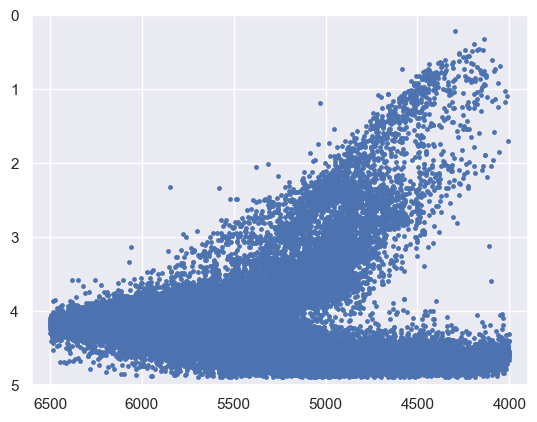

In [36]:
plt.scatter(data['teff'], data['logg'], s=6)
plt.xlim(6600, 3900)
plt.ylim(5, 0)

(5.0, 0.0)

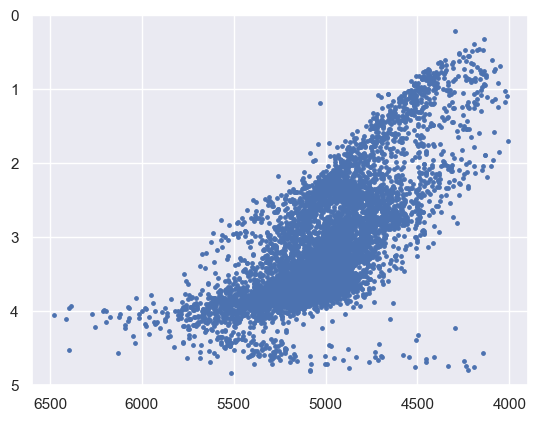

In [38]:
plt.scatter(Giants['teff'], Giants['logg'], s=6)
plt.xlim(6600, 3900)
plt.ylim(5, 0)

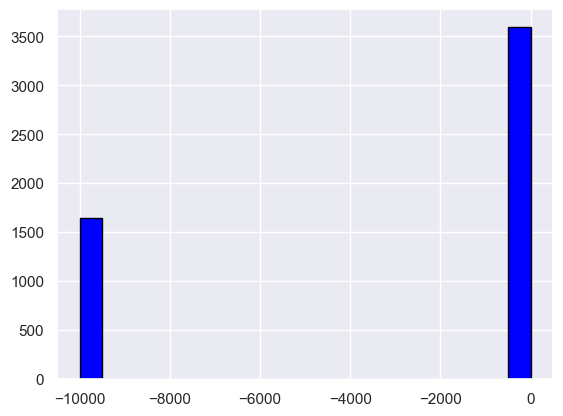

In [82]:
plt.hist(data['alpha_m'], bins=20, color='blue', edgecolor='black')
plt.show()

## Lamost Medium Resolution

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u

from joblib import Parallel, delayed
import multiprocessing

In [2]:
# Functions to separate the data in Dwarfs and Giants
def line(x):
    return ((3.6 - 3.2) / (5000 - 6000)) * (x - 6000) + 3.2

def line_above(x):
    if (x >= x2) and (x <= x1):  # for first line
        return ((y2 - y1) / (x2 - x1)) * (x - x1) + y1

    elif (x >= x3) and (x <= x2):  # for second line
        return ((y3 - y2) / (x3 - x2)) * (x - x2) + y2

def line_below(x):
    return ((y4 - y1) / (x4 - x1)) * (x - x4) + y4
    
def calculate_boundary_lines(x, y, x1, y1, x2, y2, x3, y3, x4, y4):
    df['above_line'] = df[y] < df[x].apply(line_above)
    df['below_line'] = df[y] > df[x].apply(line_below)

    selected_points = df[(df[x] >= 3000) & (df[x] <= 6000) & df['above_line'] & df['below_line']]

    return df, selected_points, ((x1, y1), (x2, y2)), ((x2, y2), (x3, line_above(x3))), ((x3, line_above(x3)), (x3, y4)), ((x3, y4), (x4, y4)), ((x4, y4), (x1, y1))

def plot_data(df, selected_points, additional_lines, xcol, ycol, title):
    plt.figure(figsize=(10, 8))
    
    for line_start, line_end in additional_lines:
        plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'g--')

    sns.scatterplot(x=df[xcol], y=df[ycol], s=2, color='red')
    sns.scatterplot(x=selected_points[xcol], y=selected_points[ycol], s=2, color='blue')

    plt.xlabel('Teff')
    plt.ylabel('logG')
    plt.title(title)
    plt.ylim(5, 0)
    plt.xlim(7500, 3000)
    plt.tight_layout()
    plt.savefig(title+'.png', dpi=300)
    plt.show()

#### Removendo colunas desnecessárias

In [5]:
LamostMedium = pd.read_table("E:\\IC\\BasesOriginais\\Treino\\LAMOSDR8-MedimResulution-SPLUS-2023.dat", encoding='latin-1', delimiter='; ', index_col = 'ID', engine='python')

In [6]:
LamostMedium

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ti_fe,cr_fe,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,-9999.0,-9999.0,-0.01894,-9999.0,0.280,0.031443,80.9,17,0,0.000129
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,-9999.0,-9999.0,-0.01598,-9999.0,0.036,0.030625,80.9,17,0,0.000137
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,-9999.0,-9999.0,0.05465,-9999.0,-9999.000,-9999.000000,80.9,17,0,0.000045
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,-9999.0,-9999.0,0.01725,-9999.0,-9999.000,-9999.000000,80.9,17,0,0.000112
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,-9999.0,-9999.0,0.02089,-9999.0,-0.001,0.030810,80.9,17,0,0.000107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,355.263192,-0.063397,16.9772,16.5469,16.2134,15.3793,15.1042,14.0872,13.9500,12.8679,...,-9999.0,-9999.0,-9999.00000,-9999.0,-9999.000,-9999.000000,28.4,13,1,0.000317
iDR4_3_STRIPE82-0168_0007054,356.771813,0.262417,17.5070,17.1828,16.8832,15.9271,15.6000,14.6258,14.5802,13.4021,...,-9999.0,-9999.0,-9999.00000,-9999.0,-9999.000,-9999.000000,28.4,13,1,0.000073
iDR4_3_STRIPE82-0170_0009610,358.077337,0.279884,17.4114,17.0688,16.7564,15.8510,15.5267,14.5760,14.5099,13.3320,...,-9999.0,-9999.0,-9999.00000,-9999.0,-9999.000,-9999.000000,28.4,13,1,0.000131


In [7]:
for i in LamostMedium:
    print(i)

RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
mobsid
obsid
uid
gp_id
designation
obsdate
lmjd
mjd
planid
spid
fiberid
lmjm
band
ra_obs
dec_obs
snr
gaia_source_id
gaia_g_mean_mag
gaia_bp_mean_mag
gaia_rp_mean_mag
tsource
fibertype
tfrom
tcomment
offsets
offsets_v
ra
dec
teff_lasp
teff_lasp_err
logg_lasp
logg_lasp_err
feh_lasp
feh_lasp_err
vsini_lasp
vsini_lasp_err
rv_b0
rv_b0_err
rv_b1
rv_b1_err
rv_b_flag
rv_r0
rv_r0_err
rv_r1
rv_r1_err
rv_r_flag
rv_br0
rv_br0_err
rv_br1
rv_br1_err
rv_br_flag
rv_lasp0
rv_lasp0_err
rv_lasp1
rv_lasp1_err
coadd
fibermask
alpha_m_cnn
teff_cnn
logg_cnn
feh_cnn
c_fe
n_fe
o_fe
mg_fe
al_fe
si_fe
s_fe
ca_fe
ti_fe
cr_fe
ni_fe
cu_fe
alpha_m_lasp
alpha_m_lasp_err
moon_angle
lunardate
moon_flg
rdistang


In [10]:
colunas = ['RA', 'DEC', 
           'u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z', 
           'e_u', 'e_J0378', 'e_J0395', 'e_J0410', 
           'e_J0430', 'e_g', 'e_J0515', 'e_r', 
           'e_J0660', 'e_i', 'e_J0861', 'e_z', 
           'teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn',
           'c_fe', 'n_fe', 'o_fe', 'mg_fe', 'al_fe', 'si_fe', 
           's_fe', 'ca_fe', 'ti_fe', 'cr_fe', 'ni_fe', 'cu_fe']

In [11]:
LamostMediumF1 = LamostMedium[colunas]

In [12]:
LamostMediumF1

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,o_fe,mg_fe,al_fe,si_fe,s_fe,ca_fe,ti_fe,cr_fe,ni_fe,cu_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,-9999.0,0.21311,-9999.0,0.09576,-9999.0,0.17627,-9999.0,-9999.0,-0.01894,-9999.0
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,-9999.0,0.05045,-9999.0,0.02364,-9999.0,-0.00332,-9999.0,-9999.0,-0.01598,-9999.0
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,-9999.0,0.11994,-9999.0,0.07189,-9999.0,0.04427,-9999.0,-9999.0,0.05465,-9999.0
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,-9999.0,0.03037,-9999.0,0.01720,-9999.0,-0.00675,-9999.0,-9999.0,0.01725,-9999.0
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,-9999.0,0.01526,-9999.0,0.02671,-9999.0,0.00043,-9999.0,-9999.0,0.02089,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,355.263192,-0.063397,16.9772,16.5469,16.2134,15.3793,15.1042,14.0872,13.9500,12.8679,...,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.0,-9999.00000,-9999.0
iDR4_3_STRIPE82-0168_0007054,356.771813,0.262417,17.5070,17.1828,16.8832,15.9271,15.6000,14.6258,14.5802,13.4021,...,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.0,-9999.00000,-9999.0
iDR4_3_STRIPE82-0170_0009610,358.077337,0.279884,17.4114,17.0688,16.7564,15.8510,15.5267,14.5760,14.5099,13.3320,...,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.0,-9999.00000,-9999.0


In [13]:
#LamostMediumF1.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF1.csv")

#### Utilizando apenas as colunas que tem pelo menos 50% das linhas com valores válidos

In [42]:
colunas = ['RA', 'DEC', 
           'u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z', 
           'e_u', 'e_J0378', 'e_J0395', 'e_J0410', 
           'e_J0430', 'e_g', 'e_J0515', 'e_r', 
           'e_J0660', 'e_i', 'e_J0861', 'e_z', 
           'teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn',
           'c_fe', 'ca_fe', 'n_fe', 'mg_fe', 'si_fe', 
           'ni_fe']

In [43]:
LamostMediumF2 = LamostMedium[colunas]

In [64]:
LamostMediumF2

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,5571.39,4.334,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,5848.15,4.414,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,5604.35,4.168,-0.232,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,5730.75,4.396,-0.111,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,5875.89,4.185,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,355.263192,-0.063397,16.9772,16.5469,16.2134,15.3793,15.1042,14.0872,13.9500,12.8679,...,-9999.00,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0168_0007054,356.771813,0.262417,17.5070,17.1828,16.8832,15.9271,15.6000,14.6258,14.5802,13.4021,...,-9999.00,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0170_0009610,358.077337,0.279884,17.4114,17.0688,16.7564,15.8510,15.5267,14.5760,14.5099,13.3320,...,-9999.00,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000


In [45]:
#LamostMediumF2.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF2.csv")

In [65]:
for i in LamostMediumF2:
    print(i)

RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
teff_cnn
logg_cnn
feh_cnn
alpha_m_cnn
c_fe
ca_fe
n_fe
mg_fe
si_fe
ni_fe


#### Removendo linhas com erro maior q 0.2

In [55]:
data = LamostMediumF2

In [56]:
LamostMediumF3 = data.loc[(data['e_u']<0.2) & (data['e_J0378']<0.2) &
                          (data['e_J0395']<0.2) & (data['e_J0410']<0.2) &
                          (data['e_J0430']<0.2) & (data['e_g']<0.2) &
                          (data['e_J0515']<0.2) & (data['e_r']<0.2) &
                          (data['e_J0660']<0.2) & (data['e_i']<0.2) &
                          (data['e_J0861']<0.2) & (data['e_z']<0.2),
                          ['RA', 'DEC', 
                           'u', 'J378', 'J395', 'J410', 
                           'J430', 'g', 'J515', 'r', 
                           'J660', 'i', 'J861', 'z', 
                           'teff_cnn', 'logg_cnn', 
                           'feh_cnn', 'alpha_m_cnn',
                           'c_fe', 'ca_fe', 'n_fe', 
                           'mg_fe', 'si_fe', 'ni_fe']]

In [57]:
LamostMediumF3

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,5571.39,4.334,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,5848.15,4.414,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,5604.35,4.168,-0.232,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,5730.75,4.396,-0.111,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,5875.89,4.185,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,355.263192,-0.063397,16.9772,16.5469,16.2134,15.3793,15.1042,14.0872,13.9500,12.8679,...,-9999.00,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0168_0007054,356.771813,0.262417,17.5070,17.1828,16.8832,15.9271,15.6000,14.6258,14.5802,13.4021,...,-9999.00,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0170_0009610,358.077337,0.279884,17.4114,17.0688,16.7564,15.8510,15.5267,14.5760,14.5099,13.3320,...,-9999.00,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000


In [51]:
#LamostMediumF3.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF3.csv")

#### Removendo linhas onde têm valores "-9999" para todas as colunas de parametros

In [52]:
colunas_interesse = ['teff_cnn', 'logg_cnn', 
                     'feh_cnn', 'alpha_m_cnn',
                     'c_fe', 'ca_fe', 'n_fe', 
                     'mg_fe', 'si_fe', 'ni_fe']

In [58]:
mask = (LamostMediumF3[colunas_interesse] != '-9999') & (LamostMediumF3[colunas_interesse] != -9999)

In [59]:
mask

,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0031473,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0030314,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0040540,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0038116,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,False,False,False,False,False,False,False,False,False,False
iDR4_3_STRIPE82-0168_0007054,False,False,False,False,False,False,False,False,False,False
iDR4_3_STRIPE82-0170_0009610,False,False,False,False,False,False,False,False,False,False


In [61]:
LamostMediumF4 = LamostMediumF3[mask.any(axis=1)]

In [62]:
LamostMediumF4

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,5571.39,4.334,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,5848.15,4.414,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,5604.35,4.168,-0.232,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,5730.75,4.396,-0.111,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,5875.89,4.185,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0164_0045592,354.498441,1.010227,14.3294,13.8563,13.8636,13.4300,13.3772,13.1420,12.9919,13.9815,...,6078.74,4.159,-0.228,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0164_0032054,354.411257,0.709645,15.3607,15.1260,14.9610,14.2464,14.1642,13.6209,13.4941,13.5566,...,4953.50,4.713,-0.598,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0164_0041441,354.585730,0.923815,16.0942,15.8056,15.5643,14.8889,14.7040,14.0492,13.9361,13.2655,...,4599.52,4.443,-0.296,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000


In [63]:
#LamostMediumF4.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF4-9999.csv")

In [66]:
for i in LamostMediumF4:
    print(i)

RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
teff_cnn
logg_cnn
feh_cnn
alpha_m_cnn
c_fe
ca_fe
n_fe
mg_fe
si_fe
ni_fe


#### Adicionando coordenadas galácticas

In [67]:
data = LamostMediumF4

In [69]:
ra_true = data["RA"]
dec_true = data[ "DEC"]
icrs_true = SkyCoord(ra=ra_true*u.degree, dec=dec_true*u.degree, frame='icrs')
gal_true = icrs_true.galactic
l_rad_true = gal_true.l.radian
l_rad_true[l_rad_true > np.pi] -= 2. * np.pi # LONGITUDE
b_rad_true = gal_true.b.radian               # LATITUDE
b_deg_true = b_rad_true * (180/np.pi) #gal.b.degree#b_rad * (180/np.pi)
l_deg_true = l_rad_true * (180/np.pi)

data['Latitude'] = b_deg_true
data['Longitude'] = l_deg_true

C:\Users\alber\AppData\Local\Temp\ipykernel_7216\4216307443.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Latitude'] = b_deg_true
C:\Users\alber\AppData\Local\Temp\ipykernel_7216\4216307443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Longitude'] = l_deg_true


In [76]:
data["Longitude"]

ID
iDR4_3_SPLUS-n02n18_0034008    -97.097479
iDR4_3_SPLUS-n02n18_0031473    -96.855461
iDR4_3_SPLUS-n02n18_0030314    -96.560871
iDR4_3_SPLUS-n02n18_0040540    -96.896480
iDR4_3_SPLUS-n02n18_0038116    -96.982731
                                  ...    
iDR4_3_STRIPE82-0164_0045592    87.847475
iDR4_3_STRIPE82-0164_0032054    87.427737
iDR4_3_STRIPE82-0164_0041441    87.903825
iDR4_3_STRIPE82-0166_0037167    89.051349
iDR4_3_STRIPE82-0163_0039628    86.163287
Name: Longitude, Length: 9039, dtype: float64

In [77]:
LamostMediumF5 = data

In [78]:
#LamostMediumF5.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF5.csv")

#### Fazendo corte na temperatura

In [80]:
# corte feito para remover estrelas jovens que parecem anâs por terem um disco de acreção 
LamostMediumF6 = LamostMediumF5.loc[(LamostMediumF5['teff_cnn']>4000) & 
                          (LamostMediumF5['teff_cnn']<6500)]

In [82]:
LamostMediumF6#.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF5-TeffCut.csv")

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,58.581196,-97.097479
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,58.767176,-96.855461
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,-0.232,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465,58.914942,-96.560871
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,-0.111,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725,58.388485,-96.896480
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,58.441582,-96.982731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0164_0045592,354.498441,1.010227,14.3294,13.8563,13.8636,13.4300,13.3772,13.1420,12.9919,13.9815,...,-0.228,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-56.773240,87.847475
iDR4_3_STRIPE82-0164_0032054,354.411257,0.709645,15.3607,15.1260,14.9610,14.2464,14.1642,13.6209,13.4941,13.5566,...,-0.598,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-56.986197,87.427737
iDR4_3_STRIPE82-0164_0041441,354.585730,0.923815,16.0942,15.8056,15.5643,14.8889,14.7040,14.0492,13.9361,13.2655,...,-0.296,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-56.892126,87.903825


In [83]:
#LamostMediumF6.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF6-TeffCut.csv")

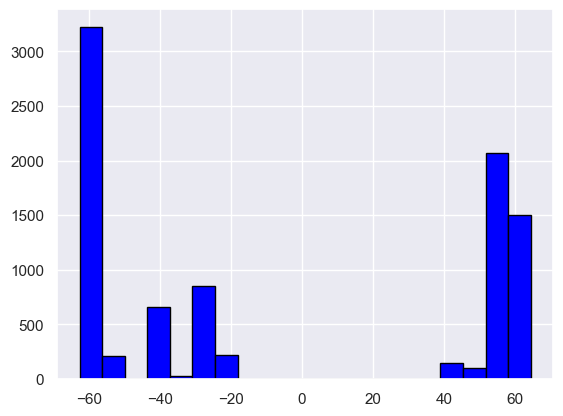

In [89]:
# Não precisa fazer o corte na latitude pq ja n tem entre -15 e 15
plt.hist(LamostMediumF6['Latitude'], bins=20, color='blue', edgecolor='black')
plt.show()

#### Adicionando colunas de cores e parametros do GAIA

In [4]:
LamostMedium = pd.read_table("E:\IC\FiltroBases\LamostMedium\LamostMediumF6-TeffCut.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [5]:
LamostMediumGAIA = pd.read_table("E:\\IC\\BasesOriginais\\Treino-GAIA\\LAMOSDR8-MedimResulution-SPLUS-2023-GAIA.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [6]:
LamostMediumGAIA[['snr']]

,snr
ID,
iDR4_3_SPLUS-n02n26_0026501,25.07
iDR4_3_SPLUS-n02n26_0027369,26.34
iDR4_3_SPLUS-n02n26_0021101,15.89
iDR4_3_SPLUS-n02n26_0023506,68.84
iDR4_3_SPLUS-n02n26_0028118,109.90
...,...
iDR4_3_STRIPE82-0165_0033610,46.37
iDR4_3_STRIPE82-0168_0007054,48.50
iDR4_3_STRIPE82-0170_0009610,35.81


In [8]:
for i in LamostMediumGAIA:
    print(i)

RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
mobsid
obsid
uid
gp_id
designation
obsdate
lmjd
mjd
planid
spid
fiberid
lmjm
band
ra_obs
dec_obs
snr
gaia_source_id
gaia_g_mean_mag
gaia_bp_mean_mag
gaia_rp_mean_mag
tsource
fibertype
tfrom
tcomment
offsets
offsets_v
ra
dec
teff_lasp
teff_lasp_err
logg_lasp
logg_lasp_err
feh_lasp
feh_lasp_err
vsini_lasp
vsini_lasp_err
rv_b0
rv_b0_err
rv_b1
rv_b1_err
rv_b_flag
rv_r0
rv_r0_err
rv_r1
rv_r1_err
rv_r_flag
rv_br0
rv_br0_err
rv_br1
rv_br1_err
rv_br_flag
rv_lasp0
rv_lasp0_err
rv_lasp1
rv_lasp1_err
coadd
fibermask
alpha_m_cnn
teff_cnn
logg_cnn
feh_cnn
c_fe
n_fe
o_fe
mg_fe
al_fe
si_fe
s_fe
ca_fe
ti_fe
cr_fe
ni_fe
cu_fe
alpha_m_lasp
alpha_m_lasp_err
moon_angle
lunardate
moon_flg
rdistang
DR3Name
RAdeg
DEdeg
errHalfMaj
errHalfMin
errPosAng
SolID
Source
RandomI
e_RAdeg
e_DEdeg
Plx
e_Plx
RPlx
PM
pmRA
e_pmRA
pmDE
e_pmDE
RADEcor
RAPlxcor
RApmRAcor
RApmDEcor
DEPlxcor
D

In [7]:
colunas_a_adicionar = ['snr','Gmag', 'BP-RP', 'E(BP-RP)', 'Plx']
df_merged = LamostMedium.merge(LamostMediumGAIA[colunas_a_adicionar], left_index=True, right_index=True)

In [8]:
df_merged

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,mg_fe,si_fe,ni_fe,Latitude,Longitude,snr,Gmag,BP-RP,E(BP-RP),Plx
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0027520,174.504121,0.289674,14.6285,14.2364,14.1807,13.7624,13.7169,13.5156,13.3495,13.1663,...,0.09115,0.07510,-0.00757,57.887019,-93.394426,28.10,13.196921,0.712432,0.0273,1.6485
iDR4_3_SPLUS-n01s18_0029310,174.102393,0.198363,13.7110,13.1413,12.9715,12.6804,12.6294,12.4968,12.3696,12.3305,...,0.09689,0.04636,0.01638,57.596452,-93.941604,20.44,12.321498,0.554988,0.0557,0.9673
iDR4_3_SPLUS-n01s18_0030579,173.304781,0.438092,16.3284,16.1394,15.9176,15.0265,14.8302,14.2412,14.1259,13.5030,...,0.02735,-0.03987,-0.01768,57.364420,-95.429534,14.12,13.563224,1.196886,0.0057,3.8179
iDR4_3_SPLUS-n01s18_0030579,173.304781,0.438092,16.3284,16.1394,15.9176,15.0265,14.8302,14.2412,14.1259,13.5030,...,0.02735,-0.03987,-0.01768,57.364420,-95.429534,10.46,13.563224,1.196886,0.0057,3.8179
iDR4_3_SPLUS-n01s18_0030579,173.304781,0.438092,16.3284,16.1394,15.9176,15.0265,14.8302,14.2412,14.1259,13.5030,...,0.04710,-0.03127,-0.00681,57.364420,-95.429534,14.12,13.563224,1.196886,0.0057,3.8179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0016094,357.893290,0.463416,15.1571,14.8103,14.7532,14.1530,14.0836,13.7961,13.6007,13.3907,...,-9999.00000,-9999.00000,-9999.00000,-58.879488,92.954886,24.33,13.483616,0.823112,0.0008,1.1944
iDR4_3_STRIPE82-0170_0017644,358.049996,0.501032,14.1351,13.7577,13.7168,13.2168,13.1389,12.9201,12.7478,12.7456,...,-9999.00000,-9999.00000,-9999.00000,-58.915121,93.259128,34.92,12.640942,0.746389,NaN,2.0287
iDR4_3_STRIPE82-0170_0022460,358.163533,0.653778,15.0666,14.6539,14.6086,14.2064,14.1399,13.9242,13.7610,13.5562,...,-9999.00000,-9999.00000,-9999.00000,-58.827608,93.586045,19.20,13.619414,0.764412,0.0864,1.0775


In [12]:
#df_merged.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF7-GAIA.csv")

#### removendo linhas com sinal ruido na banda r maior q 20

In [4]:
LamostMedium = pd.read_table("E:\IC\FiltroBases\LamostMedium\LamostMediumF7-GAIA.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [5]:
LamostMedium

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,mg_fe,si_fe,ni_fe,Latitude,Longitude,snr,Gmag,BP-RP,E(BP-RP),Plx
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0027520,174.504121,0.289674,14.6285,14.2364,14.1807,13.7624,13.7169,13.5156,13.3495,13.1663,...,0.09115,0.07510,-0.00757,57.887019,-93.394426,28.10,13.196921,0.712432,0.0273,1.6485
iDR4_3_SPLUS-n01s18_0029310,174.102393,0.198363,13.7110,13.1413,12.9715,12.6804,12.6294,12.4968,12.3696,12.3305,...,0.09689,0.04636,0.01638,57.596452,-93.941604,20.44,12.321498,0.554988,0.0557,0.9673
iDR4_3_SPLUS-n01s18_0030579,173.304781,0.438092,16.3284,16.1394,15.9176,15.0265,14.8302,14.2412,14.1259,13.5030,...,0.02735,-0.03987,-0.01768,57.364420,-95.429534,14.12,13.563224,1.196886,0.0057,3.8179
iDR4_3_SPLUS-n01s18_0030579,173.304781,0.438092,16.3284,16.1394,15.9176,15.0265,14.8302,14.2412,14.1259,13.5030,...,0.02735,-0.03987,-0.01768,57.364420,-95.429534,10.46,13.563224,1.196886,0.0057,3.8179
iDR4_3_SPLUS-n01s18_0030579,173.304781,0.438092,16.3284,16.1394,15.9176,15.0265,14.8302,14.2412,14.1259,13.5030,...,0.04710,-0.03127,-0.00681,57.364420,-95.429534,14.12,13.563224,1.196886,0.0057,3.8179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0016094,357.893290,0.463416,15.1571,14.8103,14.7532,14.1530,14.0836,13.7961,13.6007,13.3907,...,-9999.00000,-9999.00000,-9999.00000,-58.879488,92.954886,24.33,13.483616,0.823112,0.0008,1.1944
iDR4_3_STRIPE82-0170_0017644,358.049996,0.501032,14.1351,13.7577,13.7168,13.2168,13.1389,12.9201,12.7478,12.7456,...,-9999.00000,-9999.00000,-9999.00000,-58.915121,93.259128,34.92,12.640942,0.746389,NaN,2.0287
iDR4_3_STRIPE82-0170_0022460,358.163533,0.653778,15.0666,14.6539,14.6086,14.2064,14.1399,13.9242,13.7610,13.5562,...,-9999.00000,-9999.00000,-9999.00000,-58.827608,93.586045,19.20,13.619414,0.764412,0.0864,1.0775


In [6]:
data = LamostMedium

In [7]:
data = data.loc[(data['snr'] > 20)]

In [8]:
data

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,mg_fe,si_fe,ni_fe,Latitude,Longitude,snr,Gmag,BP-RP,E(BP-RP),Plx
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0027520,174.504121,0.289674,14.6285,14.2364,14.1807,13.7624,13.7169,13.5156,13.3495,13.1663,...,0.09115,0.07510,-0.00757,57.887019,-93.394426,28.10,13.196921,0.712432,0.0273,1.6485
iDR4_3_SPLUS-n01s18_0029310,174.102393,0.198363,13.7110,13.1413,12.9715,12.6804,12.6294,12.4968,12.3696,12.3305,...,0.09689,0.04636,0.01638,57.596452,-93.941604,20.44,12.321498,0.554988,0.0557,0.9673
iDR4_3_SPLUS-n01s18_0031529,174.286391,0.649844,14.6968,14.2483,14.2093,13.6599,13.6213,13.3802,13.2365,13.0464,...,0.06785,0.05026,0.00407,58.076316,-94.103399,34.84,13.126577,0.735276,0.0319,1.4135
iDR4_3_SPLUS-n01s18_0035026,174.223567,0.533914,14.6138,14.2112,14.1409,13.4584,13.3661,12.8804,12.6931,12.3070,...,0.28106,0.16079,0.06973,57.944774,-94.086223,55.77,12.330456,1.064746,0.1584,0.9719
iDR4_3_SPLUS-n01s19_0045021,174.965869,0.699250,15.7591,15.5182,15.1838,14.3195,14.1583,13.6300,13.4472,13.0339,...,-0.01282,-0.02333,0.03472,58.478045,-93.057052,24.45,13.119981,1.050423,0.0598,3.1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0008897,358.497008,0.251165,14.3007,13.9134,13.8833,13.4271,13.3576,13.1481,12.9918,12.9097,...,-9999.00000,-9999.00000,-9999.00000,-59.335125,93.830083,29.18,12.859244,0.748806,NaN,1.8565
iDR4_3_STRIPE82-0170_0012209,358.019145,0.351352,14.8895,14.5620,14.5302,13.9614,13.9046,13.6069,13.4203,13.1800,...,-9999.00000,-9999.00000,-9999.00000,-59.035769,93.077119,22.86,13.244224,0.856098,0.0966,2.0361
iDR4_3_STRIPE82-0170_0016094,357.893290,0.463416,15.1571,14.8103,14.7532,14.1530,14.0836,13.7961,13.6007,13.3907,...,-9999.00000,-9999.00000,-9999.00000,-58.879488,92.954886,24.33,13.483616,0.823112,0.0008,1.1944


In [9]:
#data.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF8-snr20.csv")

#### Removendo Objetos duplicados

In [25]:
# ISSO TA ERRADO, TEM QUE DESCOBRIR OS ARCSEC
def crossmatch(coords, threshold=3.3*u.arcsec):
    """
    Crossmatch coordinates and return indices of duplicates.
    """
    matches = []
    for i, coord in enumerate(coords):
        if i in matches:
            continue
        dist = coord.separation(coords)
        duplicate_indices = list(np.where(dist <= threshold)[0])
        matches.extend(duplicate_indices[1:])
    return matches

In [26]:
df = pd.read_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF8-snr20.csv")

In [27]:
df

,ID,RA,DEC,u,J378,J395,J410,J430,g,J515,...,mg_fe,si_fe,ni_fe,Latitude,Longitude,snr,Gmag,BP-RP,E(BP-RP),Plx
0,iDR4_3_SPLUS-n01s18_0027520,174.504121,0.289674,14.6285,14.2364,14.1807,13.7624,13.7169,13.5156,13.3495,...,0.09115,0.07510,-0.00757,57.887019,-93.394426,28.10,13.196921,0.712432,0.0273,1.6485
1,iDR4_3_SPLUS-n01s18_0029310,174.102393,0.198363,13.7110,13.1413,12.9715,12.6804,12.6294,12.4968,12.3696,...,0.09689,0.04636,0.01638,57.596452,-93.941604,20.44,12.321498,0.554988,0.0557,0.9673
2,iDR4_3_SPLUS-n01s18_0031529,174.286391,0.649844,14.6968,14.2483,14.2093,13.6599,13.6213,13.3802,13.2365,...,0.06785,0.05026,0.00407,58.076316,-94.103399,34.84,13.126577,0.735276,0.0319,1.4135
3,iDR4_3_SPLUS-n01s18_0035026,174.223567,0.533914,14.6138,14.2112,14.1409,13.4584,13.3661,12.8804,12.6931,...,0.28106,0.16079,0.06973,57.944774,-94.086223,55.77,12.330456,1.064746,0.1584,0.9719
4,iDR4_3_SPLUS-n01s19_0045021,174.965869,0.699250,15.7591,15.5182,15.1838,14.3195,14.1583,13.6300,13.4472,...,-0.01282,-0.02333,0.03472,58.478045,-93.057052,24.45,13.119981,1.050423,0.0598,3.1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,iDR4_3_STRIPE82-0170_0008897,358.497008,0.251165,14.3007,13.9134,13.8833,13.4271,13.3576,13.1481,12.9918,...,-9999.00000,-9999.00000,-9999.00000,-59.335125,93.830083,29.18,12.859244,0.748806,NaN,1.8565
17502,iDR4_3_STRIPE82-0170_0012209,358.019145,0.351352,14.8895,14.5620,14.5302,13.9614,13.9046,13.6069,13.4203,...,-9999.00000,-9999.00000,-9999.00000,-59.035769,93.077119,22.86,13.244224,0.856098,0.0966,2.0361
17503,iDR4_3_STRIPE82-0170_0016094,357.893290,0.463416,15.1571,14.8103,14.7532,14.1530,14.0836,13.7961,13.6007,...,-9999.00000,-9999.00000,-9999.00000,-58.879488,92.954886,24.33,13.483616,0.823112,0.0008,1.1944
17504,iDR4_3_STRIPE82-0170_0017644,358.049996,0.501032,14.1351,13.7577,13.7168,13.2168,13.1389,12.9201,12.7478,...,-9999.00000,-9999.00000,-9999.00000,-58.915121,93.259128,34.92,12.640942,0.746389,NaN,2.0287


In [28]:
# Convert RA, Dec to SkyCoord object
coords = SkyCoord(ra=df['RA']*u.degree, dec=df['DEC']*u.degree)

In [29]:
# Get duplicates using crossmatch
duplicates = crossmatch(coords)

In [30]:
# Remove duplicates from DataFrame
df_dedup = df.drop(index=duplicates)

In [31]:
df_dedup

,ID,RA,DEC,u,J378,J395,J410,J430,g,J515,...,mg_fe,si_fe,ni_fe,Latitude,Longitude,snr,Gmag,BP-RP,E(BP-RP),Plx
0,iDR4_3_SPLUS-n01s18_0027520,174.504121,0.289674,14.6285,14.2364,14.1807,13.7624,13.7169,13.5156,13.3495,...,0.09115,0.07510,-0.00757,57.887019,-93.394426,28.10,13.196921,0.712432,0.0273,1.6485
1,iDR4_3_SPLUS-n01s18_0029310,174.102393,0.198363,13.7110,13.1413,12.9715,12.6804,12.6294,12.4968,12.3696,...,0.09689,0.04636,0.01638,57.596452,-93.941604,20.44,12.321498,0.554988,0.0557,0.9673
2,iDR4_3_SPLUS-n01s18_0031529,174.286391,0.649844,14.6968,14.2483,14.2093,13.6599,13.6213,13.3802,13.2365,...,0.06785,0.05026,0.00407,58.076316,-94.103399,34.84,13.126577,0.735276,0.0319,1.4135
3,iDR4_3_SPLUS-n01s18_0035026,174.223567,0.533914,14.6138,14.2112,14.1409,13.4584,13.3661,12.8804,12.6931,...,0.28106,0.16079,0.06973,57.944774,-94.086223,55.77,12.330456,1.064746,0.1584,0.9719
4,iDR4_3_SPLUS-n01s19_0045021,174.965869,0.699250,15.7591,15.5182,15.1838,14.3195,14.1583,13.6300,13.4472,...,-0.01282,-0.02333,0.03472,58.478045,-93.057052,24.45,13.119981,1.050423,0.0598,3.1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,iDR4_3_STRIPE82-0170_0008897,358.497008,0.251165,14.3007,13.9134,13.8833,13.4271,13.3576,13.1481,12.9918,...,-9999.00000,-9999.00000,-9999.00000,-59.335125,93.830083,29.18,12.859244,0.748806,NaN,1.8565
17502,iDR4_3_STRIPE82-0170_0012209,358.019145,0.351352,14.8895,14.5620,14.5302,13.9614,13.9046,13.6069,13.4203,...,-9999.00000,-9999.00000,-9999.00000,-59.035769,93.077119,22.86,13.244224,0.856098,0.0966,2.0361
17503,iDR4_3_STRIPE82-0170_0016094,357.893290,0.463416,15.1571,14.8103,14.7532,14.1530,14.0836,13.7961,13.6007,...,-9999.00000,-9999.00000,-9999.00000,-58.879488,92.954886,24.33,13.483616,0.823112,0.0008,1.1944
17504,iDR4_3_STRIPE82-0170_0017644,358.049996,0.501032,14.1351,13.7577,13.7168,13.2168,13.1389,12.9201,12.7478,...,-9999.00000,-9999.00000,-9999.00000,-58.915121,93.259128,34.92,12.640942,0.746389,NaN,2.0287


In [10]:
df_dedup.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF9-dedup.csv")

#### Separando Anas e Gigantes

In [4]:
LamostMedium = pd.read_table("E:\IC\FiltroBases\LamostMedium\LamostMediumF9-dedup2.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [5]:
LamostMedium

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ti_fe,cr_fe,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040731,173.638800,1.714610,14.4674,13.8491,13.4166,13.1964,13.1867,13.2155,13.1267,13.2450,...,-9999.00000,-9999.00000,-0.07160,-9999.00000,0.196,0.041895,80.9,17,0,0.000080
iDR4_3_SPLUS-n02n18_0034154,173.171885,1.926119,15.9559,15.7484,15.5710,15.0110,14.9521,14.7596,14.5105,14.2577,...,-9999.00000,-9999.00000,0.04051,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000116
iDR4_3_SPLUS-n02n18_0036979,173.689265,1.826028,16.8530,16.5891,16.3335,15.6283,15.4750,14.9284,14.7499,14.2550,...,-9999.00000,-9999.00000,0.04424,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000045
iDR4_3_SPLUS-n02n18_0011190,173.228069,1.020458,13.4669,13.1403,13.0406,12.4474,12.3763,12.0801,11.8835,11.8635,...,-9999.00000,-9999.00000,0.03042,-9999.00000,0.118,0.058535,89.5,14,0,0.000133
iDR4_3_SPLUS-n02n18_0013484,173.364047,1.131175,15.3106,15.0910,14.8368,14.1467,13.9718,13.4401,13.2979,12.6957,...,0.00205,0.15625,-0.04826,-0.11327,-9999.000,-9999.000000,89.5,14,0,0.000194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0025373,357.936781,0.728426,17.2484,17.0562,16.7103,15.7293,15.4389,14.7230,14.6240,13.7744,...,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000162
iDR4_3_STRIPE82-0164_0049572,354.808610,1.252015,16.8377,16.5917,16.4131,15.3963,15.1455,14.4177,14.4022,13.4376,...,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000162
iDR4_3_STRIPE82-0164_0032603,354.566334,0.723002,17.3214,16.9961,16.6877,15.8597,15.5167,14.5870,14.5415,13.4572,...,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000145


In [6]:
colunas_interesse = ['teff_cnn', 'logg_cnn', 
                     'feh_cnn', 'alpha_m_cnn',
                     'c_fe', 'ca_fe', 'n_fe', 
                     'mg_fe', 'si_fe', 'ni_fe']

In [7]:
mask = (LamostMedium[colunas_interesse] != '-9999') & (LamostMedium[colunas_interesse] != -9999)

In [8]:
mask

,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040731,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0034154,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0036979,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0011190,True,True,True,True,True,True,True,True,True,True
iDR4_3_SPLUS-n02n18_0013484,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0025373,False,False,False,False,False,False,False,False,False,False
iDR4_3_STRIPE82-0164_0049572,False,False,False,False,False,False,False,False,False,False
iDR4_3_STRIPE82-0164_0032603,False,False,False,False,False,False,False,False,False,False


In [9]:
LamostMediumF4 = LamostMedium[mask.any(axis=1)]

In [12]:
LamostMediumF4

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ti_fe,cr_fe,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040731,173.638800,1.714610,14.4674,13.8491,13.4166,13.1964,13.1867,13.2155,13.1267,13.2450,...,-9999.00000,-9999.00000,-0.07160,-9999.00000,0.196,0.041895,80.9,17,0,0.000080
iDR4_3_SPLUS-n02n18_0034154,173.171885,1.926119,15.9559,15.7484,15.5710,15.0110,14.9521,14.7596,14.5105,14.2577,...,-9999.00000,-9999.00000,0.04051,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000116
iDR4_3_SPLUS-n02n18_0036979,173.689265,1.826028,16.8530,16.5891,16.3335,15.6283,15.4750,14.9284,14.7499,14.2550,...,-9999.00000,-9999.00000,0.04424,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000045
iDR4_3_SPLUS-n02n18_0011190,173.228069,1.020458,13.4669,13.1403,13.0406,12.4474,12.3763,12.0801,11.8835,11.8635,...,-9999.00000,-9999.00000,0.03042,-9999.00000,0.118,0.058535,89.5,14,0,0.000133
iDR4_3_SPLUS-n02n18_0013484,173.364047,1.131175,15.3106,15.0910,14.8368,14.1467,13.9718,13.4401,13.2979,12.6957,...,0.00205,0.15625,-0.04826,-0.11327,-9999.000,-9999.000000,89.5,14,0,0.000194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0164_0045592,354.498441,1.010227,14.3294,13.8563,13.8636,13.4300,13.3772,13.1420,12.9919,13.9815,...,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000029
iDR4_3_STRIPE82-0164_0032054,354.411257,0.709645,15.3607,15.1260,14.9610,14.2464,14.1642,13.6209,13.4941,13.5566,...,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000046
iDR4_3_STRIPE82-0164_0041441,354.585730,0.923815,16.0942,15.8056,15.5643,14.8889,14.7040,14.0492,13.9361,13.2655,...,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000039


In [13]:
#LamostMediumF4.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF10-deldup2-9999.csv")

In [14]:
LamostMedium = LamostMediumF4

In [15]:
df = LamostMedium       # define dataframes , you can put your own dataframe here
xcol = 'teff_cnn'               # define x-column
ycol = 'logg_cnn'               # define y-column

x1, y1 = 5800, 3.2            #starting pt of 1st line
x2, y2 = 4500, line(4500)    #ending pt of 1st line, starting pt of 2nd line
x3, y3 = 3020, 1              #ending pt of 2nd line, starting pt of 3rd line
x4, y4 = 4800, 0.05           #ending pt of 3rd line, starting pt of 4th line

In [16]:
df, selected_points, *additional_lines = calculate_boundary_lines(xcol, ycol, x1, y1, x2, y2, x3, y3, x4, y4)

C:\Users\alber\AppData\Local\Temp\ipykernel_32676\3312406937.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_line'] = df[y] < df[x].apply(line_above)
C:\Users\alber\AppData\Local\Temp\ipykernel_32676\3312406937.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['below_line'] = df[y] > df[x].apply(line_below)


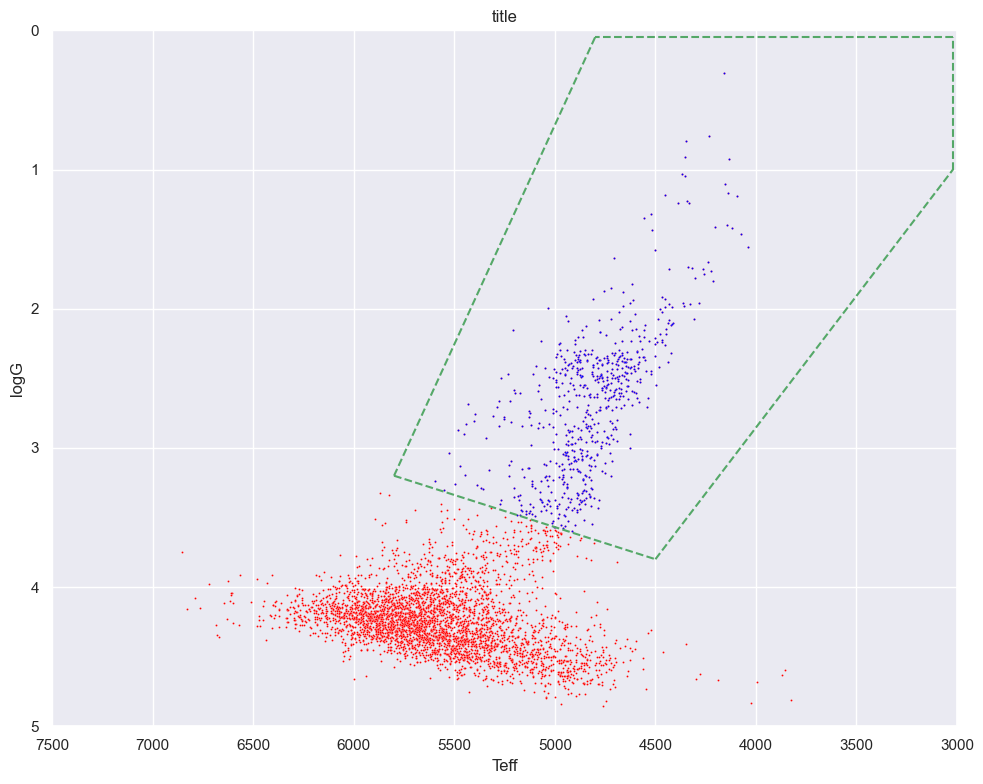

In [17]:
plot_data(df, selected_points, additional_lines, xcol, ycol, "title")

In [18]:
selected_points

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0011183,173.645958,1.042406,15.6944,15.4478,15.1774,14.5791,14.4430,13.9025,13.7024,13.2239,...,0.04453,-9999.00000,0.195,0.067209,89.5,14,0,0.000083,True,True
iDR4_3_SPLUS-n02n19_0022491,175.322764,1.358699,14.5038,14.0812,13.9118,13.2686,13.0893,12.5213,12.3137,12.4034,...,0.08145,0.13079,0.407,0.033447,89.5,14,0,0.000113,True,True
iDR4_3_SPLUS-n02n18_0003092,174.341984,0.712871,14.5073,14.1886,13.9423,13.0536,12.8167,12.2248,11.9268,11.9701,...,0.02627,0.06044,0.203,0.057183,89.5,14,0,0.000086,True,True
iDR4_3_SPLUS-n02n18_0011084,174.591727,1.040856,15.3706,15.0835,14.7788,13.9861,13.7223,13.0189,12.8604,13.0328,...,0.06559,0.07920,0.331,0.079011,89.5,14,0,0.000178,True,True
iDR4_3_SPLUS-n02n19_0008012,175.023540,0.890925,15.2658,14.8422,14.7613,14.0709,13.9447,13.4442,13.2198,12.8355,...,0.08781,0.05173,0.322,0.051350,89.5,14,0,0.000040,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0003456,358.134871,0.082066,15.9777,15.7157,15.2291,14.3452,13.9309,13.2158,13.0038,12.5625,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000041,True,True
iDR4_3_STRIPE82-0168_0002272,357.728057,0.052333,15.0474,14.7448,14.3914,13.6033,13.3878,12.7857,12.5466,12.8923,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000153,True,True
iDR4_3_STRIPE82-0164_0026402,354.345649,0.593174,15.4539,15.0710,15.0532,14.4563,14.3535,13.8499,13.6658,13.5671,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000182,True,True


In [19]:
df = df.reset_index()

In [20]:
merged = df.merge(selected_points, how='left', indicator=True)

In [21]:
result = merged[merged['_merge'] == 'left_only']

In [22]:
result = result.drop('_merge', axis=1)

In [23]:
result = result.set_index("ID")

In [24]:
result

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040731,173.638800,1.714610,14.4674,13.8491,13.4166,13.1964,13.1867,13.2155,13.1267,13.2450,...,-0.07160,-9999.00000,0.196,0.041895,80.9,17,0,0.000080,False,False
iDR4_3_SPLUS-n02n18_0034154,173.171885,1.926119,15.9559,15.7484,15.5710,15.0110,14.9521,14.7596,14.5105,14.2577,...,0.04051,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000116,False,True
iDR4_3_SPLUS-n02n18_0036979,173.689265,1.826028,16.8530,16.5891,16.3335,15.6283,15.4750,14.9284,14.7499,14.2550,...,0.04424,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000045,False,True
iDR4_3_SPLUS-n02n18_0011190,173.228069,1.020458,13.4669,13.1403,13.0406,12.4474,12.3763,12.0801,11.8835,11.8635,...,0.03042,-9999.00000,0.118,0.058535,89.5,14,0,0.000133,False,True
iDR4_3_SPLUS-n02n18_0013484,173.364047,1.131175,15.3106,15.0910,14.8368,14.1467,13.9718,13.4401,13.2979,12.6957,...,-0.04826,-0.11327,-9999.000,-9999.000000,89.5,14,0,0.000194,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0164_0045592,354.498441,1.010227,14.3294,13.8563,13.8636,13.4300,13.3772,13.1420,12.9919,13.9815,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000029,False,True
iDR4_3_STRIPE82-0164_0032054,354.411257,0.709645,15.3607,15.1260,14.9610,14.2464,14.1642,13.6209,13.4941,13.5566,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000046,False,True
iDR4_3_STRIPE82-0164_0041441,354.585730,0.923815,16.0942,15.8056,15.5643,14.8889,14.7040,14.0492,13.9361,13.2655,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000039,False,True


In [25]:
Giants = selected_points

In [26]:
Giants

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0011183,173.645958,1.042406,15.6944,15.4478,15.1774,14.5791,14.4430,13.9025,13.7024,13.2239,...,0.04453,-9999.00000,0.195,0.067209,89.5,14,0,0.000083,True,True
iDR4_3_SPLUS-n02n19_0022491,175.322764,1.358699,14.5038,14.0812,13.9118,13.2686,13.0893,12.5213,12.3137,12.4034,...,0.08145,0.13079,0.407,0.033447,89.5,14,0,0.000113,True,True
iDR4_3_SPLUS-n02n18_0003092,174.341984,0.712871,14.5073,14.1886,13.9423,13.0536,12.8167,12.2248,11.9268,11.9701,...,0.02627,0.06044,0.203,0.057183,89.5,14,0,0.000086,True,True
iDR4_3_SPLUS-n02n18_0011084,174.591727,1.040856,15.3706,15.0835,14.7788,13.9861,13.7223,13.0189,12.8604,13.0328,...,0.06559,0.07920,0.331,0.079011,89.5,14,0,0.000178,True,True
iDR4_3_SPLUS-n02n19_0008012,175.023540,0.890925,15.2658,14.8422,14.7613,14.0709,13.9447,13.4442,13.2198,12.8355,...,0.08781,0.05173,0.322,0.051350,89.5,14,0,0.000040,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0003456,358.134871,0.082066,15.9777,15.7157,15.2291,14.3452,13.9309,13.2158,13.0038,12.5625,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000041,True,True
iDR4_3_STRIPE82-0168_0002272,357.728057,0.052333,15.0474,14.7448,14.3914,13.6033,13.3878,12.7857,12.5466,12.8923,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000153,True,True
iDR4_3_STRIPE82-0164_0026402,354.345649,0.593174,15.4539,15.0710,15.0532,14.4563,14.3535,13.8499,13.6658,13.5671,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000182,True,True


In [27]:
Giants.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF10-Giants.csv")

In [28]:
Dwarfs = result

In [29]:
Dwarfs

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040731,173.638800,1.714610,14.4674,13.8491,13.4166,13.1964,13.1867,13.2155,13.1267,13.2450,...,-0.07160,-9999.00000,0.196,0.041895,80.9,17,0,0.000080,False,False
iDR4_3_SPLUS-n02n18_0034154,173.171885,1.926119,15.9559,15.7484,15.5710,15.0110,14.9521,14.7596,14.5105,14.2577,...,0.04051,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000116,False,True
iDR4_3_SPLUS-n02n18_0036979,173.689265,1.826028,16.8530,16.5891,16.3335,15.6283,15.4750,14.9284,14.7499,14.2550,...,0.04424,-9999.00000,-9999.000,-9999.000000,146.1,10,0,0.000045,False,True
iDR4_3_SPLUS-n02n18_0011190,173.228069,1.020458,13.4669,13.1403,13.0406,12.4474,12.3763,12.0801,11.8835,11.8635,...,0.03042,-9999.00000,0.118,0.058535,89.5,14,0,0.000133,False,True
iDR4_3_SPLUS-n02n18_0013484,173.364047,1.131175,15.3106,15.0910,14.8368,14.1467,13.9718,13.4401,13.2979,12.6957,...,-0.04826,-0.11327,-9999.000,-9999.000000,89.5,14,0,0.000194,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0164_0045592,354.498441,1.010227,14.3294,13.8563,13.8636,13.4300,13.3772,13.1420,12.9919,13.9815,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000029,False,True
iDR4_3_STRIPE82-0164_0032054,354.411257,0.709645,15.3607,15.1260,14.9610,14.2464,14.1642,13.6209,13.4941,13.5566,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000046,False,True
iDR4_3_STRIPE82-0164_0041441,354.585730,0.923815,16.0942,15.8056,15.5643,14.8889,14.7040,14.0492,13.9361,13.2655,...,-9999.00000,-9999.00000,-9999.000,-9999.000000,28.4,13,1,0.000039,False,True


In [30]:
Dwarfs.to_csv("E:\IC\FiltroBases\LamostMedium\LamostMediumF11-Dwarfs.csv")

#### Calculando as cores

In [31]:
colunas = ['u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z']

In [32]:
Params1 = ['teff_cnn', 'logg_cnn', 
           'feh_cnn', 'alpha_m_cnn',
           'c_fe', 'ca_fe', 'n_fe', 
           'mg_fe', 'si_fe', 'ni_fe']

In [53]:
Anas1 = pd.read_csv("E:\\IC\\FiltroBases\\LamostMedium\\LamostMediumF11-Dwarfs.csv", index_col = 'ID')

In [54]:
for i in Anas1:
    print(i)

RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
mobsid
obsid
uid
gp_id
designation
obsdate
lmjd
mjd
planid
spid
fiberid
lmjm
band
ra_obs
dec_obs
snr
gaia_source_id
gaia_g_mean_mag
gaia_bp_mean_mag
gaia_rp_mean_mag
tsource
fibertype
tfrom
tcomment
offsets
offsets_v
ra
dec
teff_lasp
teff_lasp_err
logg_lasp
logg_lasp_err
feh_lasp
feh_lasp_err
vsini_lasp
vsini_lasp_err
rv_b0
rv_b0_err
rv_b1
rv_b1_err
rv_b_flag
rv_r0
rv_r0_err
rv_r1
rv_r1_err
rv_r_flag
rv_br0
rv_br0_err
rv_br1
rv_br1_err
rv_br_flag
rv_lasp0
rv_lasp0_err
rv_lasp1
rv_lasp1_err
coadd
fibermask
alpha_m_cnn
teff_cnn
logg_cnn
feh_cnn
c_fe
n_fe
o_fe
mg_fe
al_fe
si_fe
s_fe
ca_fe
ti_fe
cr_fe
ni_fe
cu_fe
alpha_m_lasp
alpha_m_lasp_err
moon_angle
lunardate
moon_flg
rdistang
above_line
below_line


In [33]:
Anas1 = Dwarfs

In [34]:
AnasCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        AnasCores1[str(colunas[i] + '-' + colunas[j])] = Anas1[colunas[i]].astype(float) - Anas1[colunas[j]].astype(float)

In [35]:
for col in Params1:
    AnasCores1[col] = Anas1[col]

In [36]:
AnasCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040731,0.6183,1.0508,1.2710,1.2807,1.2519,1.3407,1.2224,1.0877,1.1028,0.9948,...,6614.94,4.099,-0.274,0.076,-0.26760,-0.03872,-0.13689,0.12154,0.08599,-0.07160
iDR4_3_SPLUS-n02n18_0034154,0.2075,0.3849,0.9449,1.0038,1.1963,1.4454,1.6982,1.7883,1.8254,1.8025,...,5645.36,4.312,-0.334,0.085,0.07561,0.08418,0.06322,0.16942,0.04026,0.04051
iDR4_3_SPLUS-n02n18_0036979,0.2639,0.5195,1.2247,1.3780,1.9246,2.1031,2.5980,2.6773,2.8487,2.9154,...,5044.25,3.626,-0.136,0.061,0.05919,0.08039,0.03626,0.13601,0.02489,0.04424
iDR4_3_SPLUS-n02n18_0011190,0.3266,0.4263,1.0195,1.0906,1.3868,1.5834,1.6034,1.7468,1.6009,1.9268,...,5632.16,4.148,0.001,0.001,-0.09541,0.01560,0.25512,-0.00759,-0.00156,0.03042
iDR4_3_SPLUS-n02n18_0013484,0.2196,0.4738,1.1639,1.3388,1.8705,2.0127,2.6149,2.7070,2.8212,2.9471,...,4776.82,4.266,-0.273,-0.021,-0.10056,0.17008,-0.13612,-0.12723,-0.14240,-0.04826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0164_0045592,0.4731,0.4658,0.8994,0.9522,1.1874,1.3375,0.3479,1.5321,0.8582,1.6254,...,6078.74,4.159,-0.228,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0164_0032054,0.2347,0.3997,1.1143,1.1965,1.7398,1.8666,1.8041,2.5429,2.3426,2.6659,...,4953.50,4.713,-0.598,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0164_0041441,0.2886,0.5299,1.2053,1.3902,2.0450,2.1581,2.8287,3.0373,2.9388,3.4185,...,4599.52,4.443,-0.296,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000


In [37]:
#AnasCores1.to_csv("E:\\IC\\FiltroBases\\LamostMedium\\LamostMediumF12-Colors-Dwarfs.csv")

In [12]:
Giants1 = pd.read_csv("E:\\IC\\FiltroBases\\LamostMedium\\LamostMediumF10-Giants.csv", index_col = 'ID')

In [38]:
Giants1 = Giants

In [39]:
GiantsCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        GiantsCores1[str(colunas[i] + '-' + colunas[j])] = Giants1[colunas[i]].astype(float) - Giants1[colunas[j]].astype(float)

In [40]:
for col in Params1:
    GiantsCores1[col] = Giants1[col]

In [41]:
GiantsCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0011183,0.2466,0.5170,1.1153,1.2514,1.7919,1.9920,2.4705,2.5338,2.6716,2.7148,...,5123.46,3.404,-0.311,0.018,0.06569,0.07622,0.04410,0.03736,0.01077,0.04453
iDR4_3_SPLUS-n02n19_0022491,0.4226,0.5920,1.2352,1.4145,1.9825,2.1901,2.1004,2.5813,2.3219,2.7946,...,4861.75,2.563,-0.403,0.185,0.12826,0.15959,0.10890,0.25274,0.19441,0.08145
iDR4_3_SPLUS-n02n18_0003092,0.3187,0.5650,1.4537,1.6906,2.2825,2.5805,2.5372,2.8415,2.6261,3.1762,...,4680.74,2.295,-0.233,0.115,0.08496,0.06443,0.05352,0.15806,0.12744,0.02627
iDR4_3_SPLUS-n02n18_0011084,0.2871,0.5918,1.3845,1.6483,2.3517,2.5102,2.3378,3.0494,2.8744,3.4317,...,4658.53,2.692,-0.142,0.140,0.14190,0.09657,0.13882,0.21324,0.12577,0.06559
iDR4_3_SPLUS-n02n19_0008012,0.4236,0.5045,1.1949,1.3211,1.8216,2.0460,2.4303,2.5587,2.5839,2.7900,...,4996.96,2.454,-0.605,0.218,0.18539,0.19597,0.08022,0.29907,0.19921,0.08781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0003456,0.2620,0.7486,1.6325,2.0468,2.7619,2.9739,3.4152,3.6347,3.6426,4.0637,...,4593.41,2.642,0.181,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0168_0002272,0.3026,0.6560,1.4441,1.6596,2.2617,2.5008,2.1551,2.9669,2.8835,3.3916,...,4885.68,3.077,-0.015,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000
iDR4_3_STRIPE82-0164_0026402,0.3829,0.4007,0.9976,1.1004,1.6040,1.7881,1.8868,2.3032,1.7787,2.4866,...,4939.95,3.279,-0.554,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000


In [42]:
#GiantsCores1.to_csv("E:\\IC\\FiltroBases\\LamostMedium\\LamostMediumF13-Colors-Giants.csv")

## Apogee

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
def line(x):
    return ((3.6 - 3.2) / (5000 - 6000)) * (x - 6000) + 3.2

def line_above(x):
    if (x >= x2) and (x <= x1):  # for first line
        return ((y2 - y1) / (x2 - x1)) * (x - x1) + y1

    elif (x >= x3) and (x <= x2):  # for second line
        return ((y3 - y2) / (x3 - x2)) * (x - x2) + y2

def line_below(x):
    return ((y4 - y1) / (x4 - x1)) * (x - x4) + y4
    
def calculate_boundary_lines(x, y, x1, y1, x2, y2, x3, y3, x4, y4):
    df['above_line'] = df[y] < df[x].apply(line_above)
    df['below_line'] = df[y] > df[x].apply(line_below)

    selected_points = df[(df[x] >= 3000) & (df[x] <= 6000) & df['above_line'] & df['below_line']]

    return df, selected_points, ((x1, y1), (x2, y2)), ((x2, y2), (x3, line_above(x3))), ((x3, line_above(x3)), (x3, y4)), ((x3, y4), (x4, y4)), ((x4, y4), (x1, y1))

def plot_data(df, selected_points, additional_lines, xcol, ycol, title):
    plt.figure(figsize=(10, 8))
    
    for line_start, line_end in additional_lines:
        plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'g--')

    sns.scatterplot(x=df[xcol], y=df[ycol], s=2, color='red')
    sns.scatterplot(x=selected_points[xcol], y=selected_points[ycol], s=2, color='blue')

    plt.xlabel('Teff')
    plt.ylabel('logG')
    plt.title(title)
    plt.ylim(5, 0)
    plt.xlim(7500, 3000)
    plt.tight_layout()
    plt.savefig(title+'.png', dpi=300)
    plt.show()

In [4]:
Apogee = pd.read_csv("E:\\IC\\BasesOriginais\\Treino\\APOGEE17-SPLUS-2023.csv", encoding='latin-1', index_col='ID')

In [5]:
Apogee

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,Separation
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,259,-0.374658,-0.318998,0.169824,0,NaN,NaN,1.0,2,0.023206
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,2,-0.074440,-0.018780,0.121650,0,NaN,NaN,1.0,2,0.060980
iDR4_3_HYDRA-0049_0001499,149.728746,-30.155433,18.1750,17.7574,17.3656,16.5470,16.3843,15.3304,15.1751,14.0518,...,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2,0.223815
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,259,-0.269075,-0.213415,0.090171,0,NaN,NaN,1.0,2,0.239731
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2,0.422780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0265033,86.617722,-65.089226,0.0000,14.7788,14.4817,13.7642,13.5903,13.0533,12.9039,12.3645,...,258,-0.190660,-0.135000,0.088471,0,NaN,NaN,1.0,2,0.345843
iDR4_3_MC0017_0266275,86.884789,-63.882481,0.0000,20.0189,0.0000,18.6543,18.1628,16.9993,16.6094,15.6169,...,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2,0.557258
iDR4_3_MC0017_0308393,85.611259,-63.961128,0.0000,0.0000,0.0000,18.6954,18.1728,16.9877,16.7200,15.7949,...,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2,0.191780


In [5]:
for i in Apogee:
    print(i)

RA_splus
DEC_splus
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
APOGEE_ID
FIELD
RA_apogee
DEC_apogee
GLON
GLAT
J
J_ERR
H
H_ERR
K
K_ERR
VERR
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CHI2
RV_CCFWHM
RV_AUTOFWHM
RV_FLAG
MIN_H
MAX_H
MIN_JK
MAX_JK
GAIAEDR3_SOURCE_ID
X_H
X_H_ERR
X_M
X_M_ERR
X_H_SPEC
X_M_SPEC
TEFF
TEFF_ERR
LOGG
LOGG_ERR
M_H
M_H_ERR
ALPHA_M
ALPHA_M_ERR
VMICRO
VMACRO
VSINI
TEFF_SPEC
LOGG_SPEC
C_FE
C_FE_SPEC
C_FE_ERR
C_FE_FLAG
CI_FE
CI_FE_SPEC
CI_FE_ERR
CI_FE_FLAG
N_FE
N_FE_SPEC
N_FE_ERR
N_FE_FLAG
O_FE
O_FE_SPEC
O_FE_ERR
O_FE_FLAG
NA_FE
NA_FE_SPEC
NA_FE_ERR
NA_FE_FLAG
MG_FE
MG_FE_SPEC
MG_FE_ERR
MG_FE_FLAG
AL_FE
AL_FE_SPEC
AL_FE_ERR
AL_FE_FLAG
SI_FE
SI_FE_SPEC
SI_FE_ERR
SI_FE_FLAG
P_FE
P_FE_SPEC
P_FE_ERR
P_FE_FLAG
S_FE
S_FE_SPEC
S_FE_ERR
S_FE_FLAG
K_FE
K_FE_SPEC
K_FE_ERR
K_FE_FLAG
CA_FE
CA_FE_SPEC
CA_FE_ERR
CA_FE_FLAG
TI_FE
TI_FE_SPEC
TI_FE_ERR
TI_FE_FLAG
TIII_FE
TIII_FE_SPEC
TIII_FE_ERR
TIII_FE_

In [6]:
colunas = ['RA_splus', 'DEC_splus', 
           'u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z', 'e_u', 
           'e_J0378', 'e_J0395', 'e_J0410',
           'e_J0430', 'e_g', 'e_J0515', 'e_r',
           'e_J0660', 'e_i', 'e_J0861', 'e_z',
           'TEFF', 'LOGG', 'FE_H', 'ALPHA_M',
           'C_FE', 'CA_FE', 'N_FE', 'NI_FE', 
           'MG_FE', 'SI_FE']

In [7]:
ApogeeF1 = Apogee[colunas]

In [8]:
ApogeeF1

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,TEFF,LOGG,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,4925.5347,3.227409,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,4564.2080,1.942220,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271
iDR4_3_HYDRA-0049_0001499,149.728746,-30.155433,18.1750,17.7574,17.3656,16.5470,16.3843,15.3304,15.1751,14.0518,...,3714.8013,4.689192,-0.121270,-0.018420,-0.040116,NaN,NaN,-0.067790,-0.033563,-0.018952
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,4713.7964,2.410644,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,4716.2810,5.078055,-0.982990,-0.255125,NaN,0.689696,0.482210,0.469040,-0.295521,-0.235247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0265033,86.617722,-65.089226,0.0000,14.7788,14.4817,13.7642,13.5903,13.0533,12.9039,12.3645,...,4819.9860,3.344231,-0.105790,0.208435,0.088405,0.173675,-0.041852,0.117115,0.311423,0.179911
iDR4_3_MC0017_0266275,86.884789,-63.882481,0.0000,20.0189,0.0000,18.6543,18.1628,16.9993,16.6094,15.6169,...,3779.6216,-0.097739,-0.918840,-0.017436,-0.006596,0.100215,0.091560,-0.029218,0.026334,-0.083337
iDR4_3_MC0017_0308393,85.611259,-63.961128,0.0000,0.0000,0.0000,18.6954,18.1728,16.9877,16.7200,15.7949,...,4023.3350,0.754406,-0.619210,0.068386,-0.400450,0.086185,0.242330,-0.068228,0.008232,0.028124


In [11]:
#ApogeeF1.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF1.csv")

#### Removendo linhas com erro maior q 0.2

In [9]:
data = ApogeeF1

In [10]:
ApogeeF2 = data.loc[(data['e_u']<0.2) & (data['e_J0378']<0.2) &
                          (data['e_J0395']<0.2) & (data['e_J0410']<0.2) &
                          (data['e_J0430']<0.2) & (data['e_g']<0.2) &
                          (data['e_J0515']<0.2) & (data['e_r']<0.2) &
                          (data['e_J0660']<0.2) & (data['e_i']<0.2) &
                          (data['e_J0861']<0.2) & (data['e_z']<0.2),
                          ['RA_splus', 'DEC_splus', 
                           'u', 'J378', 'J395', 'J410', 
                           'J430', 'g', 'J515', 'r', 
                           'J660', 'i', 'J861', 'z', 
                           'TEFF', 'LOGG', 'FE_H', 'ALPHA_M',
                           'C_FE', 'CA_FE', 'N_FE', 'NI_FE', 
                           'MG_FE', 'SI_FE']]

In [11]:
ApogeeF2

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,TEFF,LOGG,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,4925.5347,3.227409,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,4564.2080,1.942220,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271
iDR4_3_HYDRA-0049_0001499,149.728746,-30.155433,18.1750,17.7574,17.3656,16.5470,16.3843,15.3304,15.1751,14.0518,...,3714.8013,4.689192,-0.121270,-0.018420,-0.040116,NaN,NaN,-0.067790,-0.033563,-0.018952
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,4713.7964,2.410644,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,4716.2810,5.078055,-0.982990,-0.255125,NaN,0.689696,0.482210,0.469040,-0.295521,-0.235247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0265033,86.617722,-65.089226,0.0000,14.7788,14.4817,13.7642,13.5903,13.0533,12.9039,12.3645,...,4819.9860,3.344231,-0.105790,0.208435,0.088405,0.173675,-0.041852,0.117115,0.311423,0.179911
iDR4_3_MC0017_0266275,86.884789,-63.882481,0.0000,20.0189,0.0000,18.6543,18.1628,16.9993,16.6094,15.6169,...,3779.6216,-0.097739,-0.918840,-0.017436,-0.006596,0.100215,0.091560,-0.029218,0.026334,-0.083337
iDR4_3_MC0017_0308393,85.611259,-63.961128,0.0000,0.0000,0.0000,18.6954,18.1728,16.9877,16.7200,15.7949,...,4023.3350,0.754406,-0.619210,0.068386,-0.400450,0.086185,0.242330,-0.068228,0.008232,0.028124


In [12]:
#ApogeeF2.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF2.csv")

#### Removendo linhas que contém NaN em todas as colunas de parametros

In [13]:
colunas_interesse = ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M',
                     'C_FE', 'CA_FE', 'N_FE', 'NI_FE', 
                     'MG_FE', 'SI_FE']

In [14]:
mask = ApogeeF2[colunas_interesse].apply(lambda col: col.apply(lambda x: pd.notna(x)), axis=1)

In [15]:
mask

,TEFF,LOGG,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE
ID,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,True,True,True,True,True,True,True,True,True,True
iDR4_3_HYDRA-0049_0001461,True,True,True,True,True,True,True,True,True,True
iDR4_3_HYDRA-0049_0001499,True,True,True,True,True,False,False,True,True,True
iDR4_3_HYDRA-0049_0002887,True,True,True,True,True,True,True,True,True,True
iDR4_3_HYDRA-0049_0003935,True,True,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0265033,True,True,True,True,True,True,True,True,True,True
iDR4_3_MC0017_0266275,True,True,True,True,True,True,True,True,True,True
iDR4_3_MC0017_0308393,True,True,True,True,True,True,True,True,True,True


In [16]:
ApogeeF3 = ApogeeF2[mask.any(axis=1)]

In [17]:
ApogeeF3

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,TEFF,LOGG,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,4925.5347,3.227409,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,4564.2080,1.942220,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271
iDR4_3_HYDRA-0049_0001499,149.728746,-30.155433,18.1750,17.7574,17.3656,16.5470,16.3843,15.3304,15.1751,14.0518,...,3714.8013,4.689192,-0.121270,-0.018420,-0.040116,NaN,NaN,-0.067790,-0.033563,-0.018952
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,4713.7964,2.410644,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,4716.2810,5.078055,-0.982990,-0.255125,NaN,0.689696,0.482210,0.469040,-0.295521,-0.235247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264150,87.348450,-64.160378,14.3029,13.9540,13.8165,13.2796,13.1868,12.8285,12.6809,12.3404,...,5500.7817,4.084642,0.139680,-0.008439,-0.004583,0.043626,0.067933,-0.015650,-0.004144,0.089251
iDR4_3_MC0017_0265033,86.617722,-65.089226,0.0000,14.7788,14.4817,13.7642,13.5903,13.0533,12.9039,12.3645,...,4819.9860,3.344231,-0.105790,0.208435,0.088405,0.173675,-0.041852,0.117115,0.311423,0.179911
iDR4_3_MC0017_0266275,86.884789,-63.882481,0.0000,20.0189,0.0000,18.6543,18.1628,16.9993,16.6094,15.6169,...,3779.6216,-0.097739,-0.918840,-0.017436,-0.006596,0.100215,0.091560,-0.029218,0.026334,-0.083337


In [54]:
#ApogeeF3.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF3-9999.csv")

#### Alterando NaN por -999

In [18]:
ApogeeF4 = ApogeeF3.fillna(-999)

In [19]:
ApogeeF4

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,TEFF,LOGG,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,4925.5347,3.227409,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,4564.2080,1.942220,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271
iDR4_3_HYDRA-0049_0001499,149.728746,-30.155433,18.1750,17.7574,17.3656,16.5470,16.3843,15.3304,15.1751,14.0518,...,3714.8013,4.689192,-0.121270,-0.018420,-0.040116,-999.000000,-999.000000,-0.067790,-0.033563,-0.018952
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,4713.7964,2.410644,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,4716.2810,5.078055,-0.982990,-0.255125,-999.000000,0.689696,0.482210,0.469040,-0.295521,-0.235247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264150,87.348450,-64.160378,14.3029,13.9540,13.8165,13.2796,13.1868,12.8285,12.6809,12.3404,...,5500.7817,4.084642,0.139680,-0.008439,-0.004583,0.043626,0.067933,-0.015650,-0.004144,0.089251
iDR4_3_MC0017_0265033,86.617722,-65.089226,0.0000,14.7788,14.4817,13.7642,13.5903,13.0533,12.9039,12.3645,...,4819.9860,3.344231,-0.105790,0.208435,0.088405,0.173675,-0.041852,0.117115,0.311423,0.179911
iDR4_3_MC0017_0266275,86.884789,-63.882481,0.0000,20.0189,0.0000,18.6543,18.1628,16.9993,16.6094,15.6169,...,3779.6216,-0.097739,-0.918840,-0.017436,-0.006596,0.100215,0.091560,-0.029218,0.026334,-0.083337


In [20]:
#ApogeeF4.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF4-NaN.csv")

#### Adicionando coordenadas galácticas

In [15]:
data = ApogeeF4

In [16]:
ra_true = data["RA_splus"]
dec_true = data[ "DEC_splus"]
icrs_true = SkyCoord(ra=ra_true*u.degree, dec=dec_true*u.degree, frame='icrs')
gal_true = icrs_true.galactic
l_rad_true = gal_true.l.radian
l_rad_true[l_rad_true > np.pi] -= 2. * np.pi # LONGITUDE
b_rad_true = gal_true.b.radian               # LATITUDE
b_deg_true = b_rad_true * (180/np.pi) #gal.b.degree#b_rad * (180/np.pi)
l_deg_true = l_rad_true * (180/np.pi)

data['Latitude'] = b_deg_true
data['Longitude'] = l_deg_true

In [17]:
data

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324,19.375272,-95.919871
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271,19.411457,-95.900046
iDR4_3_HYDRA-0049_0001499,149.728746,-30.155433,18.1750,17.7574,17.3656,16.5470,16.3843,15.3304,15.1751,14.0518,...,-0.121270,-0.018420,-0.040116,-999.000000,-999.000000,-0.067790,-0.033563,-0.018952,19.423397,-95.883679
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970,19.319754,-96.019853
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,-0.982990,-0.255125,-999.000000,0.689696,0.482210,0.469040,-0.295521,-0.235247,20.048833,-95.156847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264150,87.348450,-64.160378,14.3029,13.9540,13.8165,13.2796,13.1868,12.8285,12.6809,12.3404,...,0.139680,-0.008439,-0.004583,0.043626,0.067933,-0.015650,-0.004144,0.089251,-30.939211,-86.385661
iDR4_3_MC0017_0265033,86.617722,-65.089226,0.0000,14.7788,14.4817,13.7642,13.5903,13.0533,12.9039,12.3645,...,-0.105790,0.208435,0.088405,0.173675,-0.041852,0.117115,0.311423,0.179911,-31.225565,-85.291060
iDR4_3_MC0017_0266275,86.884789,-63.882481,0.0000,20.0189,0.0000,18.6543,18.1628,16.9993,16.6094,15.6169,...,-0.918840,-0.017436,-0.006596,0.100215,0.091560,-0.029218,0.026334,-0.083337,-31.147892,-86.705148


In [18]:
ApogeeF5 = data

In [19]:
#data.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF5.csv")

#### Corte na Latitude

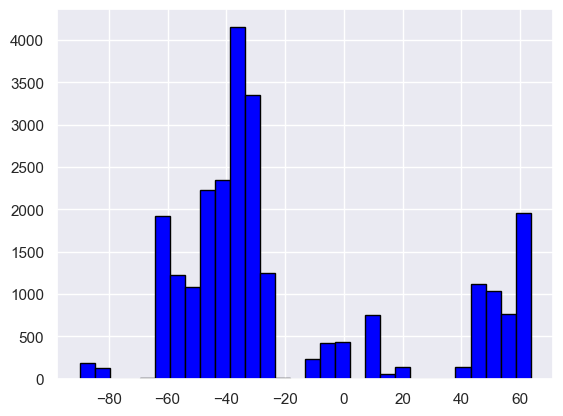

In [20]:
plt.hist(data['Latitude'], bins=30, color='blue', edgecolor='black')
plt.show()

In [21]:
# corte feito para remover estrelas no disco da galáxia que são mais dificeis de serem medidas
ApogeeF6 = ApogeeF5.loc[(ApogeeF5['Latitude']>15) | (ApogeeF5['Latitude']<-15)]

In [22]:
ApogeeF6

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324,19.375272,-95.919871
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271,19.411457,-95.900046
iDR4_3_HYDRA-0049_0001499,149.728746,-30.155433,18.1750,17.7574,17.3656,16.5470,16.3843,15.3304,15.1751,14.0518,...,-0.121270,-0.018420,-0.040116,-999.000000,-999.000000,-0.067790,-0.033563,-0.018952,19.423397,-95.883679
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970,19.319754,-96.019853
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,-0.982990,-0.255125,-999.000000,0.689696,0.482210,0.469040,-0.295521,-0.235247,20.048833,-95.156847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264150,87.348450,-64.160378,14.3029,13.9540,13.8165,13.2796,13.1868,12.8285,12.6809,12.3404,...,0.139680,-0.008439,-0.004583,0.043626,0.067933,-0.015650,-0.004144,0.089251,-30.939211,-86.385661
iDR4_3_MC0017_0265033,86.617722,-65.089226,0.0000,14.7788,14.4817,13.7642,13.5903,13.0533,12.9039,12.3645,...,-0.105790,0.208435,0.088405,0.173675,-0.041852,0.117115,0.311423,0.179911,-31.225565,-85.291060
iDR4_3_MC0017_0266275,86.884789,-63.882481,0.0000,20.0189,0.0000,18.6543,18.1628,16.9993,16.6094,15.6169,...,-0.918840,-0.017436,-0.006596,0.100215,0.091560,-0.029218,0.026334,-0.083337,-31.147892,-86.705148


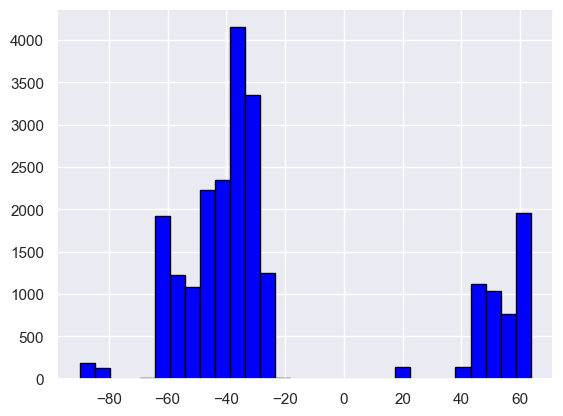

In [23]:
plt.hist(ApogeeF6['Latitude'], bins=30, color='blue', edgecolor='black')
plt.show()

In [25]:
#ApogeeF6.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF6-LatitudeCut.csv")

#### Corte na Temperatura

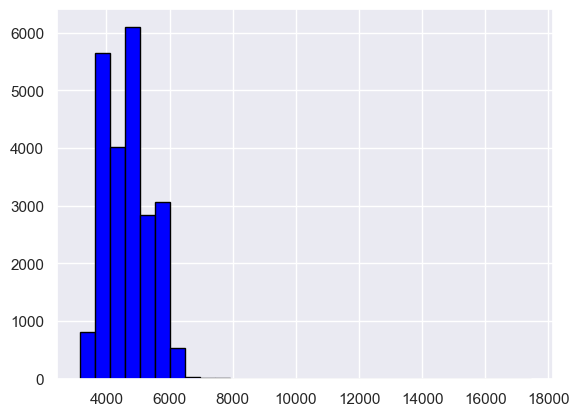

In [26]:
plt.hist(ApogeeF6['TEFF'], bins=30, color='blue', edgecolor='black')
plt.show()

In [27]:
data = ApogeeF6

In [28]:
# corte feito para remover estrelas jovens que parecem anâs por terem um disco de acreção 
ApogeeF7 = data.loc[(data['TEFF']>4000) & (data['TEFF']<6500)]

In [29]:
ApogeeF7

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324,19.375272,-95.919871
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271,19.411457,-95.900046
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970,19.319754,-96.019853
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,-0.982990,-0.255125,-999.000000,0.689696,0.482210,0.469040,-0.295521,-0.235247,20.048833,-95.156847
iDR4_3_HYDRA-0049_0003916,149.831840,-30.108189,18.7866,18.3984,18.0961,17.3326,16.9729,16.0735,15.9812,14.7999,...,-0.537400,0.006897,-0.003562,-0.029642,-999.000000,-0.030970,0.017738,-0.073097,19.516998,-95.843697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263778,87.990028,-64.621025,15.1050,14.8703,14.6108,13.8625,13.6898,13.1429,13.0075,12.4352,...,0.024604,-0.003296,-0.067984,0.008222,-0.176052,-0.018743,0.026603,-0.008903,-30.654857,-85.854421
iDR4_3_MC0017_0264138,86.472900,-64.184814,16.2925,16.0588,15.7505,15.1271,14.9725,14.4436,14.3094,13.7749,...,-0.023074,0.028167,0.007533,0.048831,0.125365,0.050654,0.060078,0.115396,-31.319919,-86.345944
iDR4_3_MC0017_0264150,87.348450,-64.160378,14.3029,13.9540,13.8165,13.2796,13.1868,12.8285,12.6809,12.3404,...,0.139680,-0.008439,-0.004583,0.043626,0.067933,-0.015650,-0.004144,0.089251,-30.939211,-86.385661


In [30]:
#ApogeeF7.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF7-TeffCut.csv")

#### Adicionando colunas de cores e parametros do GAIA

In [6]:
Apogee = pd.read_table("E:\IC\FiltroBases\Apogee\ApogeeF7-TeffCut.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [7]:
ApogeeGAIA = pd.read_table("E:\\IC\\BasesOriginais\\Treino-GAIA\\APOGEEDR17-splus-2023-GAIA.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [8]:
ApogeeGAIA

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
ID,,,,,,,,,,,,,,,,,,,,,
"iDR4_3_HYDRA-0049_0000596,149.6626610916276,-30.170155575115977,15.678,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,13.0874,12.9419,12.8556,12.8281,0.0653,0.0061,0.0074,0.0089,0.0056,0.0048,0.0017,0.0028,0.0011,0.0015,0.001,0.0017,0.0011,2M09583904-3010125,264+20,149.662668,-30.170158,264.0801589166622,19.37526685745948,11.865,0.026,11.396,0.023,11.3,0.022,55.23028,58.36713,0,,0,,20.403147,0.03955441,5154.3423,3.6159477,-0.19150707,0.0,0.0,2.4950085,19.726915,16.895075,0,7.0,12.2,0.5,0.8,5463742834863907456,""(-0.029220998, -0.095143005, 0.061377, 0.13005, 0.123962, 0.062386002, -0.038899004, 0.018791605, NaN, 0.02067, -0.033701003, 0.043432, -0.03135183, -0.173325, 0.558612, -0.045071002, -0.03570801, -0.043532, 0.133216, 0.028135497, NaN, NaN, NaN, -0.41819, NaN, NaN, NaN)"",""(0.025338693, 0.045715198, 0.02872337, 0.037878018, 0.1178089, 0.01868484, 0.040847093, 0.025021954, 0.20054191, 0.07025682, 0.05965757, 0.0259996, 0.040600974, 0.14477587, 0.16213752, 0.07354165, 0.025956169, 0.012785303, 0.14981042, 0.023794433, 0.009607656, 1.0, 1.0, 0.16982391, 0.1615382, 1.0, 0.10839222)"",""(0.014492, -0.05143, 0.10509, 0.173763, 0.167675, 0.106099, 0.004813995, 0.062504604, NaN, 0.064383, 0.010011997, 0.087145, 0.01236117, -0.129612, 0.60232496, -0.0013580024, 0.0080049895, 1.8100068E-4, 0.176929, 0.0718485, NaN, NaN, NaN, -0.374477, NaN, NaN, NaN)"",""(0.022996007, 0.044459492, 0.02667956, 0.036352597, 0.1182885, 0.015358716, 0.0422104, 0.022646526, 0.20054191, 0.069446295, 0.060599163, 0.023722272, 0.039181706, 0.14438426, 0.16248634, 0.074307516, 0.028052732, 0.016634213, 0.15018786, 0.026065458, 0.009607656, 1.0, 1.0, 0.17015697, 0.1615382, 1.0, 0.10839222)"",""(-0.029220998, -0.095143005, 0.061377, 0.073387, 0.10456, -0.0011369996, 0.10242, 0.024191003, NaN, -0.0031119995, -0.10346, 0.061437, -0.030925, -0.131574, 0.51365, -0.047485, -0.15261, -0.043532, 0.085145995, -0.015257001, NaN, NaN, NaN, -0.36253, NaN, NaN, NaN)"",""(0.014492, -0.05143, 0.10509, 0.1171, 0.148273, 0.042576, 0.146133, 0.067904, NaN, 0.040601, -0.059747, 0.10515, 0.012788, -0.087861, 0.557363, -0.0037720017, -0.108897, 1.8100068E-4, 0.128859, 0.028455999, NaN, NaN, NaN, -0.318817, NaN, NaN, NaN)"",4925.5347,20.384552,3.2274094,0.034842756,-0.043713,0.010641102,0.062435,0.25823632,1.0728648,0.0,1.5088289,4879.7,3.314,0.014311001,0.014311001,0.025338693,0,-0.051611006,-0.051611006,0.045715198,0,0.104909,0.104909,0.02872337,0,0.173582,0.116918996,0.037878018,0,0.167494,0.148092,0.1178089,0,0.105918005,0.042395,0.01868484,0,0.0046329945,0.145952,0.040847093,0,0.062323604,0.067723006,0.025021954,0,,,0.20054191,2,0.064201996,0.04042,0.07025682,0,0.009830996,-0.059928,0.05965757,0,0.086964,0.104968995,0.0259996,0,0.012180168,0.012606999,0.040600974,0,-0.129793,-0.088042006,0.14477587,0,0.602144,0.557182,0.16213752,0,-0.0015390031,-0.0039530024,0.07354165,0,0.007823989,-0.109078005,0.025956169,0,-0.043532,-0.043532,0.012785303,0,0.176748,0.128678,0.14981042,0,0.07166749,0.028274998,0.023794433,0,,,,259,-0.374658,-0.31899798,0.16982391,0,,,1.0,2,0.0232057109276386,Gaia DR3 5463742834863907456,149.66263811822,-30.17015927239,0.0,0.0,35.0,1636148068921376768,5463742834863907456,529561416,0.0103,0.0106,0.6462,0.0132,49.0677,5.652,-5.504,0.014,1.283,0.013,0.0547,-0.1385,0.041,0.1819,-0.0796,0.1668,-0.2751,-0.0054,-0.069,0.1447,291,0,290,1,-0.5118,275.59,0.0,0.0,31,false,1.485,,,,,,,,34,19,0.020078,35,0.0128,43.2,0,0,0.977,0,294,86031.73931,11.467,7502.54,13.35072,0.002759,33,39743.5,22.6619,1753.75,13.840378,0.002858,33,65799.7,25.2667,2604.21,12.702335,0.003802,1.227,0,0,0,0,0,1.138042,0.489657,0.648385,19.58,1.67,2,18,1,14,11.233,,,922.048,,4750.0,2.5,-0.5,111,,,,12.466764,0.029532,17,,NOT_AVAILABLE,0.0,0.0,0.999982,4930.5,4886.7,4940.0,3.2523,3.171,3.2889,-0.2494,-0.2622,-0.243

In [33]:
for i in ApogeeGAIA:
    print(i)

RA_splus
DEC_splus
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
APOGEE_ID
FIELD
RA_apogee
DEC_apogee
GLON
GLAT
J
J_ERR
H
H_ERR
K
K_ERR
SNR
SNREV
STARFLAG
STARFLAGS
ANDFLAG
ANDFLAGS
VHELIO_AVG
VERR
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CHI2
RV_CCFWHM
RV_AUTOFWHM
RV_FLAG
MIN_H
MAX_H
MIN_JK
MAX_JK
GAIAEDR3_SOURCE_ID
X_H
X_H_ERR
X_M
X_M_ERR
X_H_SPEC
X_M_SPEC
TEFF
TEFF_ERR
LOGG
LOGG_ERR
M_H
M_H_ERR
ALPHA_M
ALPHA_M_ERR
VMICRO
VMACRO
VSINI
TEFF_SPEC
LOGG_SPEC
C_FE
C_FE_SPEC
C_FE_ERR
C_FE_FLAG
CI_FE
CI_FE_SPEC
CI_FE_ERR
CI_FE_FLAG
N_FE
N_FE_SPEC
N_FE_ERR
N_FE_FLAG
O_FE
O_FE_SPEC
O_FE_ERR
O_FE_FLAG
NA_FE
NA_FE_SPEC
NA_FE_ERR
NA_FE_FLAG
MG_FE
MG_FE_SPEC
MG_FE_ERR
MG_FE_FLAG
AL_FE
AL_FE_SPEC
AL_FE_ERR
AL_FE_FLAG
SI_FE
SI_FE_SPEC
SI_FE_ERR
SI_FE_FLAG
P_FE
P_FE_SPEC
P_FE_ERR
P_FE_FLAG
S_FE
S_FE_SPEC
S_FE_ERR
S_FE_FLAG
K_FE
K_FE_SPEC
K_FE_ERR
K_FE_FLAG
CA_FE
CA_FE_SPEC
CA_FE_ERR
CA_FE_FLAG
TI_FE
TI_FE_SPEC
TI_FE

In [34]:
colunas_a_adicionar = ['SNR', 'Gmag', 'BP-RP', 'E(BP-RP)', 'Plx']
df_merged = Apogee.merge(ApogeeGAIA[colunas_a_adicionar], left_index=True, right_index=True)

In [35]:
df_merged

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,NI_FE,MG_FE,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx
ID,,,,,,,,,,,,,,,,,,,,,


In [36]:
#df_merged.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF8-GAIA.csv")

#### removendo linhas com sinal ruido na banda r maior q 20

In [3]:
#Apogee = pd.read_table("E:\IC\FiltroBases\Apogee\ApogeeF8-GAIA.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [37]:
#data = Apogee
data = df_merged

In [38]:
data

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,NI_FE,MG_FE,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx
ID,,,,,,,,,,,,,,,,,,,,,


In [7]:
data = data.loc[(data['SNR'] > 20)]

In [8]:
data

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,NI_FE,MG_FE,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,0.071667,0.105918,0.062324,19.375272,-95.919871,55.230280,13.350720,1.138042,0.0693,0.6462
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,0.006463,0.202743,0.111271,19.411457,-95.900046,56.187870,13.809707,1.369083,0.2589,0.1215
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,0.031642,0.067856,0.033970,19.319754,-96.019853,120.654236,12.051780,1.286466,NaN,0.5195
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,0.469040,-0.295521,-0.235247,20.048833,-95.156847,35.326770,13.778233,1.149013,0.0759,2.0874
iDR4_3_HYDRA-0049_0003916,149.831840,-30.108189,18.7866,18.3984,18.0961,17.3326,16.9729,16.0735,15.9812,14.7999,...,-0.030970,0.017738,-0.073097,19.516998,-95.843697,39.563320,14.901046,1.810518,0.2618,5.0548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263778,87.990028,-64.621025,15.1050,14.8703,14.6108,13.8625,13.6898,13.1429,13.0075,12.4352,...,-0.018743,0.026603,-0.008903,-30.654857,-85.854421,144.684190,12.533663,1.134965,0.0311,5.2568
iDR4_3_MC0017_0264138,86.472900,-64.184814,16.2925,16.0588,15.7505,15.1271,14.9725,14.4436,14.3094,13.7749,...,0.050654,0.060078,0.115396,-31.319919,-86.345944,46.049050,14.083789,1.117580,NaN,1.9171
iDR4_3_MC0017_0264150,87.348450,-64.160378,14.3029,13.9540,13.8165,13.2796,13.1868,12.8285,12.6809,12.3404,...,-0.015650,-0.004144,0.089251,-30.939211,-86.385661,109.038030,12.434890,0.905084,NaN,1.6034


#### Separando Anas e Gigantes

In [4]:
Apogee = pd.read_table("E:\IC\FiltroBases\Apogee\ApogeeF8-GAIA.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [9]:
Apogee

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,NI_FE,MG_FE,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,0.071667,0.105918,0.062324,19.375272,-95.919871,55.230280,13.350720,1.138042,0.0693,0.6462
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,0.006463,0.202743,0.111271,19.411457,-95.900046,56.187870,13.809707,1.369083,0.2589,0.1215
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,0.031642,0.067856,0.033970,19.319754,-96.019853,120.654236,12.051780,1.286466,NaN,0.5195
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,0.469040,-0.295521,-0.235247,20.048833,-95.156847,35.326770,13.778233,1.149013,0.0759,2.0874
iDR4_3_HYDRA-0049_0003916,149.831840,-30.108189,18.7866,18.3984,18.0961,17.3326,16.9729,16.0735,15.9812,14.7999,...,-0.030970,0.017738,-0.073097,19.516998,-95.843697,39.563320,14.901046,1.810518,0.2618,5.0548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263778,87.990028,-64.621025,15.1050,14.8703,14.6108,13.8625,13.6898,13.1429,13.0075,12.4352,...,-0.018743,0.026603,-0.008903,-30.654857,-85.854421,144.684190,12.533663,1.134965,0.0311,5.2568
iDR4_3_MC0017_0264138,86.472900,-64.184814,16.2925,16.0588,15.7505,15.1271,14.9725,14.4436,14.3094,13.7749,...,0.050654,0.060078,0.115396,-31.319919,-86.345944,46.049050,14.083789,1.117580,NaN,1.9171
iDR4_3_MC0017_0264150,87.348450,-64.160378,14.3029,13.9540,13.8165,13.2796,13.1868,12.8285,12.6809,12.3404,...,-0.015650,-0.004144,0.089251,-30.939211,-86.385661,109.038030,12.434890,0.905084,NaN,1.6034


In [10]:
df = Apogee       # define dataframes , you can put your own dataframe here
xcol = 'TEFF'               # define x-column
ycol = 'LOGG'               # define y-column

x1, y1 = 5800, 3.2            #starting pt of 1st line
x2, y2 = 4500, line(4500)    #ending pt of 1st line, starting pt of 2nd line
x3, y3 = 3020, 1              #ending pt of 2nd line, starting pt of 3rd line
x4, y4 = 4800, 0.05           #ending pt of 3rd line, starting pt of 4th line

In [11]:
df, selected_points, *additional_lines = calculate_boundary_lines(xcol, ycol, x1, y1, x2, y2, x3, y3, x4, y4)

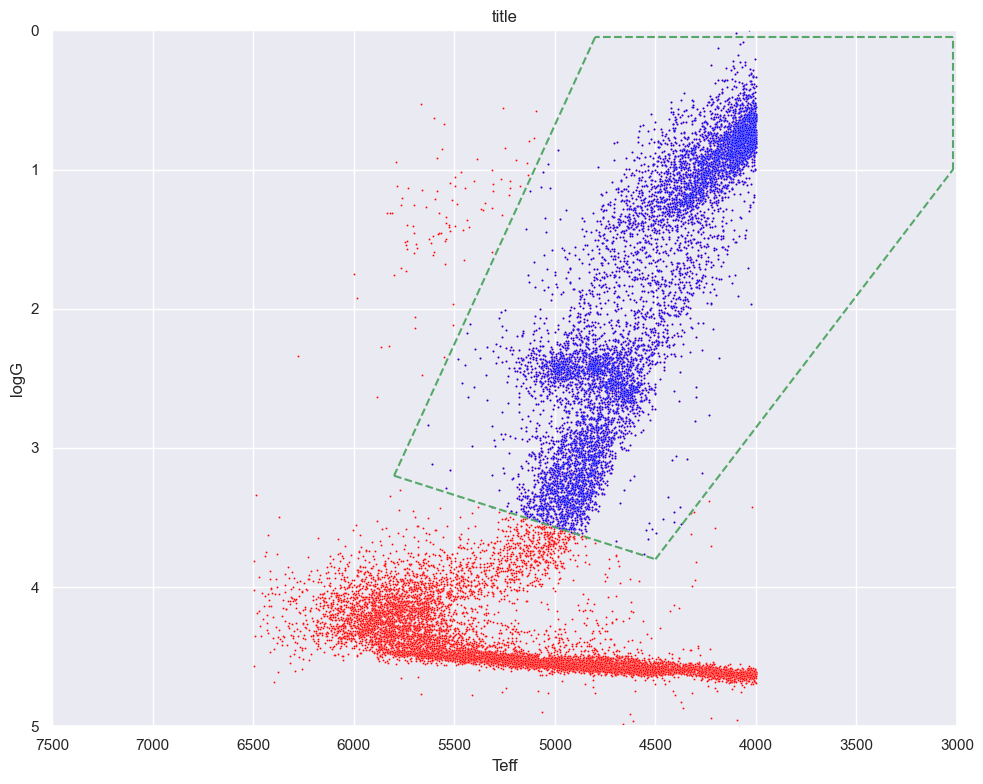

In [12]:
plot_data(df, selected_points, additional_lines, xcol, ycol, "title")

In [13]:
selected_points

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,0.062324,19.375272,-95.919871,55.230280,13.350720,1.138042,0.0693,0.6462,True,True
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,0.111271,19.411457,-95.900046,56.187870,13.809707,1.369083,0.2589,0.1215,True,True
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,0.033970,19.319754,-96.019853,120.654236,12.051780,1.286466,NaN,0.5195,True,True
iDR4_3_HYDRA-0049_0006001,150.500840,-30.072679,16.4948,16.1332,15.9968,15.2422,15.0972,14.6146,14.3859,13.9348,...,0.189011,19.915321,-95.395953,32.242046,14.133340,1.163292,0.2297,0.4873,True,True
iDR4_3_HYDRA-0049_0008584,149.708451,-30.040395,15.8047,15.5351,15.2554,14.5232,14.3349,13.8098,13.6022,13.1466,...,0.058443,19.499930,-95.976654,53.953426,13.342772,1.144237,NaN,0.8000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0187268,87.200890,-64.002373,14.4584,13.9786,14.0434,13.4496,13.3771,12.9378,12.7551,12.3427,...,0.291061,-31.006600,-86.568529,70.388435,12.417846,1.077203,0.2866,0.5974,True,True
iDR4_3_MC0017_0200426,87.106659,-63.905895,14.9185,14.6344,14.3371,13.5954,13.3829,12.8129,12.6150,12.1203,...,0.045469,-31.049796,-86.680182,96.262560,12.236260,1.155174,NaN,0.8886,True,True
iDR4_3_MC0017_0263197,86.076523,-65.114799,15.2327,14.9487,14.6968,13.9946,13.8179,13.2601,13.0671,12.5635,...,0.035904,-31.452070,-85.249442,121.618670,12.707861,1.168946,NaN,1.0771,True,True


In [14]:
df = df.reset_index()

In [15]:
merged = df.merge(selected_points, how='left', indicator=True)

In [16]:
result = merged[merged['_merge'] == 'left_only']

In [17]:
result = result.drop('_merge', axis=1)

In [18]:
result = result.set_index("ID")

In [19]:
result

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,-0.235247,20.048833,-95.156847,35.326770,13.778233,1.149013,0.0759,2.0874,False,True
iDR4_3_HYDRA-0049_0003916,149.831840,-30.108189,18.7866,18.3984,18.0961,17.3326,16.9729,16.0735,15.9812,14.7999,...,-0.073097,19.516998,-95.843697,39.563320,14.901046,1.810518,0.2618,5.0548,False,True
iDR4_3_HYDRA-0049_0004258,149.711260,-30.109542,15.7394,15.5571,15.2976,14.4773,14.3229,13.8255,13.6739,13.1439,...,-0.005049,19.448694,-95.927335,58.378750,13.326395,1.175140,0.1047,3.6171,False,True
iDR4_3_HYDRA-0049_0007713,149.471686,-30.042413,16.1028,15.8740,15.6610,14.8692,14.7410,14.2853,14.1038,13.6609,...,-0.042090,19.365808,-96.141013,29.945425,13.955601,1.098105,0.0664,2.2934,False,True
iDR4_3_HYDRA-0049_0008903,150.754434,-30.023594,18.0750,17.8146,17.5059,16.5458,16.2453,15.4087,15.3398,14.3068,...,-0.027598,20.092915,-95.249049,22.276380,14.455941,1.627716,0.1135,3.2291,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0203963,86.478745,-63.921204,14.6289,14.1751,14.1117,13.7003,13.6447,13.4922,13.3647,13.2216,...,-0.018248,-31.325454,-86.654477,77.733574,13.291876,0.676821,0.0613,1.1374,False,True
iDR4_3_MC0017_0263305,85.713326,-65.021431,17.8349,17.4066,17.1115,16.2815,16.0314,14.9993,14.9260,13.7533,...,-0.251984,-31.609714,-85.349724,106.795364,13.674331,1.976831,0.2860,5.5806,False,True
iDR4_3_MC0017_0263778,87.990028,-64.621025,15.1050,14.8703,14.6108,13.8625,13.6898,13.1429,13.0075,12.4352,...,-0.008903,-30.654857,-85.854421,144.684190,12.533663,1.134965,0.0311,5.2568,False,True


In [20]:
Giants = selected_points

In [21]:
Giants

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,149.662661,-30.170156,15.6780,15.3706,15.1282,14.4984,14.3038,13.8198,13.5995,13.1304,...,0.062324,19.375272,-95.919871,55.230280,13.350720,1.138042,0.0693,0.6462,True,True
iDR4_3_HYDRA-0049_0001461,149.706198,-30.154594,16.9385,16.5770,16.3131,15.4414,15.1443,14.4626,14.1956,13.6136,...,0.111271,19.411457,-95.900046,56.187870,13.809707,1.369083,0.2589,0.1215,True,True
iDR4_3_HYDRA-0049_0002887,149.537907,-30.151535,15.0777,14.7629,14.4053,13.5607,13.2426,12.6090,12.3534,12.2030,...,0.033970,19.319754,-96.019853,120.654236,12.051780,1.286466,NaN,0.5195,True,True
iDR4_3_HYDRA-0049_0006001,150.500840,-30.072679,16.4948,16.1332,15.9968,15.2422,15.0972,14.6146,14.3859,13.9348,...,0.189011,19.915321,-95.395953,32.242046,14.133340,1.163292,0.2297,0.4873,True,True
iDR4_3_HYDRA-0049_0008584,149.708451,-30.040395,15.8047,15.5351,15.2554,14.5232,14.3349,13.8098,13.6022,13.1466,...,0.058443,19.499930,-95.976654,53.953426,13.342772,1.144237,NaN,0.8000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0187268,87.200890,-64.002373,14.4584,13.9786,14.0434,13.4496,13.3771,12.9378,12.7551,12.3427,...,0.291061,-31.006600,-86.568529,70.388435,12.417846,1.077203,0.2866,0.5974,True,True
iDR4_3_MC0017_0200426,87.106659,-63.905895,14.9185,14.6344,14.3371,13.5954,13.3829,12.8129,12.6150,12.1203,...,0.045469,-31.049796,-86.680182,96.262560,12.236260,1.155174,NaN,0.8886,True,True
iDR4_3_MC0017_0263197,86.076523,-65.114799,15.2327,14.9487,14.6968,13.9946,13.8179,13.2601,13.0671,12.5635,...,0.035904,-31.452070,-85.249442,121.618670,12.707861,1.168946,NaN,1.0771,True,True


In [23]:
#Giants.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF9-Giants.csv")

In [24]:
Dwarfs = result

In [25]:
Dwarfs

,RA_splus,DEC_splus,u,J378,J395,J410,J430,g,J515,r,...,SI_FE,Latitude,Longitude,SNR,Gmag,BP-RP,E(BP-RP),Plx,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0003935,150.799389,-30.112643,16.6739,16.3885,15.9387,15.1897,14.9013,14.2596,14.1216,13.5160,...,-0.235247,20.048833,-95.156847,35.326770,13.778233,1.149013,0.0759,2.0874,False,True
iDR4_3_HYDRA-0049_0003916,149.831840,-30.108189,18.7866,18.3984,18.0961,17.3326,16.9729,16.0735,15.9812,14.7999,...,-0.073097,19.516998,-95.843697,39.563320,14.901046,1.810518,0.2618,5.0548,False,True
iDR4_3_HYDRA-0049_0004258,149.711260,-30.109542,15.7394,15.5571,15.2976,14.4773,14.3229,13.8255,13.6739,13.1439,...,-0.005049,19.448694,-95.927335,58.378750,13.326395,1.175140,0.1047,3.6171,False,True
iDR4_3_HYDRA-0049_0007713,149.471686,-30.042413,16.1028,15.8740,15.6610,14.8692,14.7410,14.2853,14.1038,13.6609,...,-0.042090,19.365808,-96.141013,29.945425,13.955601,1.098105,0.0664,2.2934,False,True
iDR4_3_HYDRA-0049_0008903,150.754434,-30.023594,18.0750,17.8146,17.5059,16.5458,16.2453,15.4087,15.3398,14.3068,...,-0.027598,20.092915,-95.249049,22.276380,14.455941,1.627716,0.1135,3.2291,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0203963,86.478745,-63.921204,14.6289,14.1751,14.1117,13.7003,13.6447,13.4922,13.3647,13.2216,...,-0.018248,-31.325454,-86.654477,77.733574,13.291876,0.676821,0.0613,1.1374,False,True
iDR4_3_MC0017_0263305,85.713326,-65.021431,17.8349,17.4066,17.1115,16.2815,16.0314,14.9993,14.9260,13.7533,...,-0.251984,-31.609714,-85.349724,106.795364,13.674331,1.976831,0.2860,5.5806,False,True
iDR4_3_MC0017_0263778,87.990028,-64.621025,15.1050,14.8703,14.6108,13.8625,13.6898,13.1429,13.0075,12.4352,...,-0.008903,-30.654857,-85.854421,144.684190,12.533663,1.134965,0.0311,5.2568,False,True


In [26]:
#Dwarfs.to_csv("E:\IC\FiltroBases\Apogee\ApogeeF10-Dwarfs.csv")

#### Remover filtros com valores fora do range de 8 a 25

In [14]:
ApogeeDwarfs = pd.read_table("E:\\IC\\FiltroBases\\Apogee\\ApogeeF10-Dwarfs.csv", encoding='latin-1', delimiter=',', index_col = 'ID')
ApogeeGiants = pd.read_table("E:\\IC\\FiltroBases\\Apogee\\ApogeeF9-Giants.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [16]:
# fazer corte nos filtros que estão fora do range de 8 a 25
ApgoeeDwarfsCut = ApogeeDwarfs.loc[(ApogeeDwarfs['u'] >= 8) & (ApogeeDwarfs['u'] <= 25) &
                    (ApogeeDwarfs['J378'] >= 8) & (ApogeeDwarfs['J378'] <= 25) &
                    (ApogeeDwarfs['J395'] >= 8) & (ApogeeDwarfs['J395'] <= 25) &
                    (ApogeeDwarfs['J410'] >= 8) & (ApogeeDwarfs['J410'] <= 25) &
                    (ApogeeDwarfs['J430'] >= 8) & (ApogeeDwarfs['J430'] <= 25) &
                    (ApogeeDwarfs['g'] >= 8) & (ApogeeDwarfs['g'] <= 25) &
                    (ApogeeDwarfs['J515'] >= 8) & (ApogeeDwarfs['J515'] <= 25) &
                    (ApogeeDwarfs['r'] >= 8) & (ApogeeDwarfs['r'] <= 25) &
                    (ApogeeDwarfs['J660'] >= 8) & (ApogeeDwarfs['J660'] <= 25) &
                    (ApogeeDwarfs['i'] >= 8) & (ApogeeDwarfs['i'] <= 25) &
                    (ApogeeDwarfs['J861'] >= 8) & (ApogeeDwarfs['J861'] <= 25) &
                    (ApogeeDwarfs['z'] >= 8) & (ApogeeDwarfs['z'] <= 25)]


In [17]:
# fazer corte nos filtros que estão fora do range de 8 a 25
ApogeeGiantsCut = ApogeeGiants.loc[(ApogeeGiants['u'] >= 8) & (ApogeeGiants['u'] <= 25) &
                    (ApogeeGiants['J378'] >= 8) & (ApogeeGiants['J378'] <= 25) &
                    (ApogeeGiants['J395'] >= 8) & (ApogeeGiants['J395'] <= 25) &
                    (ApogeeGiants['J410'] >= 8) & (ApogeeGiants['J410'] <= 25) &
                    (ApogeeGiants['J430'] >= 8) & (ApogeeGiants['J430'] <= 25) &
                    (ApogeeGiants['g'] >= 8) & (ApogeeGiants['g'] <= 25) &
                    (ApogeeGiants['J515'] >= 8) & (ApogeeGiants['J515'] <= 25) &
                    (ApogeeGiants['r'] >= 8) & (ApogeeGiants['r'] <= 25) &
                    (ApogeeGiants['J660'] >= 8) & (ApogeeGiants['J660'] <= 25) &
                    (ApogeeGiants['i'] >= 8) & (ApogeeGiants['i'] <= 25) &
                    (ApogeeGiants['J861'] >= 8) & (ApogeeGiants['J861'] <= 25) &
                    (ApogeeGiants['z'] >= 8) & (ApogeeGiants['z'] <= 25)]


In [20]:
ApgoeeDwarfsCut.to_csv("E:\\IC\\FiltroBases\\Apogee\\ApogeeF11-CutFilters-Dwarfs.csv")

In [21]:
ApogeeGiantsCut.to_csv("E:\\IC\\FiltroBases\\Apogee\\ApogeeF12-CutFilters-Giants.csv")

#### Calculando as cores

In [22]:
colunas = ['u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z']

In [23]:
Params1 = ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M',
           'C_FE', 'CA_FE', 'N_FE', 'NI_FE', 
           'MG_FE', 'SI_FE']

In [24]:
Anas1 = pd.read_csv("E:\\IC\\FiltroBases\\Apogee\\ApogeeF11-CutFilters-Dwarfs.csv", index_col = 'ID')

In [25]:
AnasCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        AnasCores1[str(colunas[i] + '-' + colunas[j])] = Anas1[colunas[i]].astype(float) - Anas1[colunas[j]].astype(float)

In [26]:
for col in Params1:
    AnasCores1[col] = Anas1[col]

In [27]:
AnasCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,TEFF,LOGG,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0003935,0.2854,0.7352,1.4842,1.7726,2.4143,2.5523,3.1579,3.3802,3.3934,3.6082,...,4716.2810,5.078055,-0.982990,-0.255125,-999.000000,0.689696,0.482210,0.469040,-0.295521,-0.235247
iDR4_3_HYDRA-0049_0003916,0.3882,0.6905,1.4540,1.8137,2.7131,2.8054,3.9867,4.1887,4.5568,4.7589,...,4014.9653,4.696823,-0.537400,0.006897,-0.003562,-0.029642,-999.000000,-0.030970,0.017738,-0.073097
iDR4_3_HYDRA-0049_0004258,0.1823,0.4418,1.2621,1.4165,1.9139,2.0655,2.5955,2.6521,2.8005,2.9115,...,4764.7397,4.522403,-0.355880,0.018650,-0.029828,0.028639,-0.185960,0.039090,-0.004667,-0.005049
iDR4_3_HYDRA-0049_0007713,0.2288,0.4418,1.2336,1.3618,1.8175,1.9990,2.4419,2.4822,2.6474,2.7053,...,5057.2030,4.524182,-0.054570,0.016021,-0.012690,0.054443,-0.218793,-0.025646,0.055766,-0.042090
iDR4_3_HYDRA-0049_0008903,0.2604,0.5691,1.5292,1.8297,2.6663,2.7352,3.7682,3.9535,4.2469,4.4284,...,4196.9160,4.598855,-0.218130,-0.079150,0.005286,-0.052468,-999.000000,0.152509,-0.198241,-0.027598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0203963,0.4538,0.5172,0.9286,0.9842,1.1367,1.2642,1.4073,1.3796,1.4520,1.4067,...,5972.7114,4.099565,-0.211460,-0.012282,0.022280,0.204346,0.567390,-0.187460,0.059804,-0.018248
iDR4_3_MC0017_0263305,0.4283,0.7234,1.5534,1.8035,2.8356,2.9089,4.0816,4.3461,4.8460,5.0884,...,4076.0190,4.751893,0.246280,-0.063022,-0.139595,-0.189309,-999.000000,-0.156578,-0.359108,-0.251984
iDR4_3_MC0017_0263778,0.2347,0.4942,1.2425,1.4152,1.9621,2.0975,2.6698,2.7581,2.8856,2.9430,...,4950.6167,4.578544,0.024604,-0.003296,-0.067984,0.008222,-0.176052,-0.018743,0.026603,-0.008903


In [28]:
#AnasCores1.to_csv("E:\\IC\\FiltroBases\\Apogee\\ApogeeF13-Colors-Dwarfs.csv")

In [29]:
Giants1 = pd.read_csv("E:\\IC\\FiltroBases\\Apogee\\ApogeeF12-CutFilters-Giants.csv", index_col = 'ID')

In [30]:
GiantsCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        GiantsCores1[str(colunas[i] + '-' + colunas[j])] = Giants1[colunas[i]].astype(float) - Giants1[colunas[j]].astype(float)

In [31]:
for col in Params1:
    GiantsCores1[col] = Giants1[col]

In [32]:
GiantsCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,TEFF,LOGG,FE_H,ALPHA_M,C_FE,CA_FE,N_FE,NI_FE,MG_FE,SI_FE
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0049_0000596,0.3074,0.5498,1.1796,1.3742,1.8582,2.0785,2.5476,2.5906,2.7361,2.8224,...,4925.5347,3.227409,-0.043532,0.062435,0.014311,0.086964,0.104909,0.071667,0.105918,0.062324
iDR4_3_HYDRA-0049_0001461,0.3615,0.6254,1.4971,1.7942,2.4759,2.7429,3.3249,3.4138,3.6471,3.7707,...,4564.2080,1.942220,-0.483310,0.120426,-0.071637,0.016022,0.169820,0.006463,0.202743,0.111271
iDR4_3_HYDRA-0049_0002887,0.3148,0.6724,1.5170,1.8351,2.4687,2.7243,2.8747,3.0627,3.0795,3.5387,...,4713.7964,2.410644,-0.033595,0.033650,-0.058968,0.014698,0.229277,0.031642,0.067856,0.033970
iDR4_3_HYDRA-0049_0006001,0.3616,0.4980,1.2526,1.3976,1.8802,2.1089,2.5600,2.6364,2.7966,2.8818,...,4872.2485,3.212270,-0.516610,0.281585,0.015661,0.205025,0.041898,0.077583,0.320593,0.189011
iDR4_3_HYDRA-0049_0008584,0.2696,0.5493,1.2815,1.4698,1.9949,2.2025,2.6581,2.7179,2.8463,2.9369,...,4976.2046,3.379036,-0.073373,0.072283,0.074867,0.028343,0.083484,0.105160,0.098650,0.058443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0180767,0.3935,0.5384,1.1976,1.3318,1.8706,2.0639,2.5348,2.5847,2.7758,2.8375,...,4938.3260,2.455952,-0.491270,0.222375,0.134820,0.130135,0.117690,0.041543,0.248273,0.242641
iDR4_3_MC0017_0185545,0.3598,0.5390,1.2491,1.4146,1.9653,2.1541,2.6718,2.7289,2.9355,3.0131,...,4780.1255,2.925865,-0.433300,0.204235,0.030313,0.106135,0.123120,0.101322,0.259533,0.139821
iDR4_3_MC0017_0187268,0.4798,0.4150,1.0088,1.0813,1.5206,1.7033,2.1157,2.1589,2.3561,2.4120,...,5002.5303,2.536209,-1.047500,0.262615,-0.182260,0.075705,-0.062140,-0.079708,0.294043,0.291061


In [33]:
GiantsCores1.to_csv("E:\\IC\\FiltroBases\\Apogee\\ApogeeF14-Colors-Giants.csv")

## Galah

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
def line(x):
    return ((3.6 - 3.2) / (5000 - 6000)) * (x - 6000) + 3.2

def line_above(x):
    if (x >= x2) and (x <= x1):  # for first line
        return ((y2 - y1) / (x2 - x1)) * (x - x1) + y1

    elif (x >= x3) and (x <= x2):  # for second line
        return ((y3 - y2) / (x3 - x2)) * (x - x2) + y2

def line_below(x):
    return ((y4 - y1) / (x4 - x1)) * (x - x4) + y4
    
def calculate_boundary_lines(x, y, x1, y1, x2, y2, x3, y3, x4, y4):
    df['above_line'] = df[y] < df[x].apply(line_above)
    df['below_line'] = df[y] > df[x].apply(line_below)

    selected_points = df[(df[x] >= 3000) & (df[x] <= 6000) & df['above_line'] & df['below_line']]

    return df, selected_points, ((x1, y1), (x2, y2)), ((x2, y2), (x3, line_above(x3))), ((x3, line_above(x3)), (x3, y4)), ((x3, y4), (x4, y4)), ((x4, y4), (x1, y1))

def plot_data(df, selected_points, additional_lines, xcol, ycol, title):
    plt.figure(figsize=(10, 8))
    
    for line_start, line_end in additional_lines:
        plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'g--')

    sns.scatterplot(x=df[xcol], y=df[ycol], s=2, color='red')
    sns.scatterplot(x=selected_points[xcol], y=selected_points[ycol], s=2, color='blue')

    plt.xlabel('Teff')
    plt.ylabel('logG')
    plt.title(title)
    plt.ylim(5, 0)
    plt.xlim(7500, 3000)
    plt.tight_layout()
    plt.savefig(title+'.png', dpi=300)
    plt.show()

In [3]:
Galah = pd.read_table("E:\\IC\\BasesOriginais\\Treino\\LAMOSDR8-MedimResulution-SPLUS-2023.dat", encoding='latin-1', delimiter='; ', index_col = 'ID', engine='python')

In [4]:
Galah

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ti_fe,cr_fe,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg,rdistang
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,-9999.0,-9999.0,-0.01894,-9999.0,0.280,0.031443,80.9,17,0,0.000129
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,-9999.0,-9999.0,-0.01598,-9999.0,0.036,0.030625,80.9,17,0,0.000137
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,-9999.0,-9999.0,0.05465,-9999.0,-9999.000,-9999.000000,80.9,17,0,0.000045
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,-9999.0,-9999.0,0.01725,-9999.0,-9999.000,-9999.000000,80.9,17,0,0.000112
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,-9999.0,-9999.0,0.02089,-9999.0,-0.001,0.030810,80.9,17,0,0.000107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,355.263192,-0.063397,16.9772,16.5469,16.2134,15.3793,15.1042,14.0872,13.9500,12.8679,...,-9999.0,-9999.0,-9999.00000,-9999.0,-9999.000,-9999.000000,28.4,13,1,0.000317
iDR4_3_STRIPE82-0168_0007054,356.771813,0.262417,17.5070,17.1828,16.8832,15.9271,15.6000,14.6258,14.5802,13.4021,...,-9999.0,-9999.0,-9999.00000,-9999.0,-9999.000,-9999.000000,28.4,13,1,0.000073
iDR4_3_STRIPE82-0170_0009610,358.077337,0.279884,17.4114,17.0688,16.7564,15.8510,15.5267,14.5760,14.5099,13.3320,...,-9999.0,-9999.0,-9999.00000,-9999.0,-9999.000,-9999.000000,28.4,13,1,0.000131


In [5]:
for i in Galah:
    print(i)

RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
mobsid
obsid
uid
gp_id
designation
obsdate
lmjd
mjd
planid
spid
fiberid
lmjm
band
ra_obs
dec_obs
snr
gaia_source_id
gaia_g_mean_mag
gaia_bp_mean_mag
gaia_rp_mean_mag
tsource
fibertype
tfrom
tcomment
offsets
offsets_v
ra
dec
teff_lasp
teff_lasp_err
logg_lasp
logg_lasp_err
feh_lasp
feh_lasp_err
vsini_lasp
vsini_lasp_err
rv_b0
rv_b0_err
rv_b1
rv_b1_err
rv_b_flag
rv_r0
rv_r0_err
rv_r1
rv_r1_err
rv_r_flag
rv_br0
rv_br0_err
rv_br1
rv_br1_err
rv_br_flag
rv_lasp0
rv_lasp0_err
rv_lasp1
rv_lasp1_err
coadd
fibermask
alpha_m_cnn
teff_cnn
logg_cnn
feh_cnn
c_fe
n_fe
o_fe
mg_fe
al_fe
si_fe
s_fe
ca_fe
ti_fe
cr_fe
ni_fe
cu_fe
alpha_m_lasp
alpha_m_lasp_err
moon_angle
lunardate
moon_flg
rdistang


In [6]:
colunas = ['RA', 'DEC', 
           'u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z', 
           'e_u', 'e_J0378', 'e_J0395', 'e_J0410', 
           'e_J0430', 'e_g', 'e_J0515', 'e_r', 
           'e_J0660', 'e_i', 'e_J0861', 'e_z', 
           'teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn',
           'c_fe', 'ca_fe', 'n_fe', 'mg_fe', 'si_fe', 
           'ni_fe', 'snr']

In [7]:
GalahF1 = Galah[colunas]

In [8]:
GalahF1

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,4.334,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,4.414,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,4.168,-0.232,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465,12.74
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,4.396,-0.111,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725,14.09
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,4.185,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,355.263192,-0.063397,16.9772,16.5469,16.2134,15.3793,15.1042,14.0872,13.9500,12.8679,...,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,46.37
iDR4_3_STRIPE82-0168_0007054,356.771813,0.262417,17.5070,17.1828,16.8832,15.9271,15.6000,14.6258,14.5802,13.4021,...,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,48.50
iDR4_3_STRIPE82-0170_0009610,358.077337,0.279884,17.4114,17.0688,16.7564,15.8510,15.5267,14.5760,14.5099,13.3320,...,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,35.81


In [9]:
#GalahF1.to_csv("E:\IC\FiltroBases\Galah\GalahF1.csv")

#### Removendo linhas com erro maior q 0.2

In [10]:
data = GalahF1

In [11]:
GalahF2 = data.loc[(data['e_u']<0.2) & (data['e_J0378']<0.2) &
                   (data['e_J0395']<0.2) & (data['e_J0410']<0.2) &
                   (data['e_J0430']<0.2) & (data['e_g']<0.2) &
                   (data['e_J0515']<0.2) & (data['e_r']<0.2) &
                   (data['e_J0660']<0.2) & (data['e_i']<0.2) &
                   (data['e_J0861']<0.2) & (data['e_z']<0.2),
                   ['RA', 'DEC', 
                    'u', 'J378', 'J395', 'J410', 
                    'J430', 'g', 'J515', 'r', 
                    'J660', 'i', 'J861', 'z', 
                    'teff_cnn', 'logg_cnn', 'feh_cnn', 
                    'alpha_m_cnn','c_fe', 'ca_fe', 'n_fe', 
                    'mg_fe', 'si_fe', 'ni_fe', 'snr']]

In [12]:
GalahF2

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,4.334,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,4.414,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,4.168,-0.232,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465,12.74
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,4.396,-0.111,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725,14.09
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,4.185,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0165_0033610,355.263192,-0.063397,16.9772,16.5469,16.2134,15.3793,15.1042,14.0872,13.9500,12.8679,...,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,46.37
iDR4_3_STRIPE82-0168_0007054,356.771813,0.262417,17.5070,17.1828,16.8832,15.9271,15.6000,14.6258,14.5802,13.4021,...,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,48.50
iDR4_3_STRIPE82-0170_0009610,358.077337,0.279884,17.4114,17.0688,16.7564,15.8510,15.5267,14.5760,14.5099,13.3320,...,-9999.000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,35.81


In [23]:
#GalahF2.to_csv("E:\IC\FiltroBases\Galah\GalahF2.csv")

#### Removendo linhas que contém -9999 em todas as colunas de parametros

In [13]:
data = GalahF2

In [14]:
GalahF3 = data.loc[(data['teff_cnn'] != -9999) & (data['logg_cnn'] != -9999) & 
                   (data['feh_cnn'] != -9999) & (data['alpha_m_cnn'] != -9999) & 
                   (data['c_fe'] != -9999) & (data['ca_fe'] != -9999) & 
                   (data['n_fe'] != -9999) & (data['mg_fe'] != -9999) & 
                   (data['si_fe'] != -9999) & (data['ni_fe'] != -9999) &
                   (data['teff_cnn'] != '-9999') & (data['logg_cnn'] != '-9999') & 
                   (data['feh_cnn'] != -9999) & (data['alpha_m_cnn'] != '-9999') & 
                   (data['c_fe'] != '-9999') & (data['ca_fe'] != '-9999') & 
                   (data['n_fe'] != '-9999') & (data['mg_fe'] != '-9999') & 
                   (data['si_fe'] != '-9999') & (data['ni_fe'] != '-9999')]

In [15]:
GalahF3

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,4.334,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,4.414,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,4.168,-0.232,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465,12.74
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,4.396,-0.111,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725,14.09
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,4.185,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,3.751,-0.447,0.051,0.06939,0.08622,0.02988,0.07714,0.02860,0.05118,35.18
iDR4_3_STRIPE82-0166_0005188,355.549808,0.136697,15.4481,15.0674,15.0408,14.5437,14.4683,14.2289,14.0687,13.8265,...,4.346,-0.239,0.029,0.02794,0.00159,-0.08244,0.05066,0.03969,-0.03031,37.33
iDR4_3_STRIPE82-0165_0031237,355.731504,-0.060800,15.9562,15.5401,15.4835,14.8456,14.7654,14.2271,14.0170,13.6365,...,2.894,-0.641,0.067,0.00494,0.07843,-0.03247,0.09768,0.03390,-0.02448,36.15


In [36]:
GalahF3.to_csv("E:\IC\FiltroBases\Galah\GalahF3-9999.csv")

#### Adicionando coordenadas galácticas

In [16]:
data = GalahF3

In [39]:
ra_true = data["RA"]
dec_true = data[ "DEC"]
icrs_true = SkyCoord(ra=ra_true*u.degree, dec=dec_true*u.degree, frame='icrs')
gal_true = icrs_true.galactic
l_rad_true = gal_true.l.radian
l_rad_true[l_rad_true > np.pi] -= 2. * np.pi # LONGITUDE
b_rad_true = gal_true.b.radian               # LATITUDE
b_deg_true = b_rad_true * (180/np.pi) #gal.b.degree#b_rad * (180/np.pi)
l_deg_true = l_rad_true * (180/np.pi)

data['Latitude'] = b_deg_true
data['Longitude'] = l_deg_true

C:\Users\alber\AppData\Local\Temp\ipykernel_27216\4216307443.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Latitude'] = b_deg_true
C:\Users\alber\AppData\Local\Temp\ipykernel_27216\4216307443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Longitude'] = l_deg_true


In [47]:
data

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59,58.581196,-97.097479
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62,58.767176,-96.855461
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465,12.74,58.914942,-96.560871
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725,14.09,58.388485,-96.896480
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02,58.441582,-96.982731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,0.051,0.06939,0.08622,0.02988,0.07714,0.02860,0.05118,35.18,-57.756501,89.956909
iDR4_3_STRIPE82-0166_0005188,355.549808,0.136697,15.4481,15.0674,15.0408,14.5437,14.4683,14.2289,14.0687,13.8265,...,0.029,0.02794,0.00159,-0.08244,0.05066,0.03969,-0.03031,37.33,-58.058719,88.710315
iDR4_3_STRIPE82-0165_0031237,355.731504,-0.060800,15.9562,15.5401,15.4835,14.8456,14.7654,14.2271,14.0170,13.6365,...,0.067,0.00494,0.07843,-0.03247,0.09768,0.03390,-0.02448,36.15,-58.320591,88.821605


In [46]:
data.to_csv("E:\IC\FiltroBases\Galah\GalahF4.csv")

In [45]:
GalahF4 = data

#### Corte na Latitude

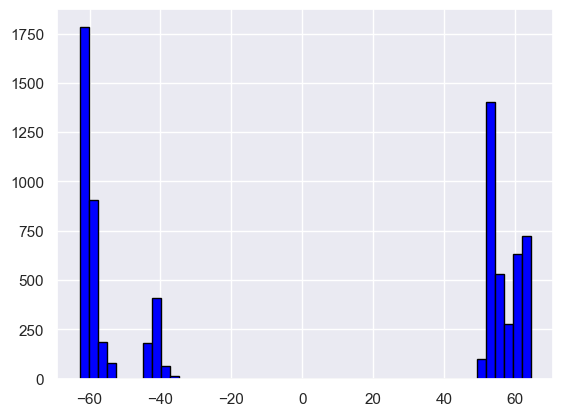

In [49]:
# Não precisa fazer o corte na latitude pq ja n tem entre -15 e 15
plt.hist(data['Latitude'], bins=50, color='blue', edgecolor='black')
plt.show()

#### Corte na Temperatura

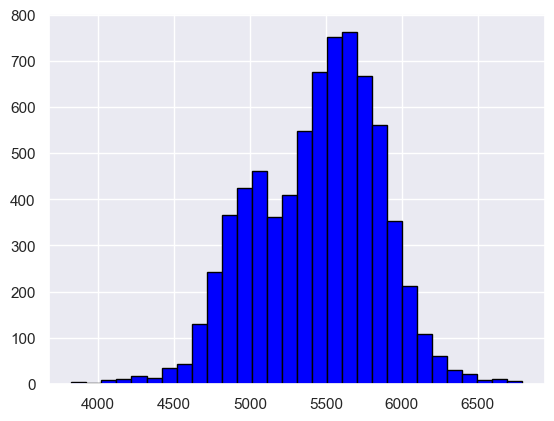

In [53]:
plt.hist(GalahF4['teff_cnn'], bins=30, color='blue', edgecolor='black')
plt.show()

In [54]:
data = GalahF4

In [55]:
# corte feito para remover estrelas jovens que parecem anâs por terem um disco de acreção 
GalahF5 = data.loc[(data['teff_cnn']>4000) & (data['teff_cnn']<6500)]

In [56]:
GalahF5

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59,58.581196,-97.097479
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62,58.767176,-96.855461
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465,12.74,58.914942,-96.560871
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725,14.09,58.388485,-96.896480
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02,58.441582,-96.982731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,0.051,0.06939,0.08622,0.02988,0.07714,0.02860,0.05118,35.18,-57.756501,89.956909
iDR4_3_STRIPE82-0166_0005188,355.549808,0.136697,15.4481,15.0674,15.0408,14.5437,14.4683,14.2289,14.0687,13.8265,...,0.029,0.02794,0.00159,-0.08244,0.05066,0.03969,-0.03031,37.33,-58.058719,88.710315
iDR4_3_STRIPE82-0165_0031237,355.731504,-0.060800,15.9562,15.5401,15.4835,14.8456,14.7654,14.2271,14.0170,13.6365,...,0.067,0.00494,0.07843,-0.03247,0.09768,0.03390,-0.02448,36.15,-58.320591,88.821605


In [57]:
#GalahF5.to_csv("E:\IC\FiltroBases\Galah\GalahF5-TeffCut.csv")

#### removendo linhas com sinal ruido menor q 20

In [68]:
data = GalahF5

In [69]:
data

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59,58.581196,-97.097479
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62,58.767176,-96.855461
iDR4_3_SPLUS-n02n18_0030314,173.677156,2.057337,15.6724,15.2971,15.3174,14.6872,14.6351,14.3972,14.2119,14.0569,...,0.069,0.04268,0.04427,0.05917,0.11994,0.07189,0.05465,12.74,58.914942,-96.560871
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,0.002,0.01891,-0.00675,0.13085,0.03037,0.01720,0.01725,14.09,58.388485,-96.896480
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02,58.441582,-96.982731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,0.051,0.06939,0.08622,0.02988,0.07714,0.02860,0.05118,35.18,-57.756501,89.956909
iDR4_3_STRIPE82-0166_0005188,355.549808,0.136697,15.4481,15.0674,15.0408,14.5437,14.4683,14.2289,14.0687,13.8265,...,0.029,0.02794,0.00159,-0.08244,0.05066,0.03969,-0.03031,37.33,-58.058719,88.710315
iDR4_3_STRIPE82-0165_0031237,355.731504,-0.060800,15.9562,15.5401,15.4835,14.8456,14.7654,14.2271,14.0170,13.6365,...,0.067,0.00494,0.07843,-0.03247,0.09768,0.03390,-0.02448,36.15,-58.320591,88.821605


In [70]:
data = data.loc[(data['snr'] > 20)]

In [71]:
data

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59,58.581196,-97.097479
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62,58.767176,-96.855461
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02,58.441582,-96.982731
iDR4_3_SPLUS-n02n18_0040367,173.278841,1.729129,15.1229,14.7182,14.6102,13.8065,13.6507,13.1037,12.8446,12.4264,...,0.240,0.16620,0.18384,0.05803,0.32707,0.24229,0.10500,39.34,58.418706,-96.832503
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.036,0.02390,0.03971,0.10339,0.07745,0.03457,0.01997,20.13,58.767176,-96.855461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,0.051,0.06939,0.08622,0.02988,0.07714,0.02860,0.05118,35.18,-57.756501,89.956909
iDR4_3_STRIPE82-0166_0005188,355.549808,0.136697,15.4481,15.0674,15.0408,14.5437,14.4683,14.2289,14.0687,13.8265,...,0.029,0.02794,0.00159,-0.08244,0.05066,0.03969,-0.03031,37.33,-58.058719,88.710315
iDR4_3_STRIPE82-0165_0031237,355.731504,-0.060800,15.9562,15.5401,15.4835,14.8456,14.7654,14.2271,14.0170,13.6365,...,0.067,0.00494,0.07843,-0.03247,0.09768,0.03390,-0.02448,36.15,-58.320591,88.821605


In [73]:
data.to_csv("E:\IC\FiltroBases\Galah\GalahF6-snr.csv")

#### Separando Anas e Gigantes

In [4]:
Galah = pd.read_table("E:\IC\FiltroBases\Galah\GalahF6-snr.csv", encoding='latin-1', delimiter=',', index_col = 'ID')

In [32]:
for i in Galah:
    print(i)

RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
teff_cnn
logg_cnn
feh_cnn
alpha_m_cnn
c_fe
ca_fe
n_fe
mg_fe
si_fe
ni_fe
snr
Latitude
Longitude
above_line
below_line


In [6]:
Galah

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59,58.581196,-97.097479
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62,58.767176,-96.855461
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089,29.02,58.441582,-96.982731
iDR4_3_SPLUS-n02n18_0040367,173.278841,1.729129,15.1229,14.7182,14.6102,13.8065,13.6507,13.1037,12.8446,12.4264,...,0.240,0.16620,0.18384,0.05803,0.32707,0.24229,0.10500,39.34,58.418706,-96.832503
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.036,0.02390,0.03971,0.10339,0.07745,0.03457,0.01997,20.13,58.767176,-96.855461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,0.051,0.06939,0.08622,0.02988,0.07714,0.02860,0.05118,35.18,-57.756501,89.956909
iDR4_3_STRIPE82-0166_0005188,355.549808,0.136697,15.4481,15.0674,15.0408,14.5437,14.4683,14.2289,14.0687,13.8265,...,0.029,0.02794,0.00159,-0.08244,0.05066,0.03969,-0.03031,37.33,-58.058719,88.710315
iDR4_3_STRIPE82-0165_0031237,355.731504,-0.060800,15.9562,15.5401,15.4835,14.8456,14.7654,14.2271,14.0170,13.6365,...,0.067,0.00494,0.07843,-0.03247,0.09768,0.03390,-0.02448,36.15,-58.320591,88.821605


In [11]:
df = Galah       # define dataframes , you can put your own dataframe here
xcol = 'teff_cnn'               # define x-column
ycol = 'logg_cnn'               # define y-column

x1, y1 = 5800, 3.2            #starting pt of 1st line
x2, y2 = 4500, line(4500)    #ending pt of 1st line, starting pt of 2nd line
x3, y3 = 3020, 1              #ending pt of 2nd line, starting pt of 3rd line
x4, y4 = 4800, 0.05           #ending pt of 3rd line, starting pt of 4th line

In [12]:
df, selected_points, *additional_lines = calculate_boundary_lines(xcol, ycol, x1, y1, x2, y2, x3, y3, x4, y4)

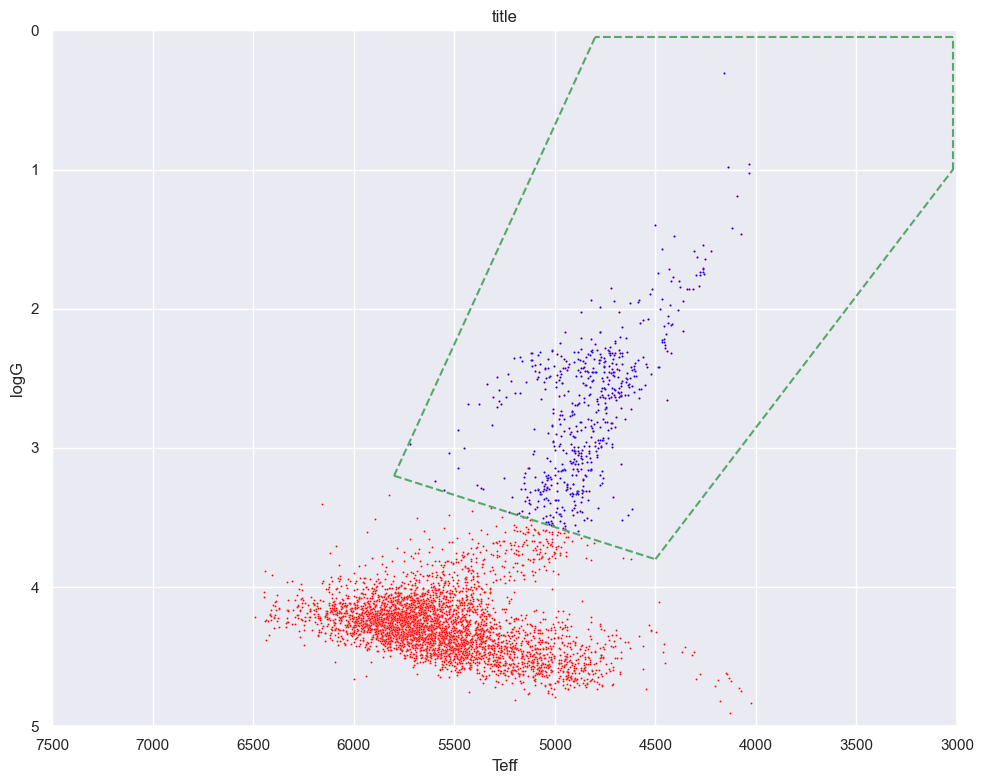

In [13]:
plot_data(df, selected_points, additional_lines, xcol, ycol, "title")

In [14]:
selected_points

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040367,173.278841,1.729129,15.1229,14.7182,14.6102,13.8065,13.6507,13.1037,12.8446,12.4264,...,0.18384,0.05803,0.32707,0.24229,0.10500,39.34,58.418706,-96.832503,True,True
iDR4_3_SPLUS-n02n18_0040367,173.278841,1.729129,15.1229,14.7182,14.6102,13.8065,13.6507,13.1037,12.8446,12.4264,...,0.16368,0.06610,0.29503,0.22026,0.10765,44.70,58.418706,-96.832503,True,True
iDR4_3_SPLUS-n02n18_0011183,173.645958,1.042406,15.6944,15.4478,15.1774,14.5791,14.4430,13.9025,13.7024,13.2239,...,0.07622,0.04410,0.03736,0.01077,0.04453,26.79,58.056579,-95.522979,True,True
iDR4_3_SPLUS-n02n18_0025206,173.223831,1.517743,15.4913,15.0906,14.9942,14.2305,14.0865,13.5752,13.3220,12.9325,...,0.17040,0.31093,0.26964,0.19081,0.05049,26.59,58.213554,-96.689766,True,True
iDR4_3_SPLUS-n02n18_0003092,174.341984,0.712871,14.5073,14.1886,13.9423,13.0536,12.8167,12.2248,11.9268,11.9701,...,0.06443,0.05352,0.15806,0.12744,0.02627,75.82,58.159320,-94.078494,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0163_0031103,354.666869,0.002319,15.7104,15.3688,15.1120,14.2234,13.9989,13.3795,13.1388,12.6502,...,0.05086,0.11851,0.08580,0.04740,0.02504,73.43,-57.723528,87.152833,True,True
iDR4_3_STRIPE82-0163_0041976,354.028749,-0.460774,15.4454,15.0674,14.8735,14.1241,13.9178,13.2906,13.0683,12.5249,...,0.20183,-0.01378,0.28625,0.18080,0.08982,36.71,-57.778415,85.678798,True,True
iDR4_3_STRIPE82-0166_0028340,355.804946,0.806491,15.9595,15.5359,15.5010,14.8882,14.7905,14.2886,14.0705,13.6510,...,0.20256,0.02479,0.24607,0.18357,0.05406,26.68,-57.602287,89.748270,True,True


In [15]:
df = df.reset_index()

In [16]:
merged = df.merge(selected_points, how='left', indicator=True)

In [17]:
result = merged[merged['_merge'] == 'left_only']

In [18]:
result = result.drop('_merge', axis=1)

In [19]:
result = result.set_index("ID")

In [20]:
result

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59,58.581196,-97.097479,False,True
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62,58.767176,-96.855461,False,True
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,0.00043,0.10622,0.01526,0.02671,0.02089,29.02,58.441582,-96.982731,False,True
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.03971,0.10339,0.07745,0.03457,0.01997,20.13,58.767176,-96.855461,False,True
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,-0.02785,0.12295,0.04304,0.03549,0.00984,20.28,58.388485,-96.896480,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0019699,355.744700,0.548384,14.4076,14.1484,13.9633,13.3933,13.2801,12.8266,12.6373,12.5103,...,0.03142,-0.15014,0.04740,-0.01393,-0.02637,53.15,-57.797906,89.413593,False,True
iDR4_3_STRIPE82-0166_0024945,355.715923,0.721084,15.3143,14.9146,14.8719,14.4713,14.3923,14.0967,13.9165,13.6782,...,0.04263,0.08796,0.03482,0.01930,-0.02507,37.78,-57.633312,89.525333,False,True
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,0.08622,0.02988,0.07714,0.02860,0.05118,35.18,-57.756501,89.956909,False,True


In [21]:
Giants = selected_points

In [22]:
Giants

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040367,173.278841,1.729129,15.1229,14.7182,14.6102,13.8065,13.6507,13.1037,12.8446,12.4264,...,0.18384,0.05803,0.32707,0.24229,0.10500,39.34,58.418706,-96.832503,True,True
iDR4_3_SPLUS-n02n18_0040367,173.278841,1.729129,15.1229,14.7182,14.6102,13.8065,13.6507,13.1037,12.8446,12.4264,...,0.16368,0.06610,0.29503,0.22026,0.10765,44.70,58.418706,-96.832503,True,True
iDR4_3_SPLUS-n02n18_0011183,173.645958,1.042406,15.6944,15.4478,15.1774,14.5791,14.4430,13.9025,13.7024,13.2239,...,0.07622,0.04410,0.03736,0.01077,0.04453,26.79,58.056579,-95.522979,True,True
iDR4_3_SPLUS-n02n18_0025206,173.223831,1.517743,15.4913,15.0906,14.9942,14.2305,14.0865,13.5752,13.3220,12.9325,...,0.17040,0.31093,0.26964,0.19081,0.05049,26.59,58.213554,-96.689766,True,True
iDR4_3_SPLUS-n02n18_0003092,174.341984,0.712871,14.5073,14.1886,13.9423,13.0536,12.8167,12.2248,11.9268,11.9701,...,0.06443,0.05352,0.15806,0.12744,0.02627,75.82,58.159320,-94.078494,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0163_0031103,354.666869,0.002319,15.7104,15.3688,15.1120,14.2234,13.9989,13.3795,13.1388,12.6502,...,0.05086,0.11851,0.08580,0.04740,0.02504,73.43,-57.723528,87.152833,True,True
iDR4_3_STRIPE82-0163_0041976,354.028749,-0.460774,15.4454,15.0674,14.8735,14.1241,13.9178,13.2906,13.0683,12.5249,...,0.20183,-0.01378,0.28625,0.18080,0.08982,36.71,-57.778415,85.678798,True,True
iDR4_3_STRIPE82-0166_0028340,355.804946,0.806491,15.9595,15.5359,15.5010,14.8882,14.7905,14.2886,14.0705,13.6510,...,0.20256,0.02479,0.24607,0.18357,0.05406,26.68,-57.602287,89.748270,True,True


In [23]:
#Giants.to_csv("E:\IC\FiltroBases\Galah\GalahF7-Giants.csv")

In [24]:
Dwarfs = result

In [25]:
Dwarfs

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,ca_fe,n_fe,mg_fe,si_fe,ni_fe,snr,Latitude,Longitude,above_line,below_line
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,173.257988,1.941583,14.2150,13.8753,13.8467,13.3499,13.3070,13.0709,12.8775,12.6808,...,0.17627,-0.04697,0.21311,0.09576,-0.01894,23.59,58.581196,-97.097479,False,True
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,-0.00332,0.18771,0.05045,0.02364,-0.01598,27.62,58.767176,-96.855461,False,True
iDR4_3_SPLUS-n02n18_0038116,173.227267,1.792782,14.8861,14.5417,14.4759,13.9561,13.9007,13.6504,13.4552,13.2808,...,0.00043,0.10622,0.01526,0.02671,0.02089,29.02,58.441582,-96.982731,False,True
iDR4_3_SPLUS-n02n18_0031473,173.467636,2.022334,14.8702,14.5227,14.5046,13.9080,13.8408,13.6251,13.4735,13.2916,...,0.03971,0.10339,0.07745,0.03457,0.01997,20.13,58.767176,-96.855461,False,True
iDR4_3_SPLUS-n02n18_0040540,173.234054,1.723399,15.0054,14.7078,14.6253,14.0251,13.9668,13.6441,13.4354,13.2070,...,-0.02785,0.12295,0.04304,0.03549,0.00984,20.28,58.388485,-96.896480,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0019699,355.744700,0.548384,14.4076,14.1484,13.9633,13.3933,13.2801,12.8266,12.6373,12.5103,...,0.03142,-0.15014,0.04740,-0.01393,-0.02637,53.15,-57.797906,89.413593,False,True
iDR4_3_STRIPE82-0166_0024945,355.715923,0.721084,15.3143,14.9146,14.8719,14.4713,14.3923,14.0967,13.9165,13.6782,...,0.04263,0.08796,0.03482,0.01930,-0.02507,37.78,-57.633312,89.525333,False,True
iDR4_3_STRIPE82-0166_0025420,355.977381,0.725889,15.1418,14.7118,14.6745,14.2337,14.1704,13.8081,13.6090,13.3210,...,0.08622,0.02988,0.07714,0.02860,0.05118,35.18,-57.756501,89.956909,False,True


In [26]:
#Dwarfs.to_csv("E:\IC\FiltroBases\Galah\GalahF8-Dwarfs.csv")

#### Calculando as cores

In [27]:
colunas = ['u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z']

In [33]:
Params1 = ['teff_cnn', 'logg_cnn', 
           'feh_cnn', 'alpha_m_cnn',
           'c_fe', 'ca_fe', 'n_fe', 
           'mg_fe', 'si_fe', 'ni_fe']

In [34]:
Anas1 = pd.read_csv("E:\\IC\\FiltroBases\\Galah\\GalahF8-Dwarfs.csv", index_col = 'ID')

In [35]:
AnasCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        AnasCores1[str(colunas[i] + '-' + colunas[j])] = Anas1[colunas[i]].astype(float) - Anas1[colunas[j]].astype(float)

In [36]:
for col in Params1:
    AnasCores1[col] = Anas1[col]

In [37]:
AnasCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0034008,0.3397,0.3683,0.8651,0.9080,1.1441,1.3375,1.5342,1.5474,1.6532,1.6932,...,5571.39,4.334,-0.640,0.140,0.05902,0.17627,-0.04697,0.21311,0.09576,-0.01894
iDR4_3_SPLUS-n02n18_0031473,0.3475,0.3656,0.9622,1.0294,1.2451,1.3967,1.5786,1.5614,1.6406,1.6060,...,5848.15,4.414,-0.233,0.025,-0.00765,-0.00332,0.18771,0.05045,0.02364,-0.01598
iDR4_3_SPLUS-n02n18_0038116,0.3444,0.4102,0.9300,0.9854,1.2357,1.4309,1.6053,1.6115,1.7318,1.7130,...,5875.89,4.185,-0.095,0.008,-0.02354,0.00043,0.10622,0.01526,0.02671,0.02089
iDR4_3_SPLUS-n02n18_0031473,0.3475,0.3656,0.9622,1.0294,1.2451,1.3967,1.5786,1.5614,1.6406,1.6060,...,5861.72,4.371,-0.263,0.036,0.02390,0.03971,0.10339,0.07745,0.03457,0.01997
iDR4_3_SPLUS-n02n18_0040540,0.2976,0.3801,0.9803,1.0386,1.3613,1.5700,1.7984,1.8302,1.9513,1.9553,...,5846.95,4.381,-0.032,0.010,0.03985,-0.02785,0.12295,0.04304,0.03549,0.00984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0019699,0.2592,0.4443,1.0143,1.1275,1.5810,1.7703,1.8973,2.1393,2.0126,2.3844,...,5217.11,4.611,-0.253,0.023,-0.00759,0.03142,-0.15014,0.04740,-0.01393,-0.02637
iDR4_3_STRIPE82-0166_0024945,0.3997,0.4424,0.8430,0.9220,1.2176,1.3978,1.6361,1.6588,1.7134,1.7275,...,5840.85,4.351,-0.164,0.016,-0.00716,0.04263,0.08796,0.03482,0.01930,-0.02507
iDR4_3_STRIPE82-0166_0025420,0.4300,0.4673,0.9081,0.9714,1.3337,1.5328,1.8208,1.8784,1.9396,2.0069,...,5458.37,3.751,-0.447,0.051,0.06939,0.08622,0.02988,0.07714,0.02860,0.05118


In [38]:
#AnasCores1.to_csv("E:\\IC\\FiltroBases\\Galah\\GalahF9-Colors-Dwarfs.csv")

In [39]:
Giants1 = pd.read_csv("E:\\IC\\FiltroBases\\Galah\\GalahF7-Giants.csv", index_col = 'ID')

In [40]:
GiantsCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        GiantsCores1[str(colunas[i] + '-' + colunas[j])] = Giants1[colunas[i]].astype(float) - Giants1[colunas[j]].astype(float)

In [41]:
for col in Params1:
    GiantsCores1[col] = Giants1[col]

In [42]:
GiantsCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,teff_cnn,logg_cnn,feh_cnn,alpha_m_cnn,c_fe,ca_fe,n_fe,mg_fe,si_fe,ni_fe
ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n02n18_0040367,0.4047,0.5127,1.3164,1.4722,2.0192,2.2783,2.6965,2.7886,2.8625,3.0889,...,4789.15,2.296,-0.498,0.240,0.16620,0.18384,0.05803,0.32707,0.24229,0.10500
iDR4_3_SPLUS-n02n18_0040367,0.4047,0.5127,1.3164,1.4722,2.0192,2.2783,2.6965,2.7886,2.8625,3.0889,...,4804.06,2.361,-0.453,0.218,0.10956,0.16368,0.06610,0.29503,0.22026,0.10765
iDR4_3_SPLUS-n02n18_0011183,0.2466,0.5170,1.1153,1.2514,1.7919,1.9920,2.4705,2.5338,2.6716,2.7148,...,5123.46,3.404,-0.311,0.018,0.06569,0.07622,0.04410,0.03736,0.01077,0.04453
iDR4_3_SPLUS-n02n18_0025206,0.4007,0.4971,1.2608,1.4048,1.9161,2.1693,2.5588,2.6398,2.8074,2.8809,...,4959.57,2.426,-0.571,0.199,0.06753,0.17040,0.31093,0.26964,0.19081,0.05049
iDR4_3_SPLUS-n02n18_0003092,0.3187,0.5650,1.4537,1.6906,2.2825,2.5805,2.5372,2.8415,2.6261,3.1762,...,4680.74,2.295,-0.233,0.115,0.08496,0.06443,0.05352,0.15806,0.12744,0.02627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0163_0031103,0.3416,0.5984,1.4870,1.7115,2.3309,2.5716,3.0602,3.1522,3.3478,3.3961,...,4715.12,2.569,-0.239,0.050,0.04375,0.05086,0.11851,0.08580,0.04740,0.02504
iDR4_3_STRIPE82-0163_0041976,0.3780,0.5719,1.3213,1.5276,2.1548,2.3771,2.9205,3.0236,3.2169,3.3138,...,4671.20,2.624,-0.443,0.205,0.13203,0.20183,-0.01378,0.28625,0.18080,0.08982
iDR4_3_STRIPE82-0166_0028340,0.4236,0.4585,1.0713,1.1690,1.6709,1.8890,2.3085,2.3802,2.5155,2.5999,...,5008.00,2.954,-0.681,0.186,0.02060,0.20256,0.02479,0.24607,0.18357,0.05406


In [43]:
#GiantsCores1.to_csv("E:\\IC\\FiltroBases\\Galah\\GalahF10-Colors-Giants.csv")

## Base Predict

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from package import encoder

from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
def line(x):
    return ((3.6 - 3.2) / (5000 - 6000)) * (x - 6000) + 3.2

def line_above(x):
    if (x >= x2) and (x <= x1):  # for first line
        return ((y2 - y1) / (x2 - x1)) * (x - x1) + y1

    elif (x >= x3) and (x <= x2):  # for second line
        return ((y3 - y2) / (x3 - x2)) * (x - x2) + y2

def line_below(x):
    return ((y4 - y1) / (x4 - x1)) * (x - x4) + y4
    
def calculate_boundary_lines(x, y, x1, y1, x2, y2, x3, y3, x4, y4):
    df['above_line'] = df[y] < df[x].apply(line_above)
    df['below_line'] = df[y] > df[x].apply(line_below)

    selected_points = df[(df[x] >= 3000) & (df[x] <= 6000) & df['above_line'] & df['below_line']]

    return df, selected_points, ((x1, y1), (x2, y2)), ((x2, y2), (x3, line_above(x3))), ((x3, line_above(x3)), (x3, y4)), ((x3, y4), (x4, y4)), ((x4, y4), (x1, y1))

def plot_data(df, selected_points, additional_lines, xcol, ycol, title):
    plt.figure(figsize=(10, 8))
    
    for line_start, line_end in additional_lines:
        plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'g--')

    sns.scatterplot(x=df[xcol], y=df[ycol], s=2, color='red')
    sns.scatterplot(x=selected_points[xcol], y=selected_points[ycol], s=2, color='blue')

    plt.xlabel('Teff')
    plt.ylabel('logG')
    plt.title(title)
    plt.ylim(5, 0)
    plt.xlim(7500, 3000)
    plt.tight_layout()
    plt.savefig(title+'.png', dpi=300)
    plt.show()

In [3]:
#base1 = pd.read_csv("E:\\IC\\BasesOriginais\\Predict\\GAIA\\ShortRed_9Filters_Felipe_1_GAIA.csv", encoding='latin-1', index_col='#ID')
#base1 = pd.read_csv("E:\\IC\\BasesOriginais\\Predict\\GAIA\\ShortRed_9Filters_Felipe_2_GAIA.csv", encoding='latin-1', index_col='#ID')
#base1 = pd.read_csv("E:\\IC\\BasesOriginais\\Predict\\GAIA\\ShortRed_9Filters_Felipe_3_GAIA.csv", encoding='latin-1', index_col='#ID')
#base1 = pd.read_csv("E:\\IC\\BasesOriginais\\Predict\\GAIA\\ShortRed_9Filters_Felipe_4_GAIA.csv", encoding='latin-1', index_col='#ID')
base1 = pd.read_csv("E:\\IC\\BasesOriginais\\Predict\\GAIA\\ShortRed_9Filters_Felipe_5_GAIA.csv", encoding='latin-1', index_col='#ID')

In [4]:
name = "Base5"

In [5]:
base1

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0285030,11.951297,-72.100052,0.0,20.0424,0.0,19.7358,0.0000,19.4125,19.2811,18.8991,...,NaN,NaN,NaN,NaN,11.951456,-72.100030,3.807898,3.741144,-0.2734,0.194851
iDR4_3_MC0094_0285250,14.164980,-72.097107,0.0,19.4383,0.0,19.1846,0.0000,19.0457,19.0180,18.8653,...,NaN,NaN,NaN,NaN,14.165171,-72.097054,4.962749,3.481438,-0.0497,0.281434
iDR4_3_MC0094_0287930,15.108215,-72.003273,0.0,19.2065,0.0,0.0000,18.9715,18.9805,18.9726,18.8704,...,NaN,NaN,NaN,NaN,15.108202,-72.003211,14.689434,12.569127,-0.0119,0.142433
iDR4_3_MC0094_0289000,15.084636,-71.959755,0.0,19.6339,0.0,0.0000,19.1624,18.9200,18.9727,18.6486,...,NaN,NaN,NaN,NaN,15.084601,-71.959652,4.372648,3.227044,-0.0806,0.348985
iDR4_3_MC0094_0289312,11.488642,-71.942451,0.0,19.9713,0.0,19.3947,18.9172,18.3270,18.0778,17.5351,...,0.2911,0.2792,0.3030,PHOENIX,11.488857,-71.942406,1.826157,1.319634,-0.1066,0.289876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0268371,87.639503,-65.050850,0.0,0.0000,0.0,19.8008,0.0000,19.3420,0.0000,18.8100,...,0.0012,0.0003,0.0037,PHOENIX,87.639447,-65.050820,3.899261,3.919616,-0.0427,0.130495
iDR4_3_MC0017_0268372,87.510178,-65.051254,0.0,0.0000,0.0,19.5969,0.0000,19.1465,18.9223,18.6562,...,0.0024,0.0007,0.0058,MARCS,87.510133,-65.051156,3.959084,3.929480,-0.0227,0.357039
iDR4_3_MC0017_0268378,86.239677,-65.050194,0.0,0.0000,0.0,19.5030,19.3984,18.7953,18.4705,18.1465,...,0.0551,0.0093,0.1714,PHOENIX,86.239597,-65.050190,3.036375,2.711593,-0.1864,0.108851


In [6]:
colunas = ['RA', 'DEC', 
           'u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z', 
           'e_u', 'e_J0378', 'e_J0395', 'e_J0410', 
           'e_J0430', 'e_g', 'e_J0515', 'e_r', 
           'e_J0660', 'e_i', 'e_J0861', 'e_z', 
           'Teff', 'logg', '[Fe/H]']

In [7]:
base1F1 = base1[colunas]

In [8]:
base1F1.to_csv(f"E:\IC\FiltroBases\Predict\{name}F1.csv")

In [9]:
del base1

#### Removendo erro maior que 0.2

In [10]:
base1F1

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_g,e_J0515,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0285030,11.951297,-72.100052,0.0,20.0424,0.0,19.7358,0.0000,19.4125,19.2811,18.8991,...,0.041,0.054,0.035,0.037,0.033,0.055,0.049,NaN,NaN,NaN
iDR4_3_MC0094_0285250,14.164980,-72.097107,0.0,19.4383,0.0,19.1846,0.0000,19.0457,19.0180,18.8653,...,0.052,0.073,0.048,0.046,0.043,0.065,0.073,NaN,NaN,NaN
iDR4_3_MC0094_0287930,15.108215,-72.003273,0.0,19.2065,0.0,0.0000,18.9715,18.9805,18.9726,18.8704,...,0.065,0.080,0.056,0.058,0.047,0.082,0.077,NaN,NaN,NaN
iDR4_3_MC0094_0289000,15.084636,-71.959755,0.0,19.6339,0.0,0.0000,19.1624,18.9200,18.9727,18.6486,...,0.047,0.069,0.047,0.048,0.041,0.063,0.069,NaN,NaN,NaN
iDR4_3_MC0094_0289312,11.488642,-71.942451,0.0,19.9713,0.0,19.3947,18.9172,18.3270,18.0778,17.5351,...,0.025,0.031,0.022,0.022,0.027,0.028,0.029,5087.0,3.7814,-0.1519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0268371,87.639503,-65.050850,0.0,0.0000,0.0,19.8008,0.0000,19.3420,0.0000,18.8100,...,0.034,0.000,0.029,0.039,0.031,0.066,0.076,5065.7,4.6974,-0.5241
iDR4_3_MC0017_0268372,87.510178,-65.051254,0.0,0.0000,0.0,19.5969,0.0000,19.1465,18.9223,18.6562,...,0.032,0.104,0.024,0.033,0.032,0.057,0.058,4942.7,4.8415,-1.9895
iDR4_3_MC0017_0268378,86.239677,-65.050194,0.0,0.0000,0.0,19.5030,19.3984,18.7953,18.4705,18.1465,...,0.026,0.060,0.018,0.020,0.014,0.039,0.032,4550.2,4.7676,-1.0667


In [11]:
data = base1F1

In [12]:
base1F2 = data.loc[(data['e_u']<0.2) & (data['e_J0378']<0.2) &
                   (data['e_J0395']<0.2) & (data['e_J0410']<0.2) &
                   (data['e_J0430']<0.2) & (data['e_g']<0.2) &
                   (data['e_J0515']<0.2) & (data['e_r']<0.2) &
                   (data['e_J0660']<0.2) & (data['e_i']<0.2) &
                   (data['e_J0861']<0.2) & (data['e_z']<0.2),
                   ['RA', 'DEC', 
                    'u', 'J378', 'J395', 'J410', 
                    'J430', 'g', 'J515', 'r', 
                    'J660', 'i', 'J861', 'z', 
                    'Teff', 'logg', '[Fe/H]']]

In [13]:
base1F2

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,J660,i,J861,z,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0285030,11.951297,-72.100052,0.0,20.0424,0.0,19.7358,0.0000,19.4125,19.2811,18.8991,18.8523,18.7201,18.6891,18.6397,NaN,NaN,NaN
iDR4_3_MC0094_0285250,14.164980,-72.097107,0.0,19.4383,0.0,19.1846,0.0000,19.0457,19.0180,18.8653,18.8175,18.7294,18.7325,18.8128,NaN,NaN,NaN
iDR4_3_MC0094_0287930,15.108215,-72.003273,0.0,19.2065,0.0,0.0000,18.9715,18.9805,18.9726,18.8704,18.9367,18.9219,18.9962,18.9358,NaN,NaN,NaN
iDR4_3_MC0094_0289000,15.084636,-71.959755,0.0,19.6339,0.0,0.0000,19.1624,18.9200,18.9727,18.6486,18.6994,18.6047,18.6956,18.6045,NaN,NaN,NaN
iDR4_3_MC0094_0289312,11.488642,-71.942451,0.0,19.9713,0.0,19.3947,18.9172,18.3270,18.0778,17.5351,17.4486,17.2095,17.0702,17.0321,5087.0,3.7814,-0.1519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0268371,87.639503,-65.050850,0.0,0.0000,0.0,19.8008,0.0000,19.3420,0.0000,18.8100,18.7498,18.5891,18.5576,18.4714,5065.7,4.6974,-0.5241
iDR4_3_MC0017_0268372,87.510178,-65.051254,0.0,0.0000,0.0,19.5969,0.0000,19.1465,18.9223,18.6562,18.6581,18.4311,18.4365,18.3842,4942.7,4.8415,-1.9895
iDR4_3_MC0017_0268378,86.239677,-65.050194,0.0,0.0000,0.0,19.5030,19.3984,18.7953,18.4705,18.1465,18.0405,17.8538,17.7147,17.6903,4550.2,4.7676,-1.0667


In [14]:
base1F2.to_csv(f"E:\IC\FiltroBases\Predict\{name}F2.csv")

In [15]:
del base1F1

#### Corte na temperatura

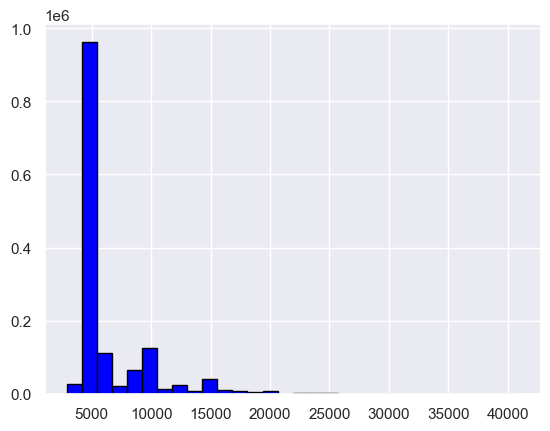

In [16]:
plt.hist(base1F2['Teff'], bins=30, color='blue', edgecolor='black')
plt.show()

In [17]:
# corte feito para remover estrelas jovens que parecem anâs por terem um disco de acreção 
base1F3 = data.loc[(data['Teff']>4000) & (data['Teff']<6500)]

In [18]:
base1F3

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_g,e_J0515,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0289312,11.488642,-71.942451,0.0,19.9713,0.0000,19.3947,18.9172,18.3270,18.0778,17.5351,...,0.025,0.031,0.022,0.022,0.027,0.028,0.029,5087.0,3.7814,-0.1519
iDR4_3_MC0094_0347690,12.160228,-71.925148,0.0,0.0000,19.6559,19.4864,19.0077,18.5036,18.2384,17.7892,...,0.027,0.029,0.024,0.024,0.021,0.027,0.023,4547.7,4.8616,-1.5256
iDR4_3_MC0094_0362897,13.924870,-72.868988,0.0,0.0000,0.0000,18.1281,17.7574,16.7953,16.5744,15.8472,...,0.022,0.022,0.015,0.017,0.015,0.017,0.016,4703.5,3.2641,0.2570
iDR4_3_MC0094_0363543,11.414421,-72.857552,0.0,0.0000,0.0000,19.1644,18.8564,18.2435,18.0375,17.5254,...,0.039,0.041,0.029,0.030,0.032,0.029,0.035,4326.2,4.2496,-2.4685
iDR4_3_MC0094_0372563,13.475752,-72.822075,0.0,0.0000,0.0000,18.7557,18.9416,18.5297,18.5114,18.2389,...,0.059,0.074,0.049,0.042,0.045,0.064,0.062,5031.6,4.7859,-1.3787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0268371,87.639503,-65.050850,0.0,0.0000,0.0000,19.8008,0.0000,19.3420,0.0000,18.8100,...,0.034,0.000,0.029,0.039,0.031,0.066,0.076,5065.7,4.6974,-0.5241
iDR4_3_MC0017_0268372,87.510178,-65.051254,0.0,0.0000,0.0000,19.5969,0.0000,19.1465,18.9223,18.6562,...,0.032,0.104,0.024,0.033,0.032,0.057,0.058,4942.7,4.8415,-1.9895
iDR4_3_MC0017_0268378,86.239677,-65.050194,0.0,0.0000,0.0000,19.5030,19.3984,18.7953,18.4705,18.1465,...,0.026,0.060,0.018,0.020,0.014,0.039,0.032,4550.2,4.7676,-1.0667


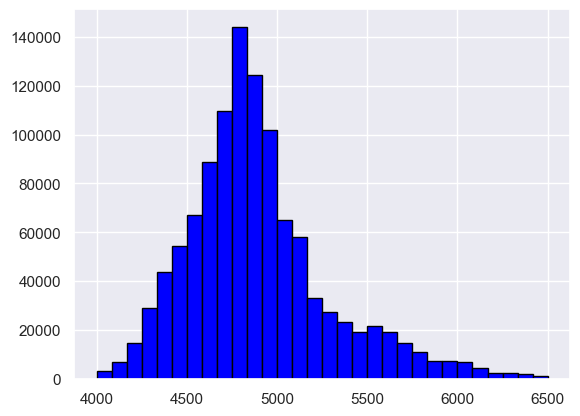

In [19]:
plt.hist(base1F3['Teff'], bins=30, color='blue', edgecolor='black')
plt.show()

In [20]:
base1F3.to_csv(f"E:\IC\FiltroBases\Predict\{name}F3.csv")

In [21]:
del base1F2

#### Removendo Valores inválidos

In [40]:
name = "Base5"

In [41]:
base1F3 = pd.read_csv(f"E:\IC\FiltroBases\Predict\{name}F3.csv", encoding='latin-1', index_col='#ID')

In [42]:
base1F3

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_g,e_J0515,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0289312,11.488642,-71.942451,0.0,19.9713,0.0000,19.3947,18.9172,18.3270,18.0778,17.5351,...,0.025,0.031,0.022,0.022,0.027,0.028,0.029,5087.0,3.7814,-0.1519
iDR4_3_MC0094_0347690,12.160228,-71.925148,0.0,0.0000,19.6559,19.4864,19.0077,18.5036,18.2384,17.7892,...,0.027,0.029,0.024,0.024,0.021,0.027,0.023,4547.7,4.8616,-1.5256
iDR4_3_MC0094_0362897,13.924870,-72.868988,0.0,0.0000,0.0000,18.1281,17.7574,16.7953,16.5744,15.8472,...,0.022,0.022,0.015,0.017,0.015,0.017,0.016,4703.5,3.2641,0.2570
iDR4_3_MC0094_0363543,11.414421,-72.857552,0.0,0.0000,0.0000,19.1644,18.8564,18.2435,18.0375,17.5254,...,0.039,0.041,0.029,0.030,0.032,0.029,0.035,4326.2,4.2496,-2.4685
iDR4_3_MC0094_0372563,13.475752,-72.822075,0.0,0.0000,0.0000,18.7557,18.9416,18.5297,18.5114,18.2389,...,0.059,0.074,0.049,0.042,0.045,0.064,0.062,5031.6,4.7859,-1.3787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0268371,87.639503,-65.050850,0.0,0.0000,0.0000,19.8008,0.0000,19.3420,0.0000,18.8100,...,0.034,0.000,0.029,0.039,0.031,0.066,0.076,5065.7,4.6974,-0.5241
iDR4_3_MC0017_0268372,87.510178,-65.051254,0.0,0.0000,0.0000,19.5969,0.0000,19.1465,18.9223,18.6562,...,0.032,0.104,0.024,0.033,0.032,0.057,0.058,4942.7,4.8415,-1.9895
iDR4_3_MC0017_0268378,86.239677,-65.050194,0.0,0.0000,0.0000,19.5030,19.3984,18.7953,18.4705,18.1465,...,0.026,0.060,0.018,0.020,0.014,0.039,0.032,4550.2,4.7676,-1.0667


In [43]:
colunas_interesse = ["u", "J378", "J395", "J410", "J430", "g", "J515", "r", "J660", "i", "J861", "z"]

In [44]:
mask = (base1F3[colunas_interesse] != 0)

In [45]:
mask.min()

u       False
J378    False
J395    False
J410    False
J430    False
g        True
J515    False
r        True
J660    False
i        True
J861    False
z        True
dtype: bool

In [46]:
baseF4 = base1F3[mask.all(axis=1)]

In [47]:
baseF4

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_g,e_J0515,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0203718,13.340935,-71.799835,20.1248,19.6189,19.3643,19.0782,18.9805,18.8107,18.6563,18.4681,...,0.032,0.034,0.034,0.032,0.033,0.047,0.043,5371.5,4.7185,-1.0299
iDR4_3_MC0094_0204374,12.070196,-71.785477,18.9320,18.6697,18.3547,17.6204,17.3827,16.7214,16.6936,15.8488,...,0.017,0.020,0.016,0.017,0.019,0.019,0.020,4480.2,4.5896,-0.3626
iDR4_3_MC0094_0209252,13.200723,-71.713593,20.6198,19.9815,19.7536,19.6619,19.5415,19.1262,19.0370,18.6953,...,0.036,0.041,0.029,0.033,0.034,0.040,0.051,4942.7,4.8069,-1.7518
iDR4_3_MC0094_0212401,11.493512,-71.648422,20.1567,19.8248,19.3494,18.6993,18.4932,17.7369,17.6794,16.8743,...,0.024,0.028,0.021,0.024,0.024,0.027,0.028,4539.3,4.5549,0.0009
iDR4_3_MC0094_0213994,13.384532,-71.624306,20.4364,19.8770,19.4966,19.2936,19.2236,18.9397,18.7469,18.5302,...,0.036,0.037,0.033,0.028,0.030,0.044,0.045,5124.5,4.7732,-1.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264482,85.290878,-63.950397,18.5174,18.2035,18.1510,17.5167,17.4812,16.9961,16.8721,16.5040,...,0.011,0.025,0.009,0.014,0.011,0.027,0.023,5191.7,4.4217,-0.3156
iDR4_3_MC0017_0264518,85.459236,-63.925236,19.9936,19.3092,19.4103,18.7051,18.5832,18.1970,18.0693,17.6592,...,0.016,0.051,0.016,0.022,0.015,0.033,0.030,5015.9,4.7876,-1.6169
iDR4_3_MC0017_0264566,86.283928,-63.903938,18.0937,17.6838,17.7273,17.0354,16.9487,16.5812,16.3857,16.0772,...,0.007,0.020,0.007,0.012,0.008,0.018,0.019,5174.9,4.3813,-0.7850


In [48]:
baseF4.to_csv(f"E:\IC\FiltroBases\Predict\{name}F4.csv")

#### Separando anas e gigantes

In [68]:
name = "Base5"

In [69]:
base1F4 = pd.read_csv(f"E:\IC\FiltroBases\Predict\{name}F4.csv", encoding='latin-1', index_col='#ID')

In [70]:
base1F4

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_g,e_J0515,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0203718,13.340935,-71.799835,20.1248,19.6189,19.3643,19.0782,18.9805,18.8107,18.6563,18.4681,...,0.032,0.034,0.034,0.032,0.033,0.047,0.043,5371.5,4.7185,-1.0299
iDR4_3_MC0094_0204374,12.070196,-71.785477,18.9320,18.6697,18.3547,17.6204,17.3827,16.7214,16.6936,15.8488,...,0.017,0.020,0.016,0.017,0.019,0.019,0.020,4480.2,4.5896,-0.3626
iDR4_3_MC0094_0209252,13.200723,-71.713593,20.6198,19.9815,19.7536,19.6619,19.5415,19.1262,19.0370,18.6953,...,0.036,0.041,0.029,0.033,0.034,0.040,0.051,4942.7,4.8069,-1.7518
iDR4_3_MC0094_0212401,11.493512,-71.648422,20.1567,19.8248,19.3494,18.6993,18.4932,17.7369,17.6794,16.8743,...,0.024,0.028,0.021,0.024,0.024,0.027,0.028,4539.3,4.5549,0.0009
iDR4_3_MC0094_0213994,13.384532,-71.624306,20.4364,19.8770,19.4966,19.2936,19.2236,18.9397,18.7469,18.5302,...,0.036,0.037,0.033,0.028,0.030,0.044,0.045,5124.5,4.7732,-1.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264482,85.290878,-63.950397,18.5174,18.2035,18.1510,17.5167,17.4812,16.9961,16.8721,16.5040,...,0.011,0.025,0.009,0.014,0.011,0.027,0.023,5191.7,4.4217,-0.3156
iDR4_3_MC0017_0264518,85.459236,-63.925236,19.9936,19.3092,19.4103,18.7051,18.5832,18.1970,18.0693,17.6592,...,0.016,0.051,0.016,0.022,0.015,0.033,0.030,5015.9,4.7876,-1.6169
iDR4_3_MC0017_0264566,86.283928,-63.903938,18.0937,17.6838,17.7273,17.0354,16.9487,16.5812,16.3857,16.0772,...,0.007,0.020,0.007,0.012,0.008,0.018,0.019,5174.9,4.3813,-0.7850


In [71]:
df = base1F4       # define dataframes , you can put your own dataframe here
xcol = 'Teff'               # define x-column
ycol = 'logg'               # define y-column

x1, y1 = 5800, 3.2            #starting pt of 1st line
x2, y2 = 4500, line(4500)    #ending pt of 1st line, starting pt of 2nd line
x3, y3 = 3020, 1              #ending pt of 2nd line, starting pt of 3rd line
x4, y4 = 4800, 0.05           #ending pt of 3rd line, starting pt of 4th line

In [72]:
df, selected_points, *additional_lines = calculate_boundary_lines(xcol, ycol, x1, y1, x2, y2, x3, y3, x4, y4)

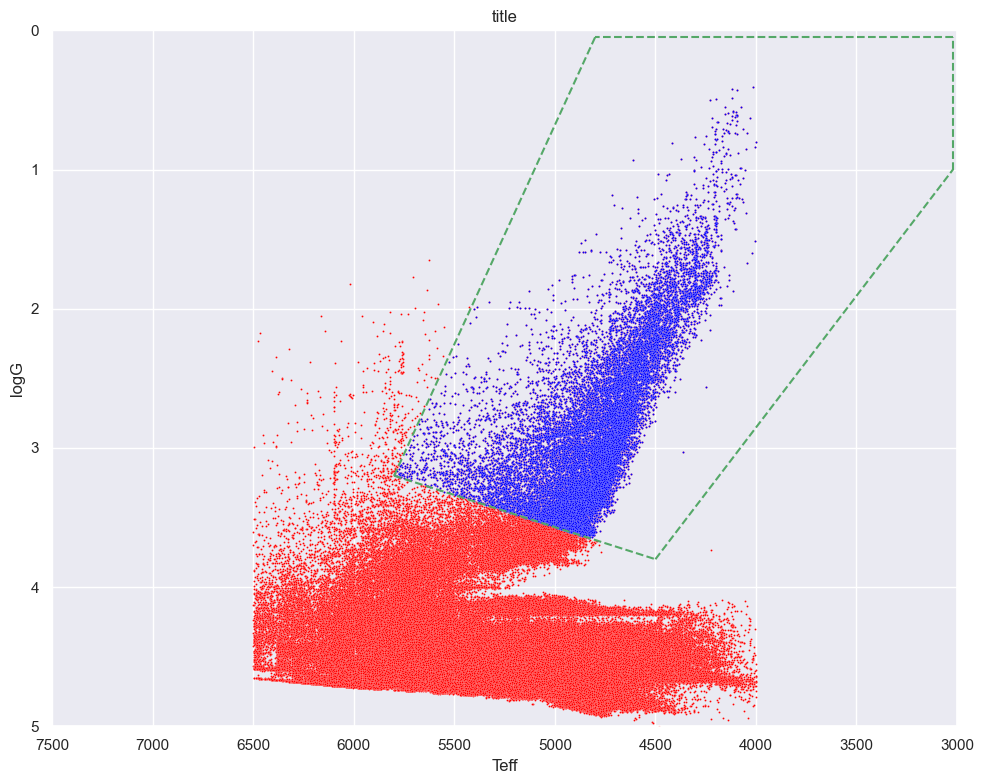

In [73]:
plot_data(df, selected_points, additional_lines, xcol, ycol, "title")

In [74]:
selected_points

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H],above_line,below_line
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0207282,14.280757,-71.743599,18.0971,17.6444,17.2742,16.4929,16.0482,15.1658,14.9002,14.1960,...,0.011,0.013,0.015,0.018,0.018,4617.2,1.8718,0.1570,True,True
iDR4_3_MC0094_0076398,11.473484,-72.644073,19.8172,19.4042,18.9123,18.1974,17.7896,16.9543,16.7016,15.9456,...,0.014,0.013,0.012,0.021,0.012,4617.3,2.6125,-0.1828,True,True
iDR4_3_MC0094_0106841,14.846993,-72.504158,19.3744,18.8579,18.7512,17.8503,17.6013,16.8112,16.5982,16.0291,...,0.013,0.015,0.014,0.018,0.014,4839.5,3.4536,0.0774,True,True
iDR4_3_MC0094_0194189,13.679479,-71.925522,20.0609,19.5857,19.1262,18.4356,18.1106,17.2813,17.0151,16.3509,...,0.012,0.013,0.012,0.014,0.015,4729.0,3.1587,0.0957,True,True
iDR4_3_MC0094_0190898,13.778797,-71.964531,19.8281,19.1798,18.9626,18.2542,17.8638,16.8807,16.6435,15.9255,...,0.011,0.014,0.012,0.018,0.015,4633.4,2.7273,0.0698,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263672,86.070953,-64.735832,19.9101,19.7164,19.5693,18.5299,18.3337,17.5123,17.3153,16.6887,...,0.008,0.012,0.008,0.017,0.015,4888.5,3.0243,-0.2283,True,True
iDR4_3_MC0017_0263980,87.412552,-64.374413,20.2611,19.7653,19.6165,18.6270,18.2061,17.1304,16.8548,16.0889,...,0.006,0.009,0.006,0.012,0.012,4539.1,2.4428,0.3230,True,True
iDR4_3_MC0017_0264092,85.237549,-64.231918,19.9943,19.6753,19.2557,18.5270,18.1424,17.3504,17.0762,16.3977,...,0.007,0.014,0.008,0.021,0.016,4757.2,3.0286,0.0439,True,True


In [75]:
df = df.reset_index()

In [76]:
merged = df.merge(selected_points, how='left', indicator=True)

In [77]:
result = merged[merged['_merge'] == 'left_only']

In [78]:
result = result.drop('_merge', axis=1)

In [79]:
result = result.set_index("#ID")

In [80]:
result

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H],above_line,below_line
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0203718,13.340935,-71.799835,20.1248,19.6189,19.3643,19.0782,18.9805,18.8107,18.6563,18.4681,...,0.034,0.032,0.033,0.047,0.043,5371.5,4.7185,-1.0299,False,True
iDR4_3_MC0094_0204374,12.070196,-71.785477,18.9320,18.6697,18.3547,17.6204,17.3827,16.7214,16.6936,15.8488,...,0.016,0.017,0.019,0.019,0.020,4480.2,4.5896,-0.3626,False,True
iDR4_3_MC0094_0209252,13.200723,-71.713593,20.6198,19.9815,19.7536,19.6619,19.5415,19.1262,19.0370,18.6953,...,0.029,0.033,0.034,0.040,0.051,4942.7,4.8069,-1.7518,False,True
iDR4_3_MC0094_0212401,11.493512,-71.648422,20.1567,19.8248,19.3494,18.6993,18.4932,17.7369,17.6794,16.8743,...,0.021,0.024,0.024,0.027,0.028,4539.3,4.5549,0.0009,False,True
iDR4_3_MC0094_0213994,13.384532,-71.624306,20.4364,19.8770,19.4966,19.2936,19.2236,18.9397,18.7469,18.5302,...,0.033,0.028,0.030,0.044,0.045,5124.5,4.7732,-1.4786,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264482,85.290878,-63.950397,18.5174,18.2035,18.1510,17.5167,17.4812,16.9961,16.8721,16.5040,...,0.009,0.014,0.011,0.027,0.023,5191.7,4.4217,-0.3156,False,True
iDR4_3_MC0017_0264518,85.459236,-63.925236,19.9936,19.3092,19.4103,18.7051,18.5832,18.1970,18.0693,17.6592,...,0.016,0.022,0.015,0.033,0.030,5015.9,4.7876,-1.6169,False,True
iDR4_3_MC0017_0264566,86.283928,-63.903938,18.0937,17.6838,17.7273,17.0354,16.9487,16.5812,16.3857,16.0772,...,0.007,0.012,0.008,0.018,0.019,5174.9,4.3813,-0.7850,False,True


In [81]:
del base1F4

In [82]:
Giants = selected_points

In [83]:
Giants

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H],above_line,below_line
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0207282,14.280757,-71.743599,18.0971,17.6444,17.2742,16.4929,16.0482,15.1658,14.9002,14.1960,...,0.011,0.013,0.015,0.018,0.018,4617.2,1.8718,0.1570,True,True
iDR4_3_MC0094_0076398,11.473484,-72.644073,19.8172,19.4042,18.9123,18.1974,17.7896,16.9543,16.7016,15.9456,...,0.014,0.013,0.012,0.021,0.012,4617.3,2.6125,-0.1828,True,True
iDR4_3_MC0094_0106841,14.846993,-72.504158,19.3744,18.8579,18.7512,17.8503,17.6013,16.8112,16.5982,16.0291,...,0.013,0.015,0.014,0.018,0.014,4839.5,3.4536,0.0774,True,True
iDR4_3_MC0094_0194189,13.679479,-71.925522,20.0609,19.5857,19.1262,18.4356,18.1106,17.2813,17.0151,16.3509,...,0.012,0.013,0.012,0.014,0.015,4729.0,3.1587,0.0957,True,True
iDR4_3_MC0094_0190898,13.778797,-71.964531,19.8281,19.1798,18.9626,18.2542,17.8638,16.8807,16.6435,15.9255,...,0.011,0.014,0.012,0.018,0.015,4633.4,2.7273,0.0698,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263672,86.070953,-64.735832,19.9101,19.7164,19.5693,18.5299,18.3337,17.5123,17.3153,16.6887,...,0.008,0.012,0.008,0.017,0.015,4888.5,3.0243,-0.2283,True,True
iDR4_3_MC0017_0263980,87.412552,-64.374413,20.2611,19.7653,19.6165,18.6270,18.2061,17.1304,16.8548,16.0889,...,0.006,0.009,0.006,0.012,0.012,4539.1,2.4428,0.3230,True,True
iDR4_3_MC0017_0264092,85.237549,-64.231918,19.9943,19.6753,19.2557,18.5270,18.1424,17.3504,17.0762,16.3977,...,0.007,0.014,0.008,0.021,0.016,4757.2,3.0286,0.0439,True,True


In [84]:
Giants.to_csv(f"E:\IC\FiltroBases\Predict\{name}F5-Giants.csv")

In [85]:
Dwarfs = result

In [86]:
Dwarfs

,RA,DEC,u,J378,J395,J410,J430,g,J515,r,...,e_r,e_J0660,e_i,e_J0861,e_z,Teff,logg,[Fe/H],above_line,below_line
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0203718,13.340935,-71.799835,20.1248,19.6189,19.3643,19.0782,18.9805,18.8107,18.6563,18.4681,...,0.034,0.032,0.033,0.047,0.043,5371.5,4.7185,-1.0299,False,True
iDR4_3_MC0094_0204374,12.070196,-71.785477,18.9320,18.6697,18.3547,17.6204,17.3827,16.7214,16.6936,15.8488,...,0.016,0.017,0.019,0.019,0.020,4480.2,4.5896,-0.3626,False,True
iDR4_3_MC0094_0209252,13.200723,-71.713593,20.6198,19.9815,19.7536,19.6619,19.5415,19.1262,19.0370,18.6953,...,0.029,0.033,0.034,0.040,0.051,4942.7,4.8069,-1.7518,False,True
iDR4_3_MC0094_0212401,11.493512,-71.648422,20.1567,19.8248,19.3494,18.6993,18.4932,17.7369,17.6794,16.8743,...,0.021,0.024,0.024,0.027,0.028,4539.3,4.5549,0.0009,False,True
iDR4_3_MC0094_0213994,13.384532,-71.624306,20.4364,19.8770,19.4966,19.2936,19.2236,18.9397,18.7469,18.5302,...,0.033,0.028,0.030,0.044,0.045,5124.5,4.7732,-1.4786,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264482,85.290878,-63.950397,18.5174,18.2035,18.1510,17.5167,17.4812,16.9961,16.8721,16.5040,...,0.009,0.014,0.011,0.027,0.023,5191.7,4.4217,-0.3156,False,True
iDR4_3_MC0017_0264518,85.459236,-63.925236,19.9936,19.3092,19.4103,18.7051,18.5832,18.1970,18.0693,17.6592,...,0.016,0.022,0.015,0.033,0.030,5015.9,4.7876,-1.6169,False,True
iDR4_3_MC0017_0264566,86.283928,-63.903938,18.0937,17.6838,17.7273,17.0354,16.9487,16.5812,16.3857,16.0772,...,0.007,0.012,0.008,0.018,0.019,5174.9,4.3813,-0.7850,False,True


In [87]:
Dwarfs.to_csv(f"E:\IC\FiltroBases\Predict\{name}F6-Dwarfs.csv")

#### Calculando as cores

In [88]:
colunas = ['u', 'J378', 'J395', 'J410', 
           'J430', 'g', 'J515', 'r', 
           'J660', 'i', 'J861', 'z']

In [89]:
Params1 = ['RA', 'DEC', 'Teff', 'logg', '[Fe/H]']

In [90]:
#Anas1 = pd.read_csv(f"E:\\IC\\FiltroBases\\Predict\\{name}F6-Dwarfs.csv", index_col = '#ID')
Anas1 = Dwarfs

In [91]:
AnasCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        AnasCores1[str(colunas[i] + '-' + colunas[j])] = Anas1[colunas[i]].astype(float) - Anas1[colunas[j]].astype(float)

In [92]:
for col in Params1:
    AnasCores1[col] = Anas1[col]

In [93]:
AnasCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,J660-J861,J660-z,i-J861,i-z,J861-z,RA,DEC,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0203718,0.5059,0.7605,1.0466,1.1443,1.3141,1.4685,1.6567,1.6880,1.7881,1.8922,...,0.2042,0.1317,0.1041,0.0316,-0.0725,13.340935,-71.799835,5371.5,4.7185,-1.0299
iDR4_3_MC0094_0204374,0.2623,0.5773,1.3116,1.5493,2.2106,2.2384,3.0832,3.1958,3.4159,3.5238,...,0.3280,0.3710,0.1079,0.1509,0.0430,12.070196,-71.785477,4480.2,4.5896,-0.3626
iDR4_3_MC0094_0209252,0.6383,0.8662,0.9579,1.0783,1.4936,1.5828,1.9245,2.0047,2.1505,2.1649,...,0.1602,0.2246,0.0144,0.0788,0.0644,13.200723,-71.713593,4942.7,4.8069,-1.7518
iDR4_3_MC0094_0212401,0.3319,0.8073,1.4574,1.6635,2.4198,2.4773,3.2824,3.3874,3.6129,3.7234,...,0.3360,0.3591,0.1105,0.1336,0.0231,11.493512,-71.648422,4539.3,4.5549,0.0009
iDR4_3_MC0094_0213994,0.5594,0.9398,1.1428,1.2128,1.4967,1.6895,1.9062,1.8981,2.1035,2.1115,...,0.2134,0.2552,0.0080,0.0498,0.0418,13.384532,-71.624306,5124.5,4.7732,-1.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264482,0.3139,0.3664,1.0007,1.0362,1.5213,1.6453,2.0134,2.0525,2.1681,2.1858,...,0.1333,0.1661,0.0177,0.0505,0.0328,85.290878,-63.950397,5191.7,4.4217,-0.3156
iDR4_3_MC0017_0264518,0.6844,0.5833,1.2885,1.4104,1.7966,1.9243,2.3344,2.3819,2.5328,2.5147,...,0.1328,0.2277,-0.0181,0.0768,0.0949,85.459236,-63.925236,5015.9,4.7876,-1.6169
iDR4_3_MC0017_0264566,0.4099,0.3664,1.0583,1.1450,1.5125,1.7080,2.0165,2.0568,2.1926,2.2110,...,0.1542,0.1725,0.0184,0.0367,0.0183,86.283928,-63.903938,5174.9,4.3813,-0.7850


In [94]:
AnasCores1.to_csv(f"E:\\IC\\FiltroBases\\Predict\\Colors\\{name}-Colors-Dwarfs.csv")

In [95]:
#Giants1 = pd.read_csv(f"E:\\IC\\FiltroBases\\Predict\\{name}F5-Giants.csv", index_col = 'ID')
Giants1 = Giants

In [96]:
GiantsCores1 = pd.DataFrame()
for i in range(0, 12):
    for j in range(i+1, 12):
        GiantsCores1[str(colunas[i] + '-' + colunas[j])] = Giants1[colunas[i]].astype(float) - Giants1[colunas[j]].astype(float)

In [97]:
for col in Params1:
    GiantsCores1[col] = Giants1[col]

In [98]:
GiantsCores1

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,J660-J861,J660-z,i-J861,i-z,J861-z,RA,DEC,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_MC0094_0207282,0.4527,0.8229,1.6042,2.0489,2.9313,3.1969,3.9011,4.0001,4.2772,4.4002,...,0.4001,0.4593,0.1230,0.1822,0.0592,14.280757,-71.743599,4617.2,1.8718,0.1570
iDR4_3_MC0094_0076398,0.4130,0.9049,1.6198,2.0276,2.8629,3.1156,3.8716,4.0079,4.3350,4.4778,...,0.4699,0.5528,0.1428,0.2257,0.0829,11.473484,-72.644073,4617.3,2.6125,-0.1828
iDR4_3_MC0094_0106841,0.5165,0.6232,1.5241,1.7731,2.5632,2.7762,3.3453,3.4382,3.6362,3.7151,...,0.2769,0.3182,0.0789,0.1202,0.0413,14.846993,-72.504158,4839.5,3.4536,0.0774
iDR4_3_MC0094_0194189,0.4752,0.9347,1.6253,1.9503,2.7796,3.0458,3.7100,3.8444,4.1135,4.2256,...,0.3812,0.4605,0.1121,0.1914,0.0793,13.679479,-71.925522,4729.0,3.1587,0.0957
iDR4_3_MC0094_0190898,0.6483,0.8655,1.5739,1.9643,2.9474,3.1846,3.9026,4.0162,4.3045,4.4243,...,0.4081,0.4857,0.1198,0.1974,0.0776,13.778797,-71.964531,4633.4,2.7273,0.0698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263672,0.1937,0.3408,1.3802,1.5764,2.3978,2.5948,3.2214,3.3211,3.5489,3.6472,...,0.3261,0.3800,0.0983,0.1522,0.0539,86.070953,-64.735832,4888.5,3.0243,-0.2283
iDR4_3_MC0017_0263980,0.4958,0.6446,1.6341,2.0550,3.1307,3.4063,4.1722,4.2998,4.5514,4.7111,...,0.4113,0.4514,0.1597,0.1998,0.0401,87.412552,-64.374413,4539.1,2.4428,0.3230
iDR4_3_MC0017_0264092,0.3190,0.7386,1.4673,1.8519,2.6439,2.9181,3.5966,3.7038,4.0117,4.1472,...,0.4434,0.5032,0.1355,0.1953,0.0598,85.237549,-64.231918,4757.2,3.0286,0.0439


In [99]:
GiantsCores1.to_csv(f"E:\\IC\\FiltroBases\\Predict\\Colors\\{name}-Colors-Giants.csv")

#### Juntando bases

In [2]:
types = ["Giants", "Dwarfs"]
names = ["Base1", "Base2", "Base3", "Base4", "Base5"]


for AouG in types:
    i = 0
    for name in names:
        base = pd.read_csv(f"E:\\IC\\FiltroBases\\Predict\\Colors\\{name}-Colors-{AouG}.csv", encoding='latin-1', index_col='#ID')
        if i == 0:
            base1 = base
        else:
            base1 = pd.concat([base1, base])
            del base
        i += 1
    base1.to_csv(f"E:\\IC\\FiltroBases\\Predict\\Colors\\Concat-Colors-{AouG}.csv")

#### Preparando normalização

In [12]:
Dwarfs = base1

NameError: name 'base1' is not defined

In [13]:
Dwarfs = pd.read_csv(f"E:\\IC\\BasesPredict\\Concat-Colors-Dwarfs.csv", encoding='latin-1', index_col='#ID')

In [14]:
DwarfsColors = Dwarfs.iloc[: , :66]

In [15]:
del Dwarfs

In [16]:
DwarfsColors

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,r-J660,r-i,r-J861,r-z,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0011_0009691,0.4655,0.3969,0.6236,0.8373,0.9273,1.0244,1.2399,1.2424,1.3124,1.2920,...,0.0025,0.0725,0.0521,0.0736,0.0700,0.0496,0.0711,-0.0204,0.0011,0.0215
iDR4_3_HYDRA-0011_0009692,0.1631,0.6987,1.0231,0.6899,1.0823,1.2887,1.5855,1.6300,1.6794,1.7103,...,0.0445,0.0939,0.1248,0.1284,0.0494,0.0803,0.0839,0.0309,0.0345,0.0036
iDR4_3_HYDRA-0011_0009710,0.3411,0.5198,1.0701,1.1609,1.5361,1.7146,2.0686,2.1233,2.1868,2.1816,...,0.0547,0.1182,0.1130,0.1560,0.0635,0.0583,0.1013,-0.0052,0.0378,0.0430
iDR4_3_HYDRA-0011_0008795,0.4572,0.4680,0.9718,1.0286,1.2419,1.3988,1.6203,1.6407,1.6837,1.6504,...,0.0204,0.0634,0.0301,0.0658,0.0430,0.0097,0.0454,-0.0333,0.0024,0.0357
iDR4_3_HYDRA-0011_0008805,0.3844,0.3885,0.7353,0.8062,0.9713,1.1529,1.3875,1.4206,1.4980,1.4741,...,0.0331,0.1105,0.0866,0.1384,0.0774,0.0535,0.1053,-0.0239,0.0279,0.0518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264482,0.3139,0.3664,1.0007,1.0362,1.5213,1.6453,2.0134,2.0525,2.1681,2.1858,...,0.0391,0.1547,0.1724,0.2052,0.1156,0.1333,0.1661,0.0177,0.0505,0.0328
iDR4_3_MC0017_0264518,0.6844,0.5833,1.2885,1.4104,1.7966,1.9243,2.3344,2.3819,2.5328,2.5147,...,0.0475,0.1984,0.1803,0.2752,0.1509,0.1328,0.2277,-0.0181,0.0768,0.0949
iDR4_3_MC0017_0264566,0.4099,0.3664,1.0583,1.1450,1.5125,1.7080,2.0165,2.0568,2.1926,2.2110,...,0.0403,0.1761,0.1945,0.2128,0.1358,0.1542,0.1725,0.0184,0.0367,0.0183


In [17]:
DwarfsColorsEncoded = encoder.encode_Colors(DwarfsColors, "Dwarfs") 

In [18]:
DwarfsColorsEncoded

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,r-J660,r-i,r-J861,r-z,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0011_0009691,-0.004443,-0.027969,-0.005212,-0.000943,-0.596434,-0.004116,-0.357244,0.002904,-0.242078,0.002990,...,0.722280,-0.087194,0.716694,0.118596,-0.719548,0.002534,-0.716135,0.712331,-0.030176,-0.731495
iDR4_3_HYDRA-0011_0009692,-0.008005,-0.024335,-0.000525,-0.002668,-0.593550,-0.001027,-0.351788,0.007397,-0.236778,0.007832,...,0.723110,-0.085535,0.718123,0.122017,-0.719955,0.002886,-0.715882,0.713337,-0.027784,-0.731850
iDR4_3_HYDRA-0011_0009710,-0.005908,-0.026489,0.000026,0.002844,-0.585106,0.003950,-0.344162,0.013115,-0.229451,0.013288,...,0.723312,-0.083650,0.717891,0.123739,-0.719676,0.002634,-0.715539,0.712629,-0.027547,-0.731070
iDR4_3_HYDRA-0011_0008795,-0.004541,-0.027113,-0.001127,0.001296,-0.590580,0.000259,-0.351239,0.007521,-0.236716,0.007139,...,0.722634,-0.087900,0.716261,0.118109,-0.720081,0.002077,-0.716641,0.712078,-0.030083,-0.731214
iDR4_3_HYDRA-0011_0008805,-0.005398,-0.028070,-0.003901,-0.001307,-0.595615,-0.002614,-0.354914,0.004969,-0.239397,0.005098,...,0.722885,-0.084247,0.717372,0.122641,-0.719402,0.002579,-0.715461,0.712262,-0.028256,-0.730896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0264482,-0.006229,-0.028336,-0.000788,0.001385,-0.585381,0.003140,-0.345033,0.012294,-0.229721,0.013336,...,0.723004,-0.080820,0.719059,0.126810,-0.718647,0.003493,-0.714262,0.713078,-0.026637,-0.731272
iDR4_3_MC0017_0264518,-0.001865,-0.025725,0.002588,0.005764,-0.580259,0.006401,-0.339966,0.016113,-0.224455,0.017144,...,0.723170,-0.077431,0.719214,0.131179,-0.717950,0.003487,-0.713048,0.712376,-0.024753,-0.730043
iDR4_3_MC0017_0264566,-0.005098,-0.028336,-0.000112,0.002658,-0.585545,0.003873,-0.344984,0.012344,-0.229367,0.013628,...,0.723027,-0.079160,0.719493,0.127284,-0.718249,0.003732,-0.714136,0.713092,-0.027626,-0.731559


In [19]:
encoder.save_encoders()

In [20]:
DwarfsColorsEncoded.to_csv(f"E:\\IC\\BasesPredict\\Concat-ColorsEncoded-Dwarfs.csv")

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from package import encoder

from astropy.coordinates import SkyCoord
from astropy import units as u

Loaded  0 encoders.


In [2]:
Giants = pd.read_csv(f"E:\\IC\\FiltroBases\\Predict\\Colors\\Concat-Colors-Giants.csv", encoding='latin-1', index_col='#ID')

In [3]:
Giants

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,J660-J861,J660-z,i-J861,i-z,J861-z,RA,DEC,Teff,logg,[Fe/H]
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0011_0009757,0.3249,0.4305,1.1378,1.2249,1.7310,1.9251,2.3844,2.4745,2.5909,2.6378,...,0.1633,0.2164,0.0469,0.1000,0.0531,150.775924,-24.393380,4999.6,3.3408,-0.3101
iDR4_3_HYDRA-0011_0009765,0.3325,0.5866,1.4286,1.7464,2.3914,2.6158,3.2291,3.3345,3.4988,3.5829,...,0.2484,0.3091,0.0841,0.1448,0.0607,150.456780,-24.392103,4743.9,2.6761,-0.0702
iDR4_3_HYDRA-0011_0010568,0.3325,0.6211,1.4436,1.6814,2.2869,2.5324,1.8082,2.2820,2.8924,3.3974,...,1.1154,0.7232,0.5050,0.1128,-0.3922,150.934820,-24.418671,4912.5,2.6977,-0.1409
iDR4_3_HYDRA-0011_0010446,0.2714,0.5139,1.3403,1.4980,2.0455,2.2380,2.7334,2.8123,2.9681,3.0212,...,0.2089,0.2514,0.0531,0.0956,0.0425,149.982919,-24.389328,5149.7,3.4569,-0.1001
iDR4_3_HYDRA-0011_0011714,0.2883,0.4444,1.1486,1.2706,1.7552,1.9476,2.3789,2.4433,2.5602,2.5836,...,0.1403,0.1801,0.0234,0.0632,0.0398,150.271601,-24.360356,5123.5,3.4783,-0.3401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263672,0.1937,0.3408,1.3802,1.5764,2.3978,2.5948,3.2214,3.3211,3.5489,3.6472,...,0.3261,0.3800,0.0983,0.1522,0.0539,86.070953,-64.735832,4888.5,3.0243,-0.2283
iDR4_3_MC0017_0263980,0.4958,0.6446,1.6341,2.0550,3.1307,3.4063,4.1722,4.2998,4.5514,4.7111,...,0.4113,0.4514,0.1597,0.1998,0.0401,87.412552,-64.374413,4539.1,2.4428,0.3230
iDR4_3_MC0017_0264092,0.3190,0.7386,1.4673,1.8519,2.6439,2.9181,3.5966,3.7038,4.0117,4.1472,...,0.4434,0.5032,0.1355,0.1953,0.0598,85.237549,-64.231918,4757.2,3.0286,0.0439


In [4]:
GiantsColors = Giants.iloc[:, :66]

In [5]:
GiantsColors

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,r-J660,r-i,r-J861,r-z,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0011_0009757,0.3249,0.4305,1.1378,1.2249,1.7310,1.9251,2.3844,2.4745,2.5909,2.6378,...,0.0901,0.2065,0.2534,0.3065,0.1164,0.1633,0.2164,0.0469,0.1000,0.0531
iDR4_3_HYDRA-0011_0009765,0.3325,0.5866,1.4286,1.7464,2.3914,2.6158,3.2291,3.3345,3.4988,3.5829,...,0.1054,0.2697,0.3538,0.4145,0.1643,0.2484,0.3091,0.0841,0.1448,0.0607
iDR4_3_HYDRA-0011_0010568,0.3325,0.6211,1.4436,1.6814,2.2869,2.5324,1.8082,2.2820,2.8924,3.3974,...,0.4738,1.0842,1.5892,1.1970,0.6104,1.1154,0.7232,0.5050,0.1128,-0.3922
iDR4_3_HYDRA-0011_0010446,0.2714,0.5139,1.3403,1.4980,2.0455,2.2380,2.7334,2.8123,2.9681,3.0212,...,0.0789,0.2347,0.2878,0.3303,0.1558,0.2089,0.2514,0.0531,0.0956,0.0425
iDR4_3_HYDRA-0011_0011714,0.2883,0.4444,1.1486,1.2706,1.7552,1.9476,2.3789,2.4433,2.5602,2.5836,...,0.0644,0.1813,0.2047,0.2445,0.1169,0.1403,0.1801,0.0234,0.0632,0.0398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263672,0.1937,0.3408,1.3802,1.5764,2.3978,2.5948,3.2214,3.3211,3.5489,3.6472,...,0.0997,0.3275,0.4258,0.4797,0.2278,0.3261,0.3800,0.0983,0.1522,0.0539
iDR4_3_MC0017_0263980,0.4958,0.6446,1.6341,2.0550,3.1307,3.4063,4.1722,4.2998,4.5514,4.7111,...,0.1276,0.3792,0.5389,0.5790,0.2516,0.4113,0.4514,0.1597,0.1998,0.0401
iDR4_3_MC0017_0264092,0.3190,0.7386,1.4673,1.8519,2.6439,2.9181,3.5966,3.7038,4.0117,4.1472,...,0.1072,0.4151,0.5506,0.6104,0.3079,0.4434,0.5032,0.1355,0.1953,0.0598


In [6]:
GiantsColorsEncoded = encoder.encode_Colors(GiantsColors, "Giants")

c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:59: SettingWithCopyWarning: 
A 

c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:59: SettingWithCopyWarning: 
A 

In [7]:
GiantsColorsEncoded

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,r-J660,r-i,r-J861,r-z,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_HYDRA-0011_0009757,-0.012971,-0.036165,-0.799418,-0.006547,-0.639719,-0.562928,-0.403278,0.006186,-0.287750,0.000820,...,0.694096,-0.181523,0.688917,0.031841,-0.740373,-0.742765,-0.731675,0.727491,0.248416,-0.733093
iDR4_3_HYDRA-0011_0009765,-0.012879,-0.034239,-0.793194,-0.000319,-0.626903,-0.550158,-0.389267,0.016290,-0.273929,0.011976,...,0.694396,-0.176737,0.690907,0.038533,-0.739408,-0.741050,-0.729819,0.728245,0.252882,-0.732939
iDR4_3_HYDRA-0011_0010568,-0.012879,-0.033813,-0.792873,-0.001096,-0.628931,-0.551700,-0.412835,0.003925,-0.283160,0.009786,...,0.701624,-0.115068,0.715387,0.087016,-0.730427,-0.723581,-0.721528,0.736770,0.249692,-0.742145
iDR4_3_HYDRA-0011_0010446,-0.013619,-0.035136,-0.795084,-0.003286,-0.633615,-0.557143,-0.397489,0.010155,-0.282008,0.005346,...,0.693876,-0.179387,0.689599,0.033316,-0.739579,-0.741846,-0.730975,0.727617,0.247978,-0.733309
iDR4_3_HYDRA-0011_0011714,-0.013414,-0.035993,-0.799187,-0.006001,-0.639249,-0.562512,-0.403369,0.005820,-0.288218,0.000180,...,0.693591,-0.183431,0.687952,0.027999,-0.740363,-0.743228,-0.732402,0.727015,0.244749,-0.733364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_MC0017_0263672,-0.014559,-0.037272,-0.794230,-0.002349,-0.626778,-0.550546,-0.389395,0.016133,-0.273166,0.012735,...,0.694284,-0.172361,0.692334,0.042572,-0.738130,-0.739485,-0.728400,0.728532,0.253619,-0.733077
iDR4_3_MC0017_0263980,-0.010903,-0.033523,-0.788796,0.003366,-0.612555,-0.535542,-0.373623,0.027632,-0.257904,0.025294,...,0.694831,-0.168447,0.694575,0.048725,-0.737651,-0.737768,-0.726970,0.729776,0.258364,-0.733358
iDR4_3_MC0017_0264092,-0.013043,-0.032363,-0.792366,0.000940,-0.622002,-0.544569,-0.383171,0.020629,-0.266120,0.018637,...,0.694431,-0.165728,0.694807,0.050670,-0.736517,-0.737121,-0.725933,0.729286,0.257915,-0.732957


In [8]:
encoder.save_encoders()

In [9]:
GiantsColorsEncoded.to_csv(f"E:\\IC\\BasesPredict\\Concat-ColorsEncoded-Giants.csv")